# LIU RF Phase Check

In [27]:
import imageio
import pickle
import pandas as pd
import numpy as np
import PyNAFF as pnf
import scipy.io as sio 
import matplotlib.cm as cm
from math import log10, floor
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
from scipy.optimize import curve_fit

In [28]:
plt.rcParams['figure.figsize'] = [8.0, 8.0]
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 14

plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10

plt.rcParams['font.size'] = 10
plt.rcParams['legend.fontsize'] = 10

plt.rcParams['lines.linewidth'] = 1
plt.rcParams['lines.markersize'] = 5

In [29]:
def round_sig(x, sig=3):
        return round(x, sig-int(floor(log10(abs(x))))-1)

def replace_point_with_p(input_str):
        return input_str.replace(".", "p")
    
def is_non_zero_file(fpath):  
        print '\n\t\t\tis_non_zero_file:: Checking file ', fpath
        print '\n\t\t\tis_non_zero_file:: File exists = ', os.path.isfile(fpath)
        print '\n\t\t\tis_non_zero_file:: Size > 3 bytes = ', os.path.getsize(fpath)
        return os.path.isfile(fpath) and os.path.getsize(fpath) > 3

In [30]:
def add_input_file(dd, filename, label):
	f = filename
	p = dict()
	sio.loadmat(f, mdict=p)
	dd[label] = p	
	print '\tAdded output data from ', filename, '\t dictionary key: ', label
	return dd

In [37]:
dd1 = dict() # Tomo LI
dd2 = dict() # Parabolic LI
dd3 = dict() # Tomo HI
dd4 = dict() # Parabolic HI

dd1 = add_input_file(dd1, '../01_Initial_Setup/01_00/output/output.mat', '1.3 eVs')
dd1 = add_input_file(dd1, '../01_Initial_Setup/01_01/output/output.mat', '1.6 eVs')
dd1 = add_input_file(dd1, '../01_Initial_Setup/01_02/output/output.mat', '1.9 eVs')
dd1 = add_input_file(dd1, '../01_Initial_Setup/01_03/output/output.mat', '2.3 eVs')
dd1 = add_input_file(dd1, '../01_Initial_Setup/01_04/output/output.mat', '2.6 eVs')

dd2 = add_input_file(dd2, '00_00/output/output.mat', '1.3 eVs')
dd2 = add_input_file(dd2, '00_01/output/output.mat', '1.6 eVs')
dd2 = add_input_file(dd2, '00_02/output/output.mat', '1.9 eVs')
dd2 = add_input_file(dd2, '00_03/output/output.mat', '2.3 eVs')
dd2 = add_input_file(dd2, '00_04/output/output.mat', '2.6 eVs')

dd3 = add_input_file(dd3, '../01_Initial_Setup/01_10/output/output.mat', '1.3 eVs')
dd3 = add_input_file(dd3, '../01_Initial_Setup/01_11/output/output.mat', '1.6 eVs')
dd3 = add_input_file(dd3, '../01_Initial_Setup/01_12/output/output.mat', '1.9 eVs')
dd3 = add_input_file(dd3, '../01_Initial_Setup/01_13/output/output.mat', '2.3 eVs')
dd3 = add_input_file(dd3, '../01_Initial_Setup/01_14/output/output.mat', '2.6 eVs')

dd4 = add_input_file(dd4, '01_00/output/output.mat', '1.3 eVs')
dd4 = add_input_file(dd4, '01_01/output/output.mat', '1.6 eVs')
dd4 = add_input_file(dd4, '01_02/output/output.mat', '1.9 eVs')
dd4 = add_input_file(dd4, '01_03/output/output.mat', '2.3 eVs')
dd4 = add_input_file(dd4, '01_04/output/output.mat', '2.6 eVs')

	Added output data from  ../01_Initial_Setup/01_00/output/output.mat 	 dictionary key:  1.3 eVs
	Added output data from  ../01_Initial_Setup/01_01/output/output.mat 	 dictionary key:  1.6 eVs
	Added output data from  ../01_Initial_Setup/01_02/output/output.mat 	 dictionary key:  1.9 eVs
	Added output data from  ../01_Initial_Setup/01_03/output/output.mat 	 dictionary key:  2.3 eVs
	Added output data from  ../01_Initial_Setup/01_04/output/output.mat 	 dictionary key:  2.6 eVs
	Added output data from  00_00/output/output.mat 	 dictionary key:  1.3 eVs
	Added output data from  00_01/output/output.mat 	 dictionary key:  1.6 eVs
	Added output data from  00_02/output/output.mat 	 dictionary key:  1.9 eVs
	Added output data from  00_03/output/output.mat 	 dictionary key:  2.3 eVs
	Added output data from  00_04/output/output.mat 	 dictionary key:  2.6 eVs
	Added output data from  ../01_Initial_Setup/01_10/output/output.mat 	 dictionary key:  1.3 eVs
	Added output data from  ../01_Initial_Setup

In [38]:
dd1['1.3 eVs'].keys()

['eps_z',
 'D_x',
 'D_y',
 'kurtosis_yp_6sig',
 'kurtosis_yp',
 'mu_yp',
 'kurtosis_z_6sig',
 'eff_beta_y',
 'eff_beta_x',
 'eff_alpha_y',
 'kurtosis_y_6sig',
 'epsn_y',
 'epsn_x',
 'beta_y',
 'beta_x',
 'dpp_rms',
 'sig_yp',
 'min_dE',
 'turn_time',
 'n_mp',
 'min_xp',
 'kurtosis_y',
 'kurtosis_xp_6sig',
 'alpha_x',
 'alpha_y',
 'bunchlength',
 '__header__',
 'sig_xp',
 'kurtosis_dE_6sig',
 'max_xp',
 'intensity',
 'min_yp',
 'sig_dE',
 'min_x',
 'min_y',
 'mu_y',
 'mu_x',
 'cumulative_time',
 'mean_yp',
 'kurtosis_xp',
 'eff_epsn_y',
 'eff_epsn_x',
 'mean_x',
 'mean_y',
 'mean_z',
 'kurtosis_x_6sig',
 '__version__',
 'max_z',
 'mu_dE',
 'max_x',
 'max_y',
 'mean_dE',
 'sig_z',
 'sig_y',
 'sig_x',
 'max_yp',
 'kurtosis_z',
 'eff_alpha_x',
 'kurtosis_x',
 'mu_xp',
 'turn_duration',
 'mu_z',
 'mean_xp',
 'min_z',
 'kurtosis_dE',
 '__globals__',
 'turn',
 'max_dE',
 'gamma']

In [39]:
sc = 'SbS'
legend_label = r'$\epsilon_{z}$'    
main_label = 'MD211_Long_test'
main_label2 = main_label + '_zoom'
scaled_label = main_label + '_scaled'
turn_tot = 2200
zoom_turns = 30
turns = [0, 1, 10, 50, 100, 874, 2185, 2199]
#betagamma = 2.492104532 * 0.9159915293879255
save_folder = 'Plots'
title_1 = 'Tomo'
title_2 = 'Parabolic'
case_label_1 = r'$I = 1.6 \cdot 10^{12}$'
case_label_2 = r'$I = 2.0 \cdot 10^{12}$'

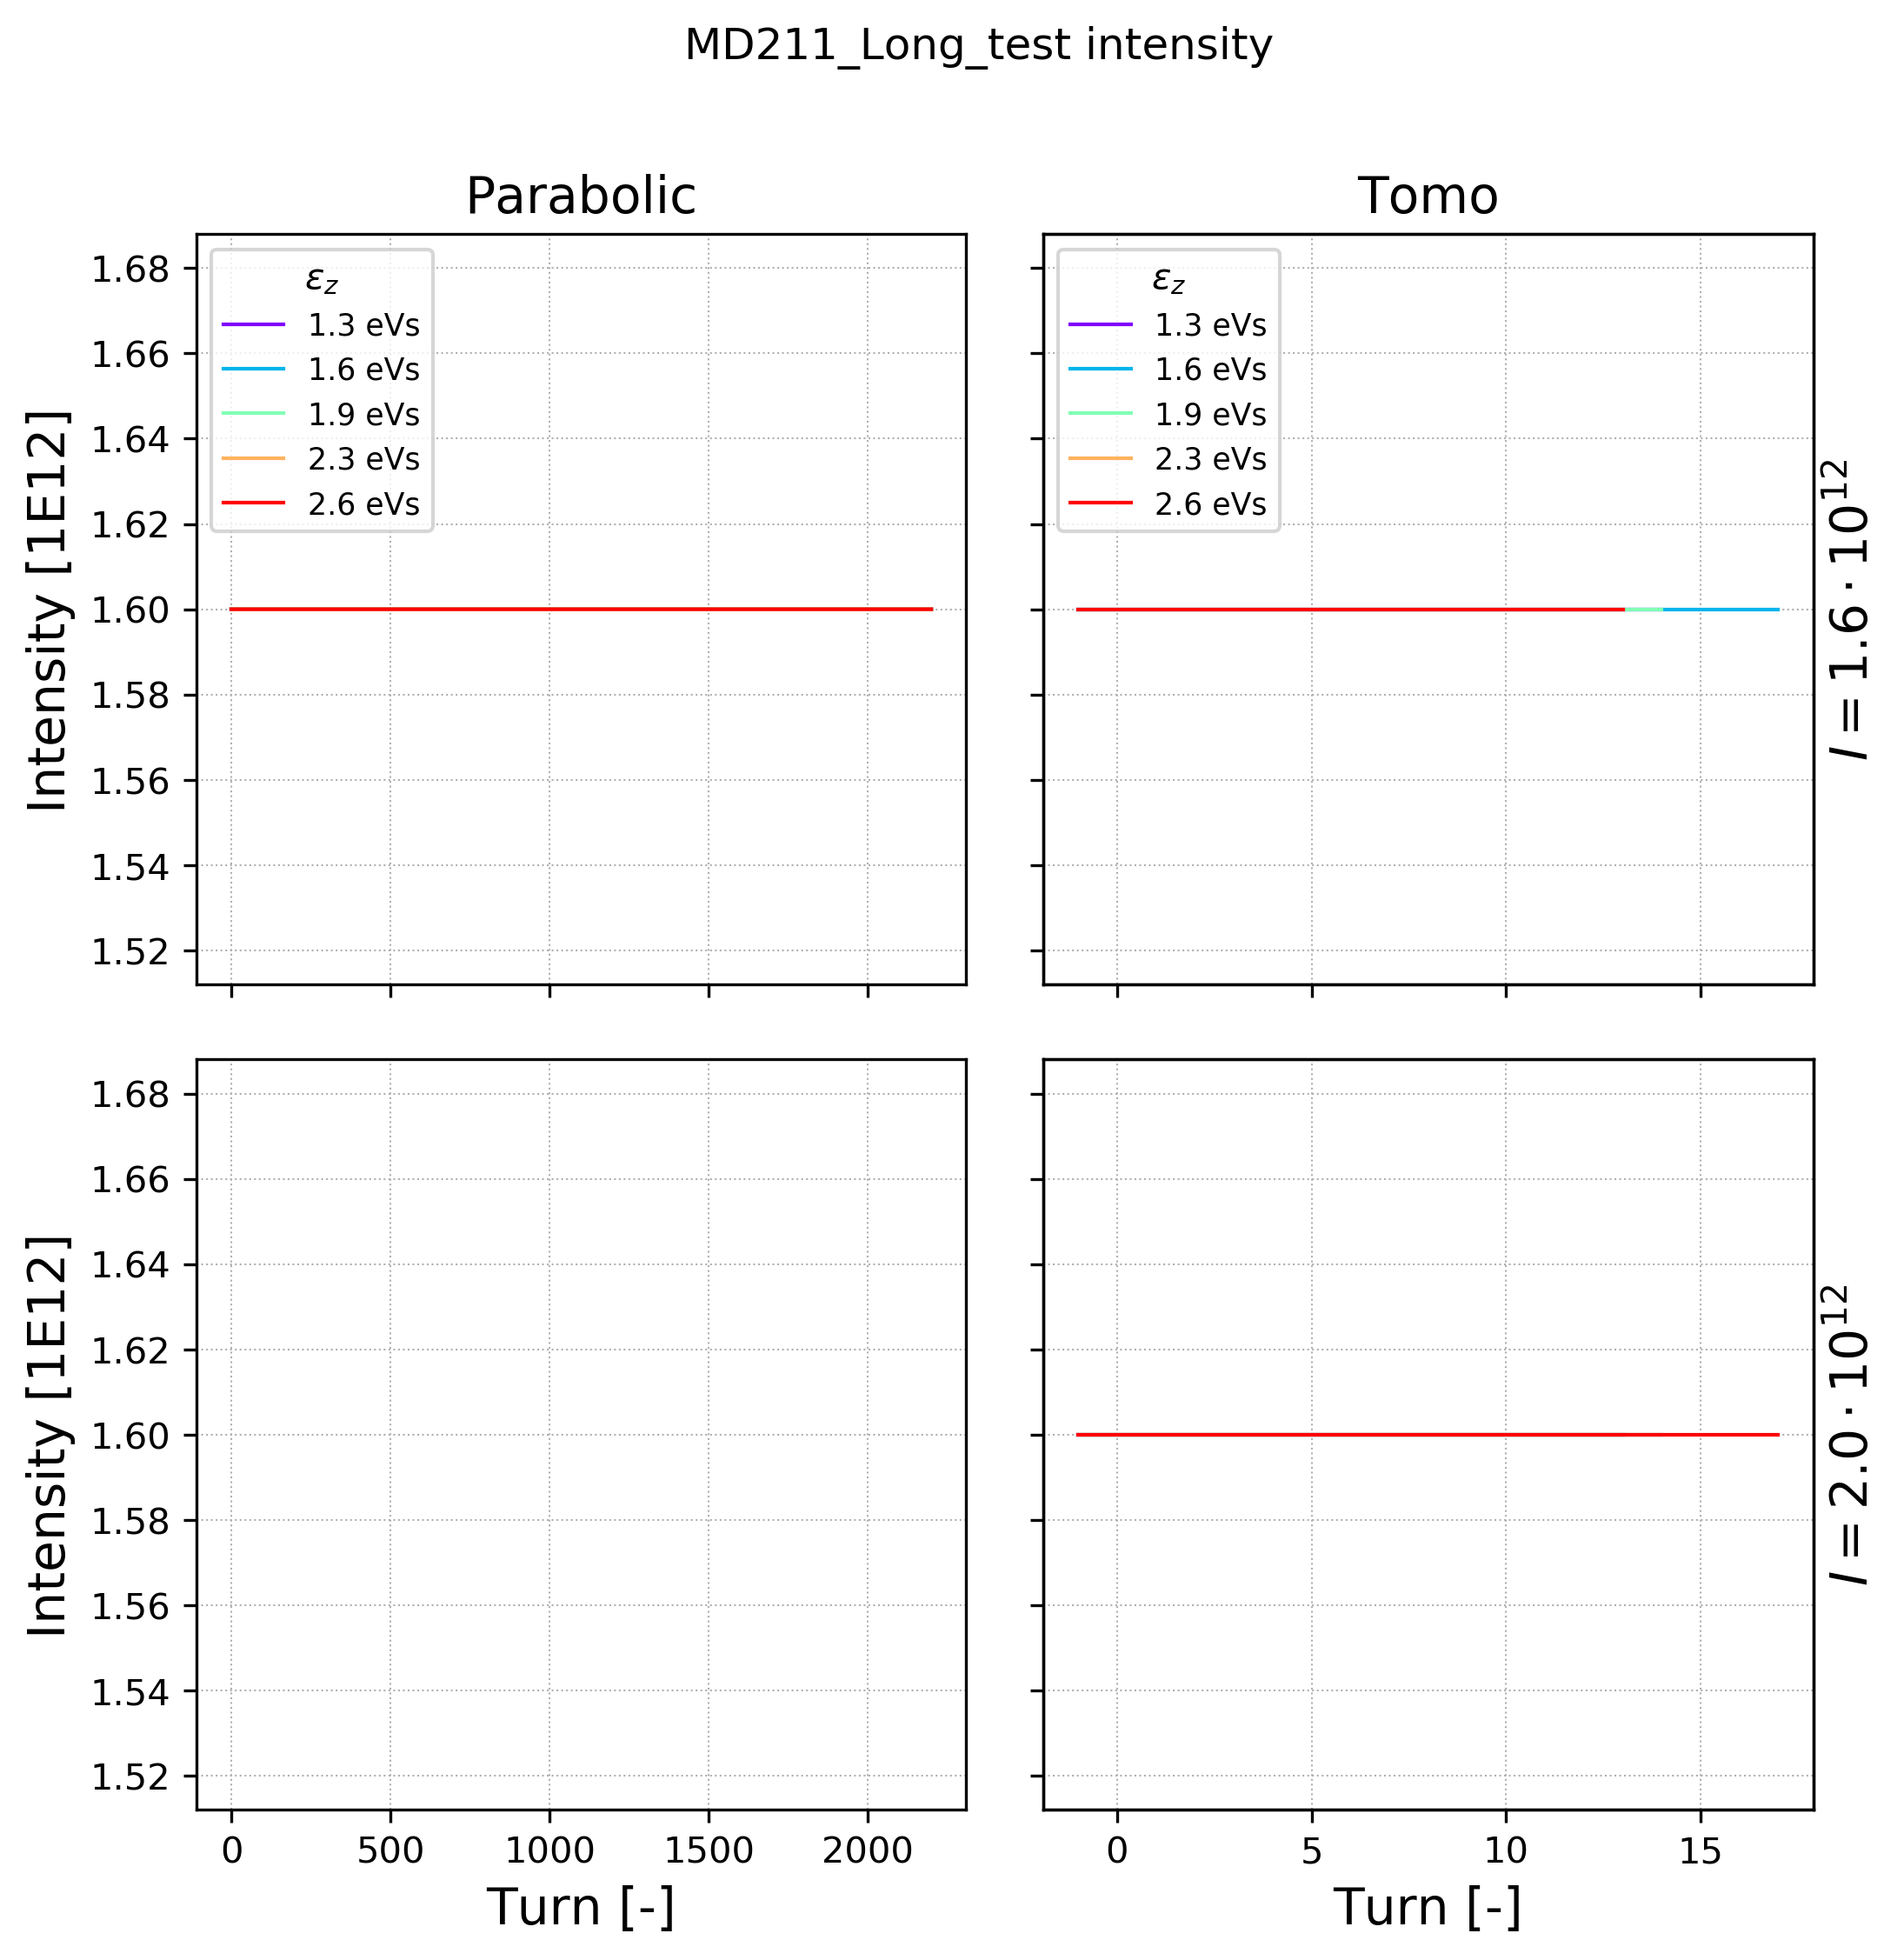

In [40]:
parameter = 'intensity'
multi1 = 1E-12

fig, axs = plt.subplots(2, 2, sharex='col', sharey='row', gridspec_kw={'hspace': 0.1, 'wspace': 0.1})
(ax1, ax2), (ax3, ax4) = axs

tit = main_label + ' ' + parameter
fig.suptitle(tit)

ax1.set_ylabel('Intensity [1E12]');
ax3.set_ylabel('Intensity [1E12]');
ax3.set_xlabel('Turn [-]');
ax4.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))

c_it = int(0)
for key, value in sorted(dd1.iteritems()):
        ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;

ax1.legend(loc=2, title=legend_label, fontsize='small');
ax1.grid(lw=0.5, ls=':');

c_it = int(0)
for key, value in sorted(dd2.iteritems()):
        ax2.plot(dd2[key]['turn'][0], dd2[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;        
ax2.grid(lw=0.5, ls=':');
ax2.legend(loc=2, title=legend_label, fontsize='small');
ax2.set_title(title_1)

c_it = int(0)
for key, value in sorted(dd3.iteritems()):
        ax3.plot(dd3[key]['turn'][0], dd3[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;
ax3.grid(lw=0.5, ls=':');
ax1.set_title(title_2)

c_it = int(0)
for key, value in sorted(dd4.iteritems()):
        ax4.plot(dd4[key]['turn'][0], dd4[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;
ax4.grid(lw=0.5, ls=':');

ax3.set_ylim(ax1.get_ylim())
ax5 = ax2.twinx()
ax5.set_ylabel(case_label_1);
ax6 = ax4.twinx()
ax6.set_ylabel(case_label_2);
ax5.set_yticklabels([]);
ax6.set_yticklabels([]);
ax5.set_yticks([]);
ax6.set_yticks([]);

for ax in axs.flat:
    ax.label_outer()   
    
savename = save_folder +'/' + main_label + '_' + parameter + '.png'
plt.savefig(savename, dpi = 800);

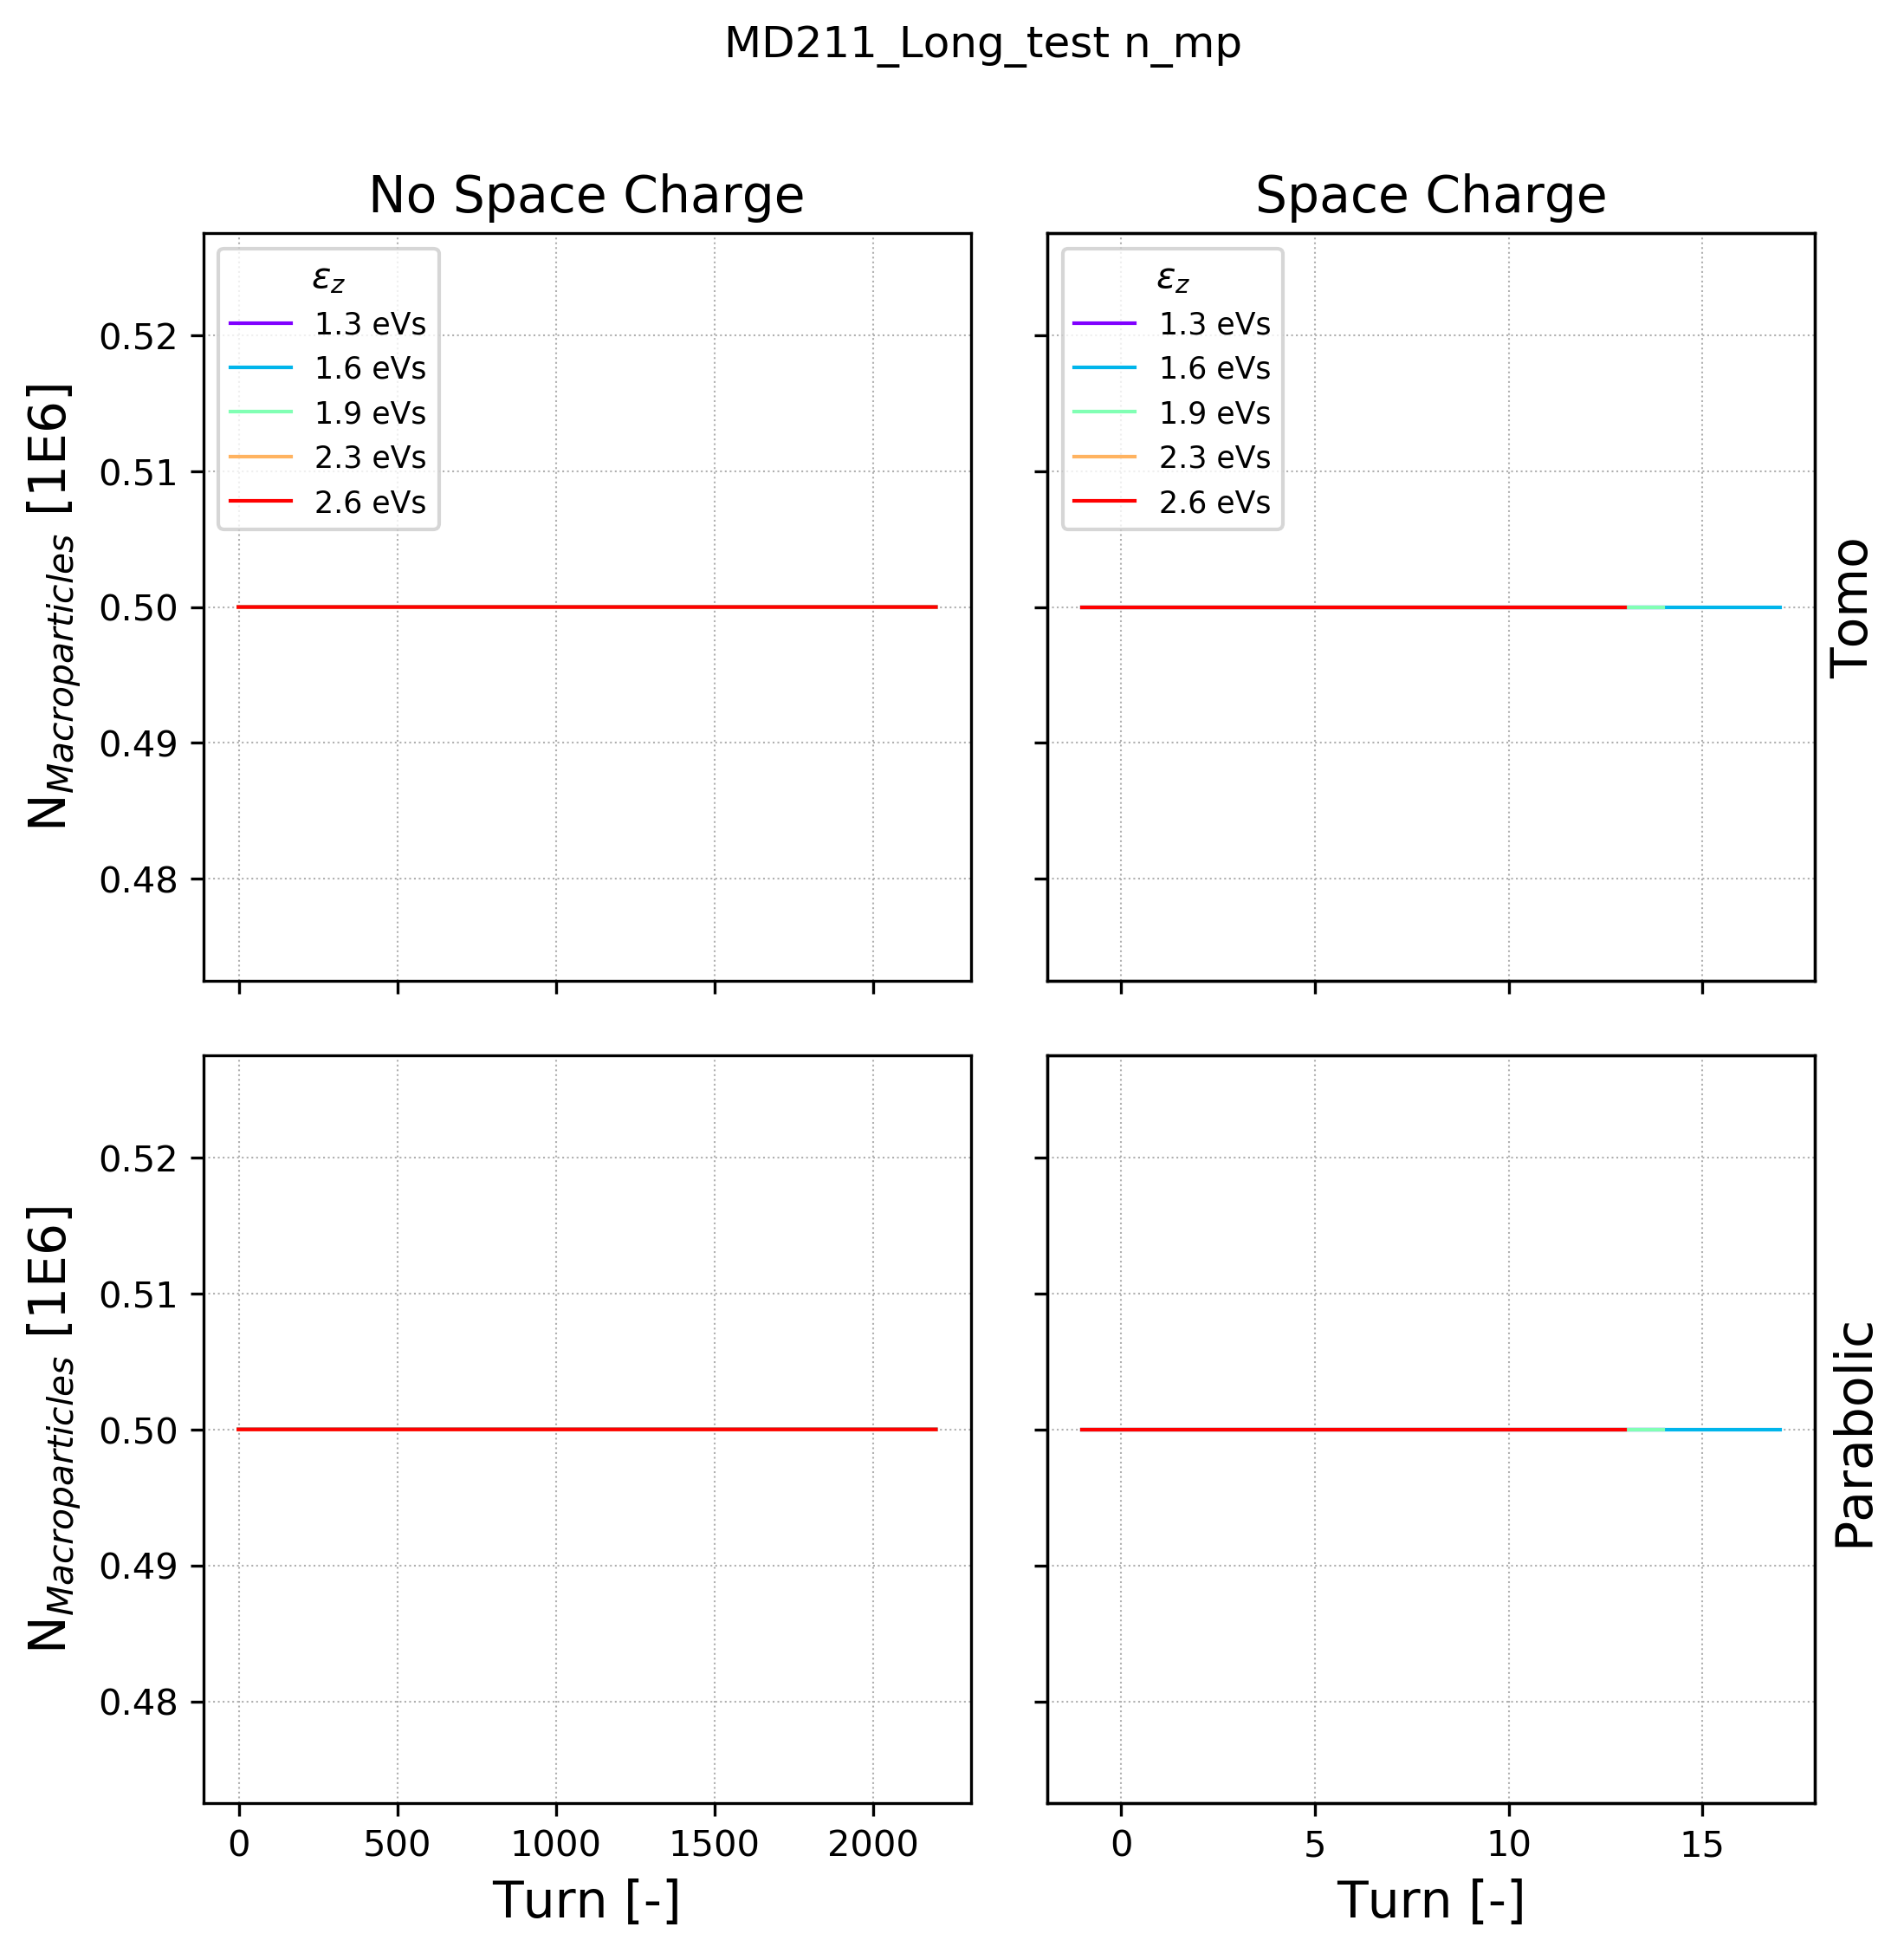

In [9]:
parameter = 'n_mp'
multi1 = 1E-6

fig, axs = plt.subplots(2, 2, sharex='col', sharey='row', gridspec_kw={'hspace': 0.1, 'wspace': 0.1})
(ax1, ax2), (ax3, ax4) = axs

tit = main_label + ' ' + parameter
fig.suptitle(tit)

ax1.set_ylabel(r'N$_{Macroparticles}$ [1E6]');
ax3.set_ylabel(r'N$_{Macroparticles}$ [1E6]');
ax3.set_xlabel('Turn [-]');
ax4.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))

c_it = int(0)
for key, value in sorted(dd1.iteritems()):
        ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;

ax1.legend(loc=2, title=legend_label, fontsize='small');
ax1.grid(lw=0.5, ls=':');

c_it = int(0)
for key, value in sorted(dd2.iteritems()):
        ax2.plot(dd2[key]['turn'][0], dd2[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;        
ax2.grid(lw=0.5, ls=':');
ax2.legend(loc=2, title=legend_label, fontsize='small');
ax2.set_title(title_1)

c_it = int(0)
for key, value in sorted(dd3.iteritems()):
        ax3.plot(dd3[key]['turn'][0], dd3[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;
ax3.grid(lw=0.5, ls=':');
ax1.set_title(title_2)

c_it = int(0)
for key, value in sorted(dd4.iteritems()):
        ax4.plot(dd4[key]['turn'][0], dd4[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;
ax4.grid(lw=0.5, ls=':');

ax3.set_ylim(ax1.get_ylim())
ax5 = ax2.twinx()
ax5.set_ylabel(case_label_1);
ax6 = ax4.twinx()
ax6.set_ylabel(case_label_2);
ax5.set_yticklabels([]);
ax6.set_yticklabels([]);
ax5.set_yticks([]);
ax6.set_yticks([]);

for ax in axs.flat:
    ax.label_outer()   
    
savename = save_folder +'/' + main_label + '_' + parameter + '.png'
plt.savefig(savename, dpi = 800);

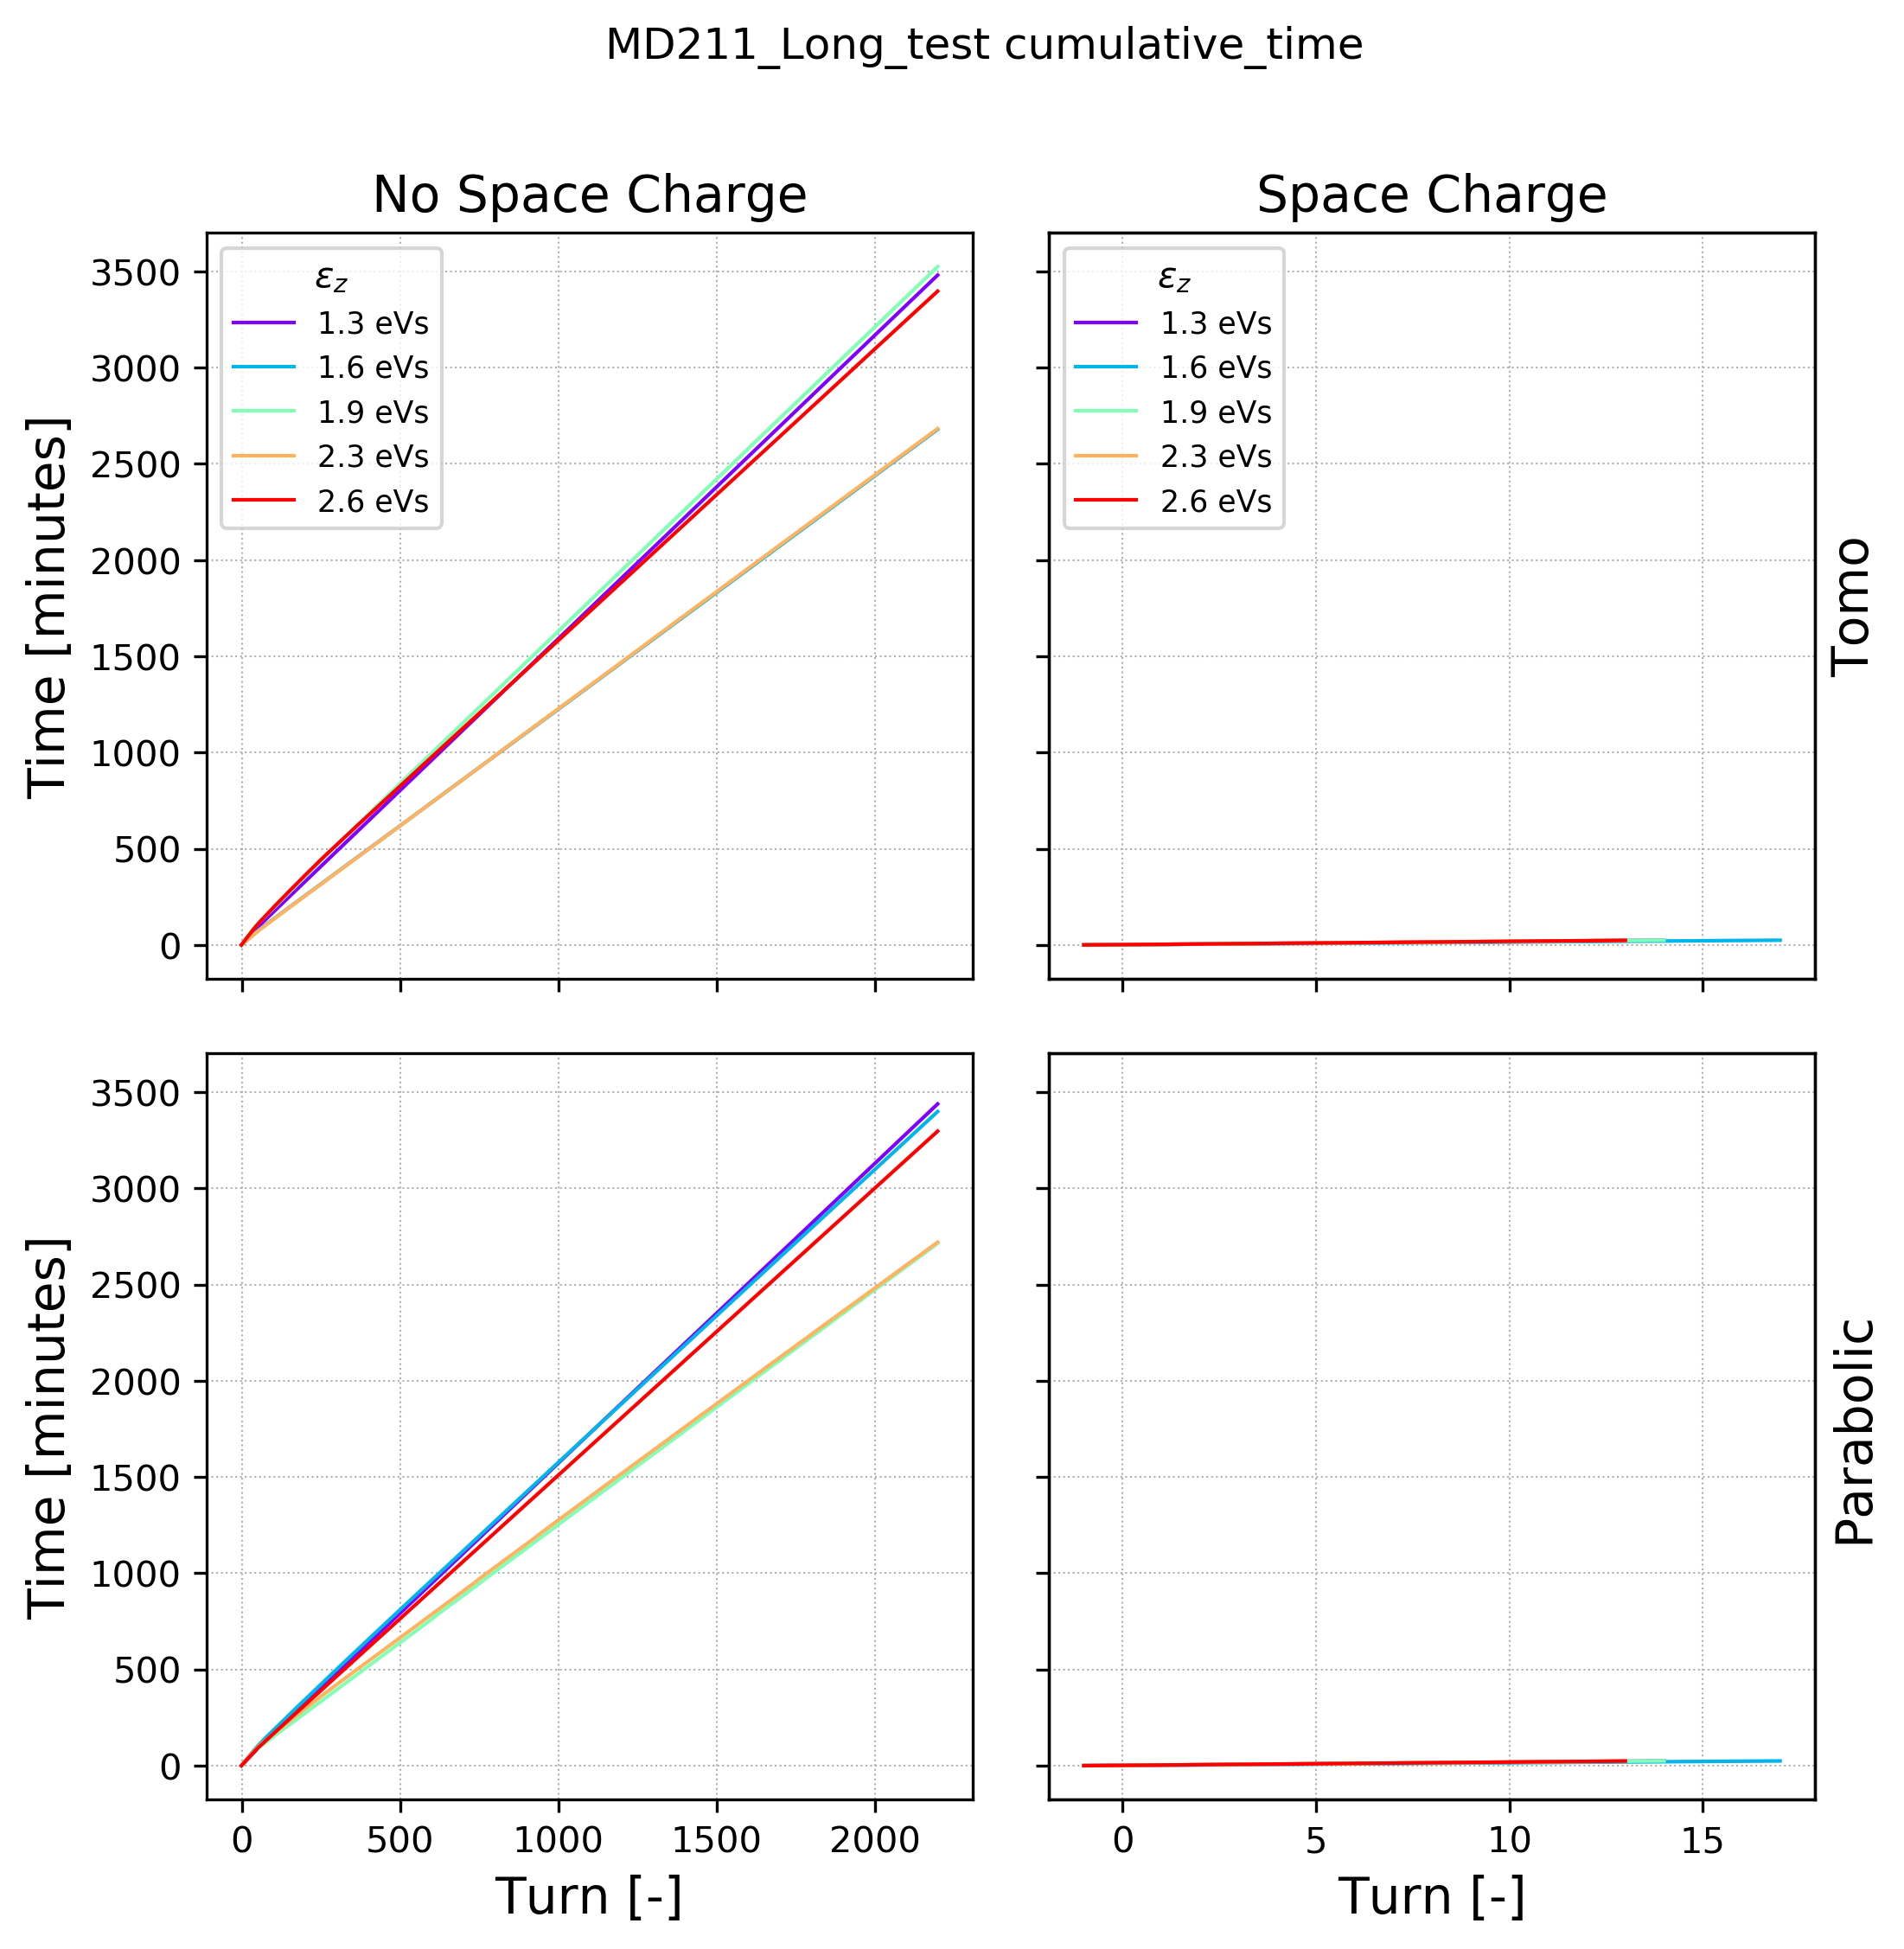

In [10]:
parameter = 'cumulative_time'
multi1 = 1./60.

fig, axs = plt.subplots(2, 2, sharex='col', sharey='row', gridspec_kw={'hspace': 0.1, 'wspace': 0.1})
(ax1, ax2), (ax3, ax4) = axs

tit = main_label + ' ' + parameter
fig.suptitle(tit)

ax1.set_ylabel('Time [s]');
ax3.set_ylabel('Time [s]');
ax3.set_xlabel('Turn [-]');
ax4.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))

c_it = int(0)
for key, value in sorted(dd1.iteritems()):
        ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;

ax1.legend(loc=2, title=legend_label, fontsize='small');
ax1.grid(lw=0.5, ls=':');

c_it = int(0)
for key, value in sorted(dd2.iteritems()):
        ax2.plot(dd2[key]['turn'][0], dd2[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;        
ax2.grid(lw=0.5, ls=':');
ax2.legend(loc=2, title=legend_label, fontsize='small');
ax2.set_title(title_1)

c_it = int(0)
for key, value in sorted(dd3.iteritems()):
        ax3.plot(dd3[key]['turn'][0], dd3[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;
ax3.grid(lw=0.5, ls=':');
ax1.set_title(title_2)

c_it = int(0)
for key, value in sorted(dd4.iteritems()):
        ax4.plot(dd4[key]['turn'][0], dd4[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;
ax4.grid(lw=0.5, ls=':');

ax3.set_ylim(ax1.get_ylim())
ax5 = ax2.twinx()
ax5.set_ylabel(case_label_1);
ax6 = ax4.twinx()
ax6.set_ylabel(case_label_2);
ax5.set_yticklabels([]);
ax6.set_yticklabels([]);
ax5.set_yticks([]);
ax6.set_yticks([]);

for ax in axs.flat:
    ax.label_outer()   
    
savename = save_folder +'/' + main_label + '_' + parameter + '.png'
plt.savefig(savename, dpi = 800);

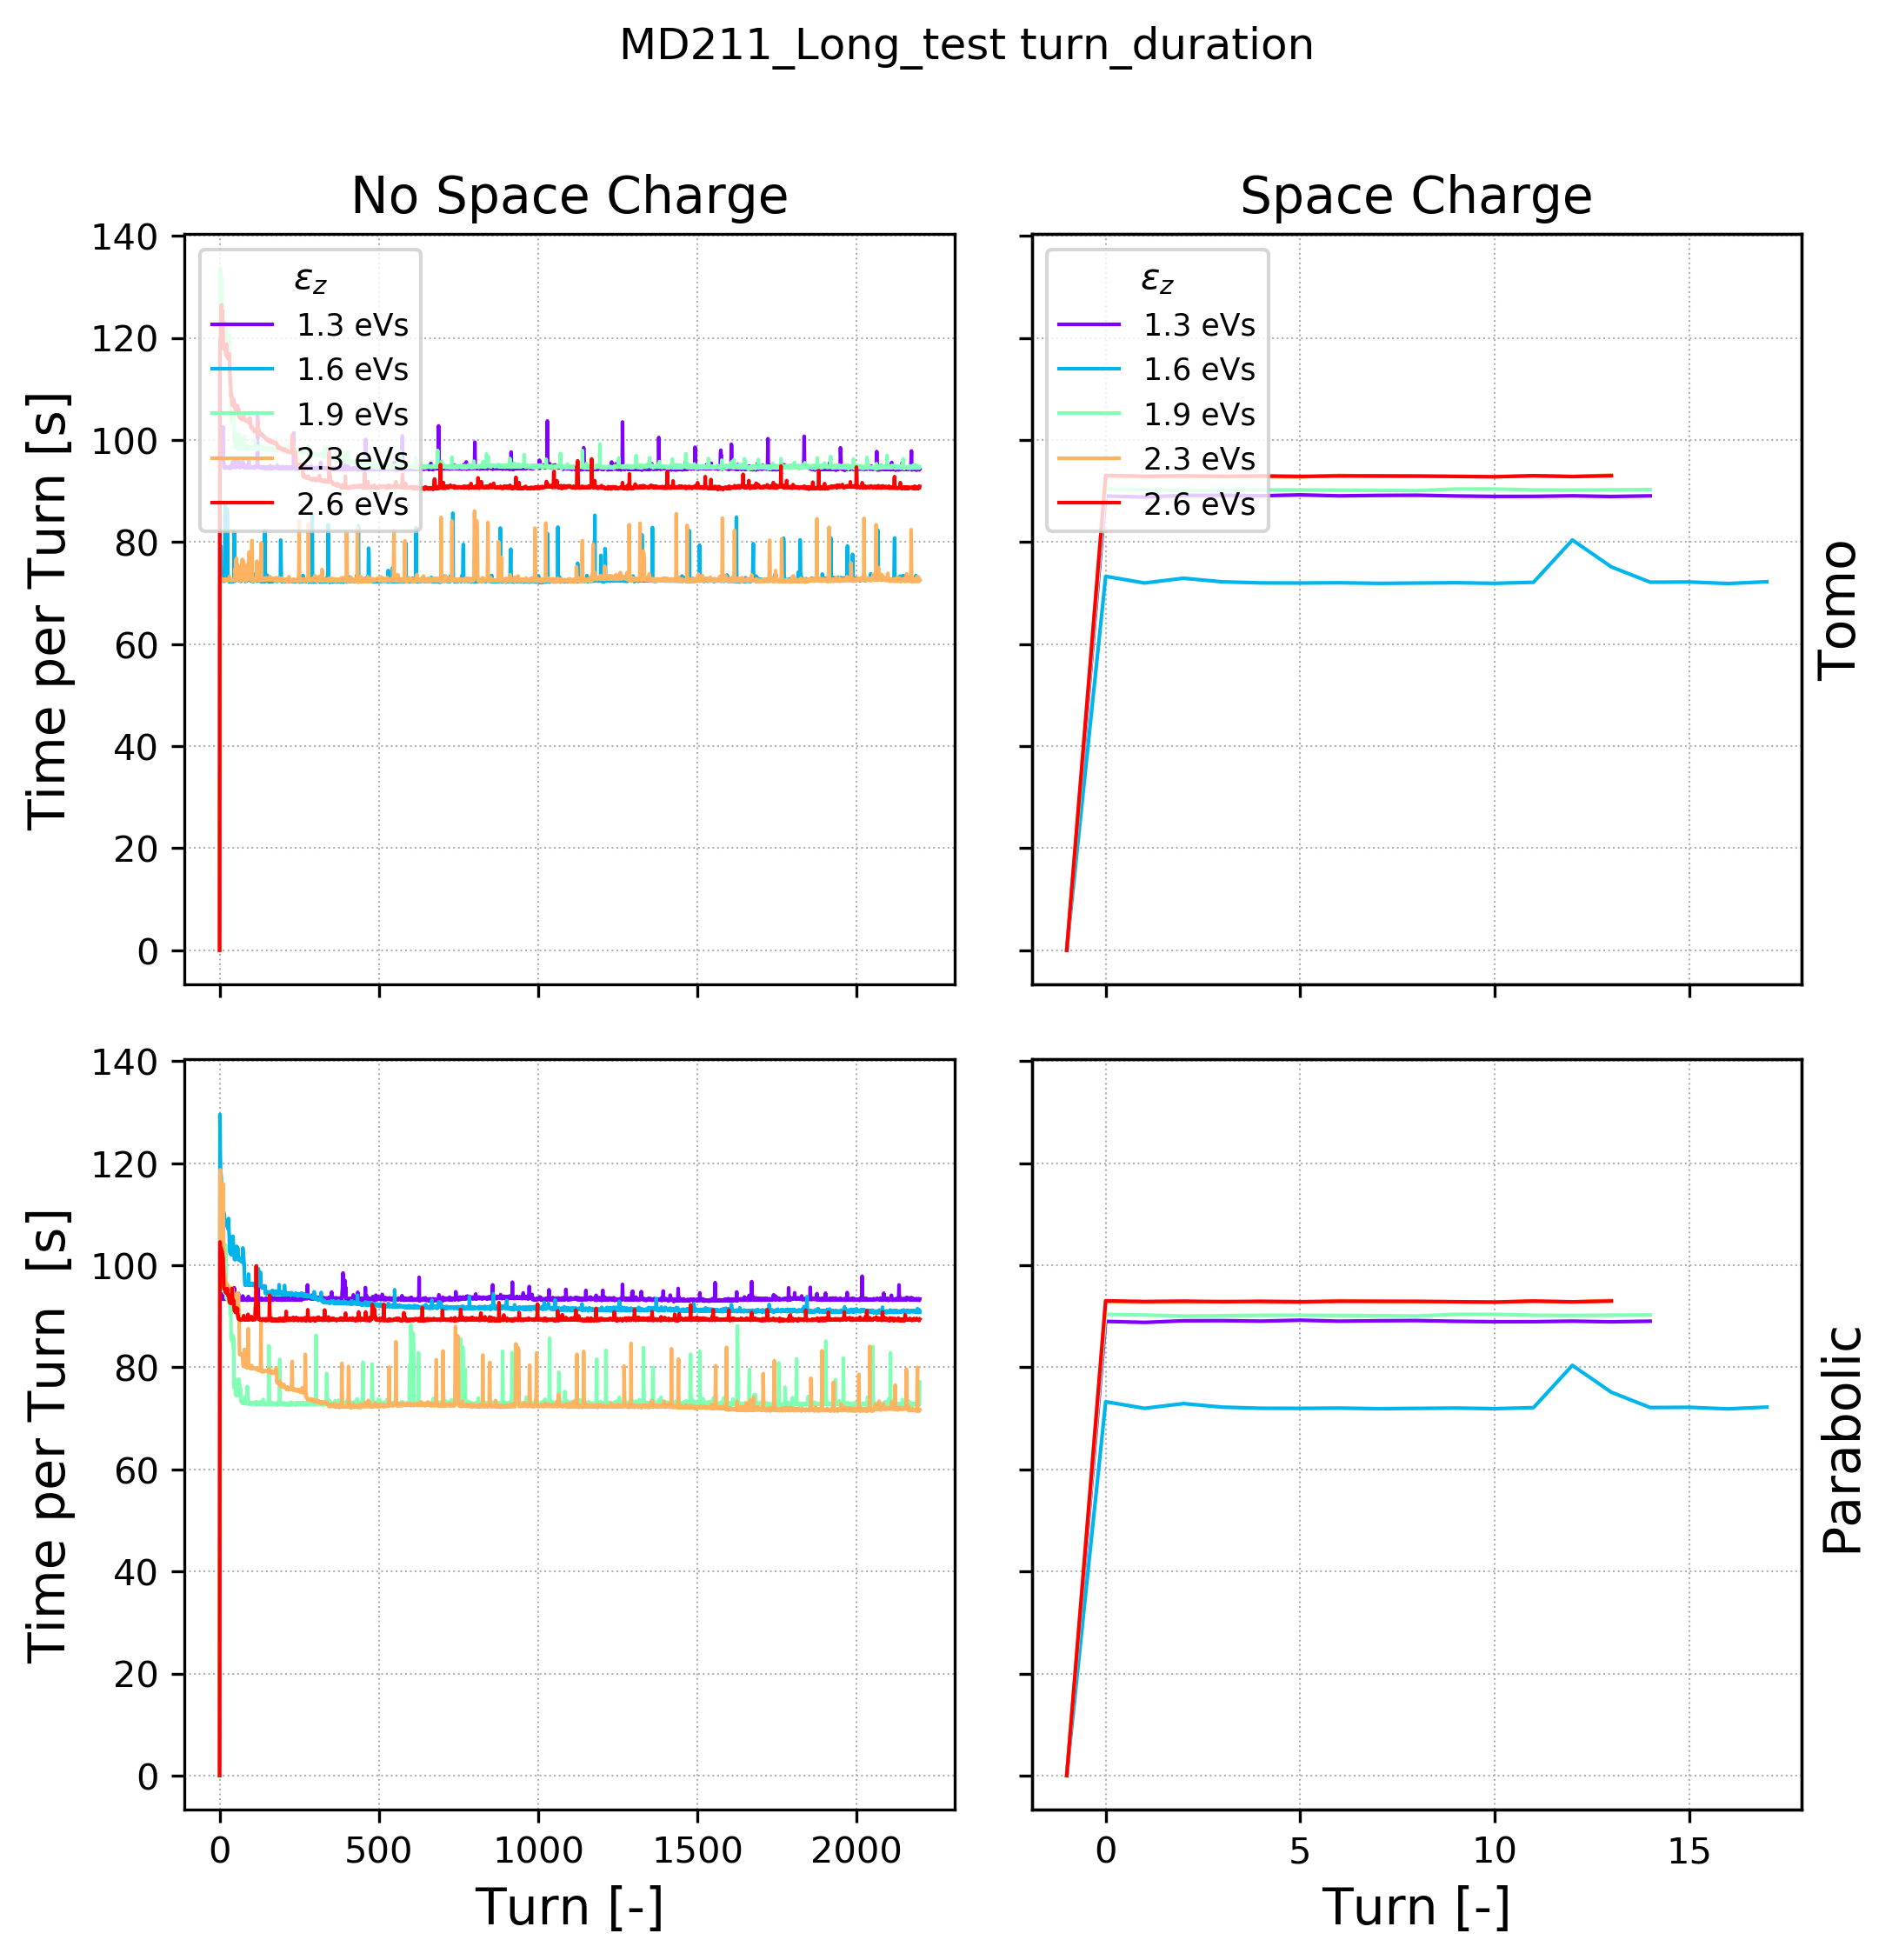

In [11]:
parameter = 'turn_duration'
multi1 = 1

fig, axs = plt.subplots(2, 2, sharex='col', sharey='row', gridspec_kw={'hspace': 0.1, 'wspace': 0.1})
(ax1, ax2), (ax3, ax4) = axs

tit = main_label + ' ' + parameter
fig.suptitle(tit)

ax1.set_ylabel('Time per Turn [s]');
ax3.set_ylabel('Time per Turn  [s]');
ax3.set_xlabel('Turn [-]');
ax4.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))

c_it = int(0)
for key, value in sorted(dd1.iteritems()):
        ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;

ax1.legend(loc=2, title=legend_label, fontsize='small');
ax1.grid(lw=0.5, ls=':');

c_it = int(0)
for key, value in sorted(dd2.iteritems()):
        ax2.plot(dd2[key]['turn'][0], dd2[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;        
ax2.grid(lw=0.5, ls=':');
ax2.legend(loc=2, title=legend_label, fontsize='small');
ax2.set_title(title_1)

c_it = int(0)
for key, value in sorted(dd3.iteritems()):
        ax3.plot(dd3[key]['turn'][0], dd3[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;
ax3.grid(lw=0.5, ls=':');
ax1.set_title(title_2)

c_it = int(0)
for key, value in sorted(dd4.iteritems()):
        ax4.plot(dd4[key]['turn'][0], dd4[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;
ax4.grid(lw=0.5, ls=':');

ax3.set_ylim(ax1.get_ylim())
ax5 = ax2.twinx()
ax5.set_ylabel(case_label_1);
ax6 = ax4.twinx()
ax6.set_ylabel(case_label_2);
ax5.set_yticklabels([]);
ax6.set_yticklabels([]);
ax5.set_yticks([]);
ax6.set_yticks([]);

for ax in axs.flat:
    ax.label_outer()   
    
savename = save_folder +'/' + main_label + '_' + parameter + '.png'
plt.savefig(savename, dpi = 800);

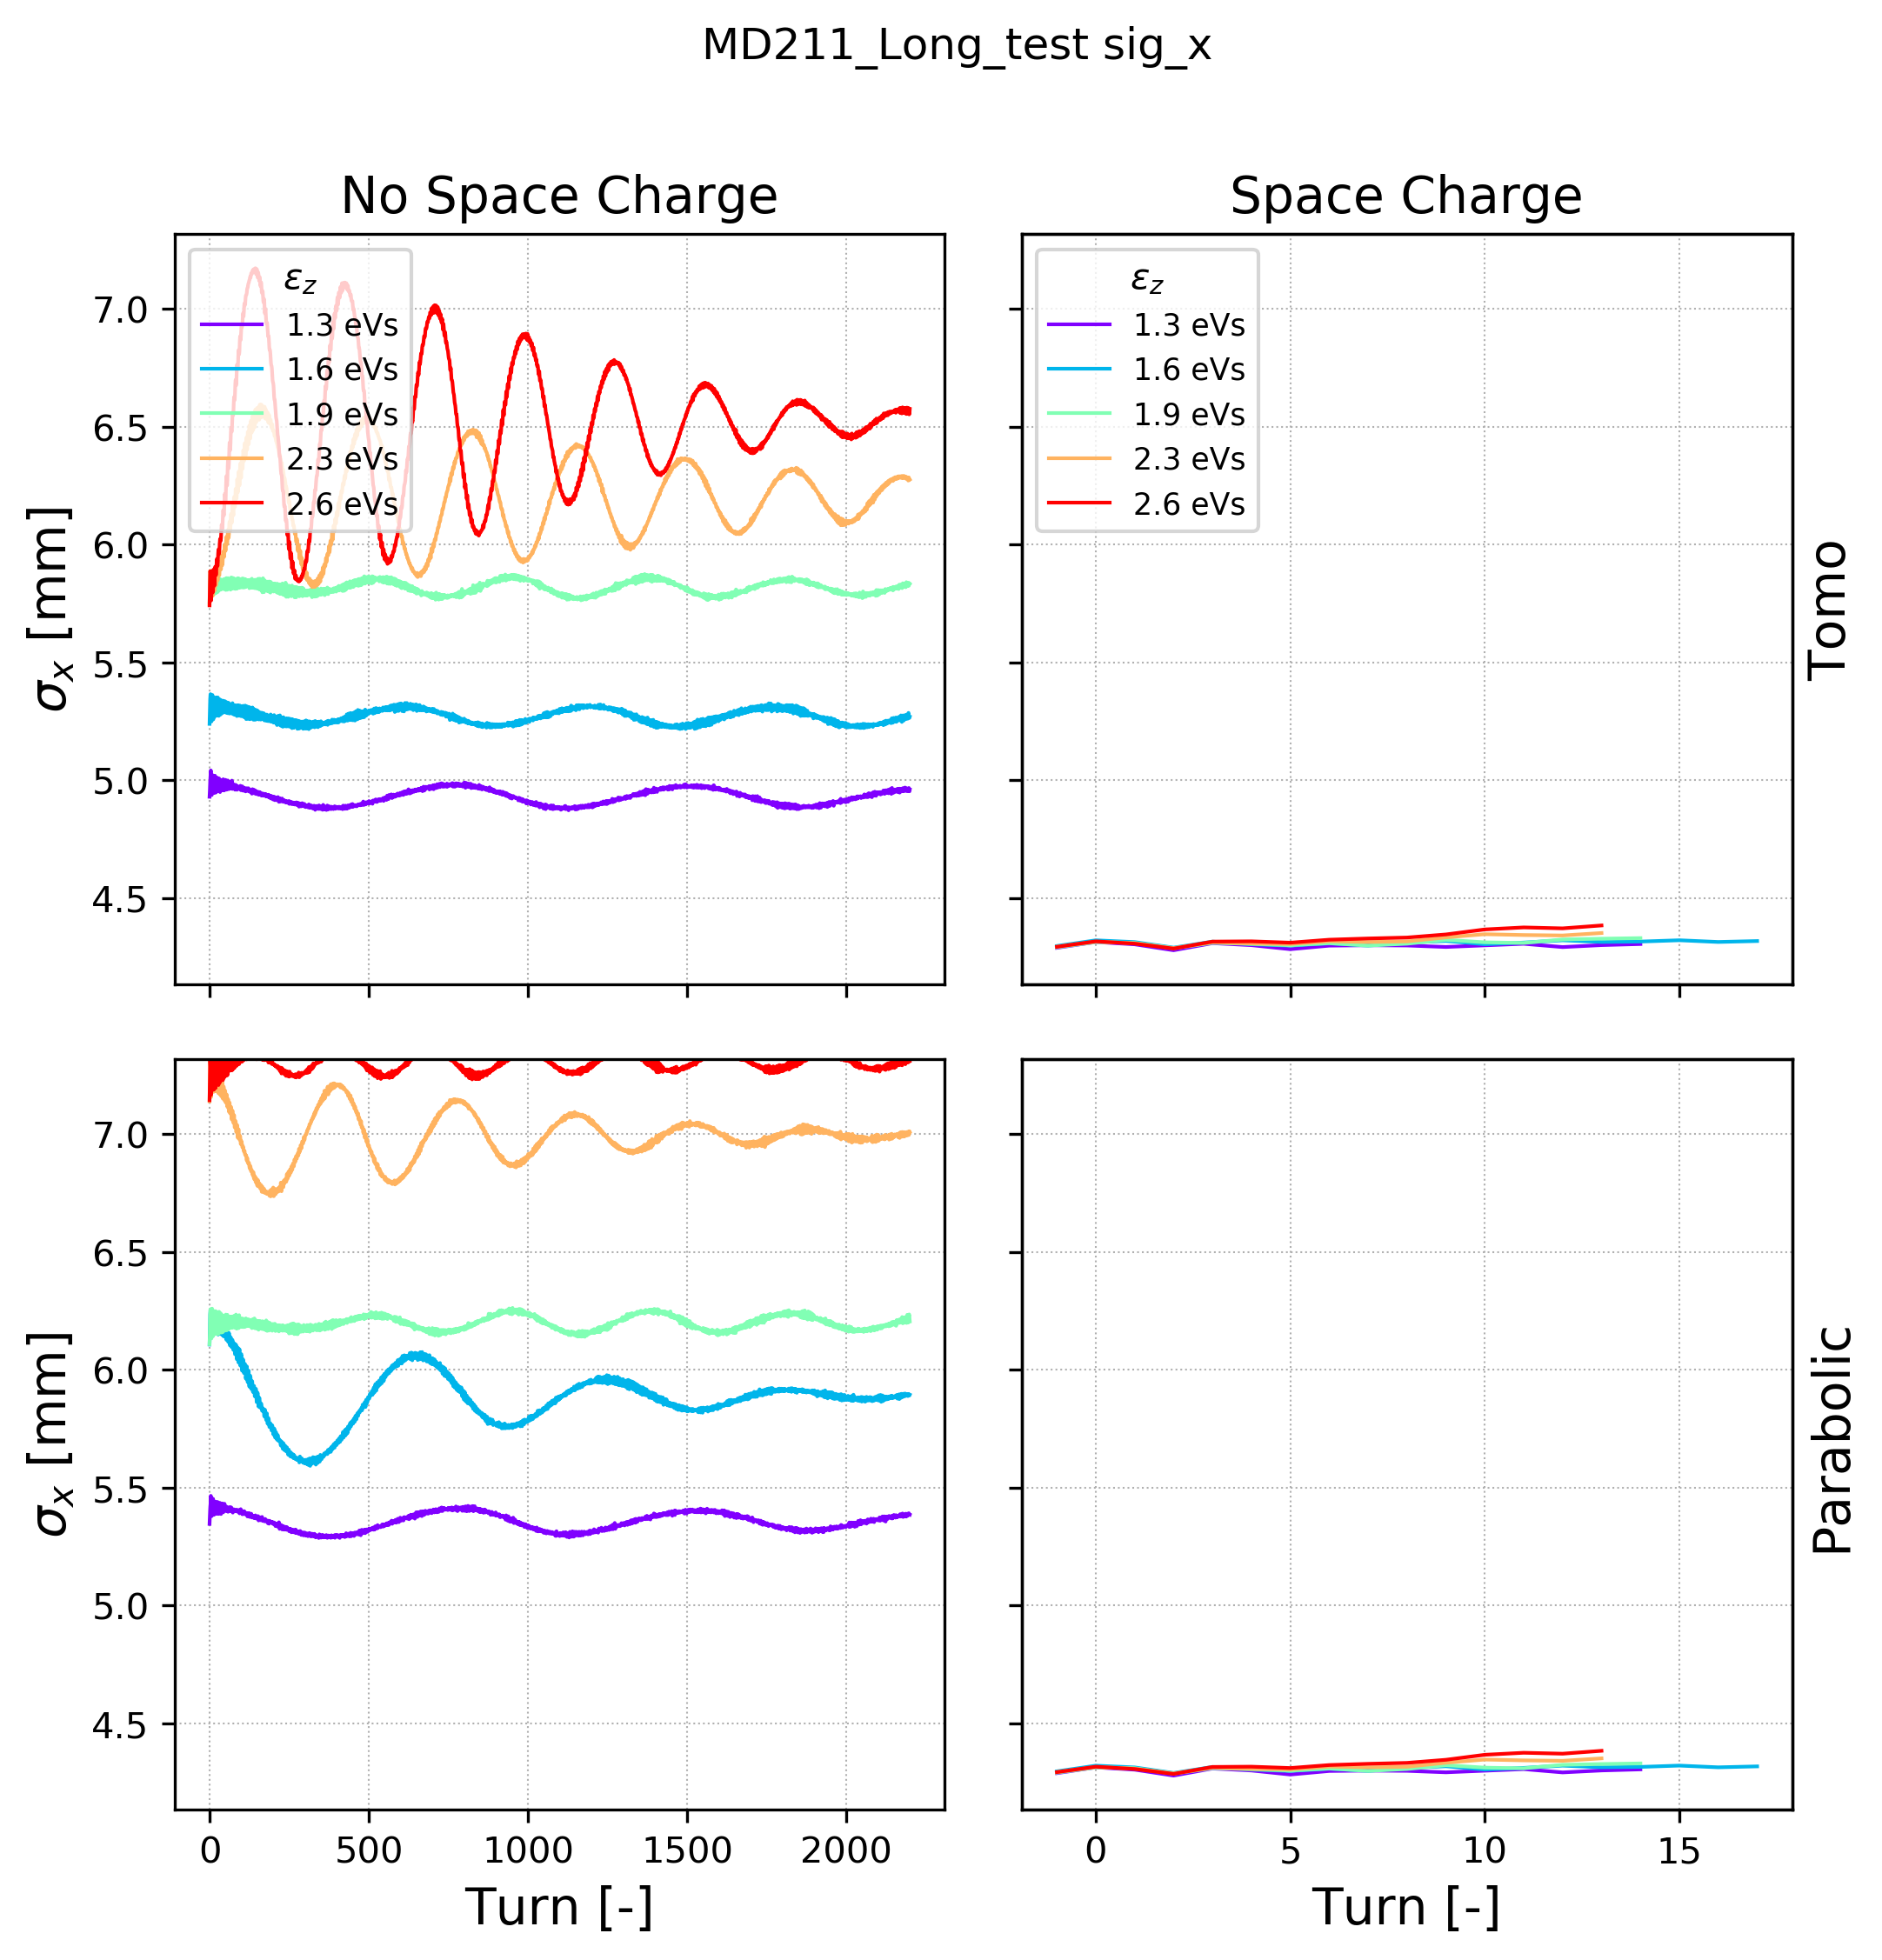

In [12]:
parameter = 'sig_x'
multi1 = 1E3

fig, axs = plt.subplots(2, 2, sharex='col', sharey='row', gridspec_kw={'hspace': 0.1, 'wspace': 0.1})
(ax1, ax2), (ax3, ax4) = axs

tit = main_label + ' ' + parameter
fig.suptitle(tit)

ax1.set_ylabel(r'$\sigma_x$ [mm]');
ax3.set_ylabel(r'$\sigma_x$ [mm]');
ax3.set_xlabel('Turn [-]');
ax4.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))

c_it = int(0)
for key, value in sorted(dd1.iteritems()):
        ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;

ax1.legend(loc=2, title=legend_label, fontsize='small');
ax1.grid(lw=0.5, ls=':');

c_it = int(0)
for key, value in sorted(dd2.iteritems()):
        ax2.plot(dd2[key]['turn'][0], dd2[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;        
ax2.grid(lw=0.5, ls=':');
ax2.legend(loc=2, title=legend_label, fontsize='small');
ax2.set_title(title_1)

c_it = int(0)
for key, value in sorted(dd3.iteritems()):
        ax3.plot(dd3[key]['turn'][0], dd3[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;
ax3.grid(lw=0.5, ls=':');
ax1.set_title(title_2)

c_it = int(0)
for key, value in sorted(dd4.iteritems()):
        ax4.plot(dd4[key]['turn'][0], dd4[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;
ax4.grid(lw=0.5, ls=':');

ax3.set_ylim(ax1.get_ylim())
ax5 = ax2.twinx()
ax5.set_ylabel(case_label_1);
ax6 = ax4.twinx()
ax6.set_ylabel(case_label_2);
ax5.set_yticklabels([]);
ax6.set_yticklabels([]);
ax5.set_yticks([]);
ax6.set_yticks([]);

for ax in axs.flat:
    ax.label_outer()   
    
savename = save_folder +'/' + main_label + '_' + parameter + '.png'
plt.savefig(savename, dpi = 800);

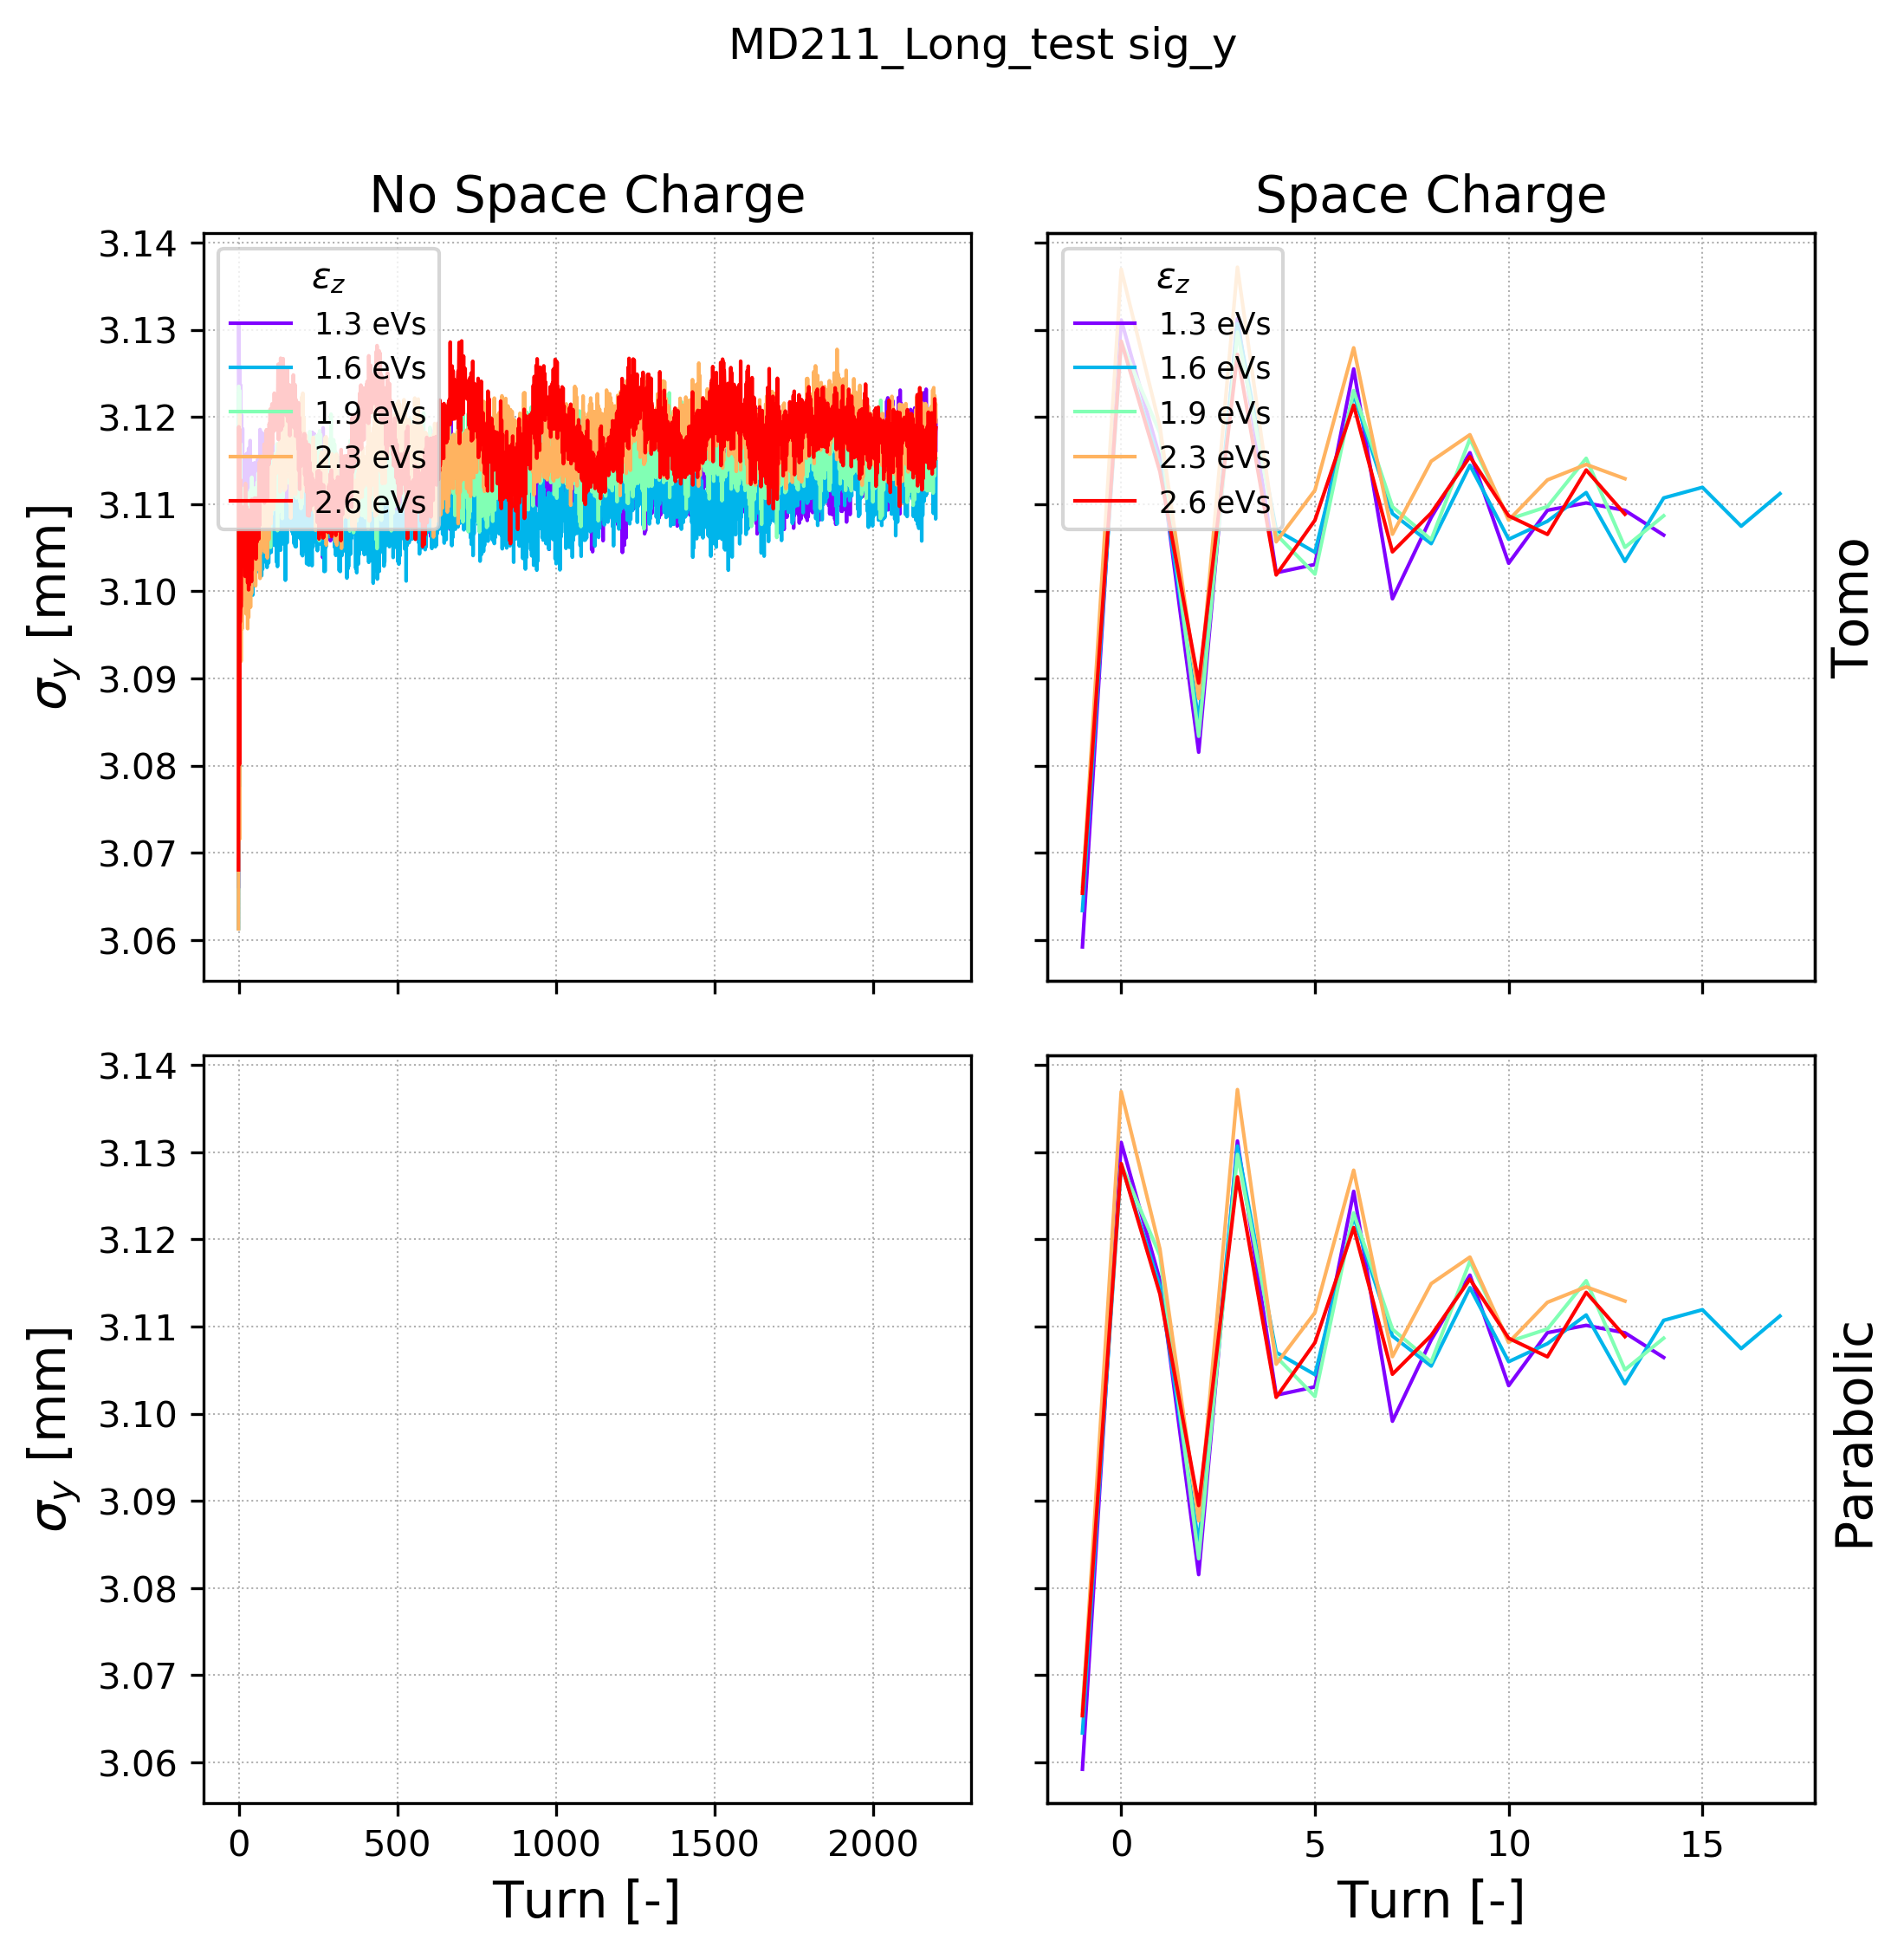

In [13]:
parameter = 'sig_y'
multi1 = 1E3

fig, axs = plt.subplots(2, 2, sharex='col', sharey='row', gridspec_kw={'hspace': 0.1, 'wspace': 0.1})
(ax1, ax2), (ax3, ax4) = axs

tit = main_label + ' ' + parameter
fig.suptitle(tit)

ax1.set_ylabel(r'$\sigma_y$ [mm]');
ax3.set_ylabel(r'$\sigma_y$ [mm]');
ax3.set_xlabel('Turn [-]');
ax4.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))

c_it = int(0)
for key, value in sorted(dd1.iteritems()):
        ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;

ax1.legend(loc=2, title=legend_label, fontsize='small');
ax1.grid(lw=0.5, ls=':');

c_it = int(0)
for key, value in sorted(dd2.iteritems()):
        ax2.plot(dd2[key]['turn'][0], dd2[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;        
ax2.grid(lw=0.5, ls=':');
ax2.legend(loc=2, title=legend_label, fontsize='small');
ax2.set_title(title_1)

c_it = int(0)
for key, value in sorted(dd3.iteritems()):
        ax3.plot(dd3[key]['turn'][0], dd3[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;
ax3.grid(lw=0.5, ls=':');
ax1.set_title(title_2)

c_it = int(0)
for key, value in sorted(dd4.iteritems()):
        ax4.plot(dd4[key]['turn'][0], dd4[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;
ax4.grid(lw=0.5, ls=':');

ax3.set_ylim(ax1.get_ylim())
ax5 = ax2.twinx()
ax5.set_ylabel(case_label_1);
ax6 = ax4.twinx()
ax6.set_ylabel(case_label_2);
ax5.set_yticklabels([]);
ax6.set_yticklabels([]);
ax5.set_yticks([]);
ax6.set_yticks([]);

for ax in axs.flat:
    ax.label_outer()   
    
savename = save_folder +'/' + main_label + '_' + parameter + '.png'
plt.savefig(savename, dpi = 800);

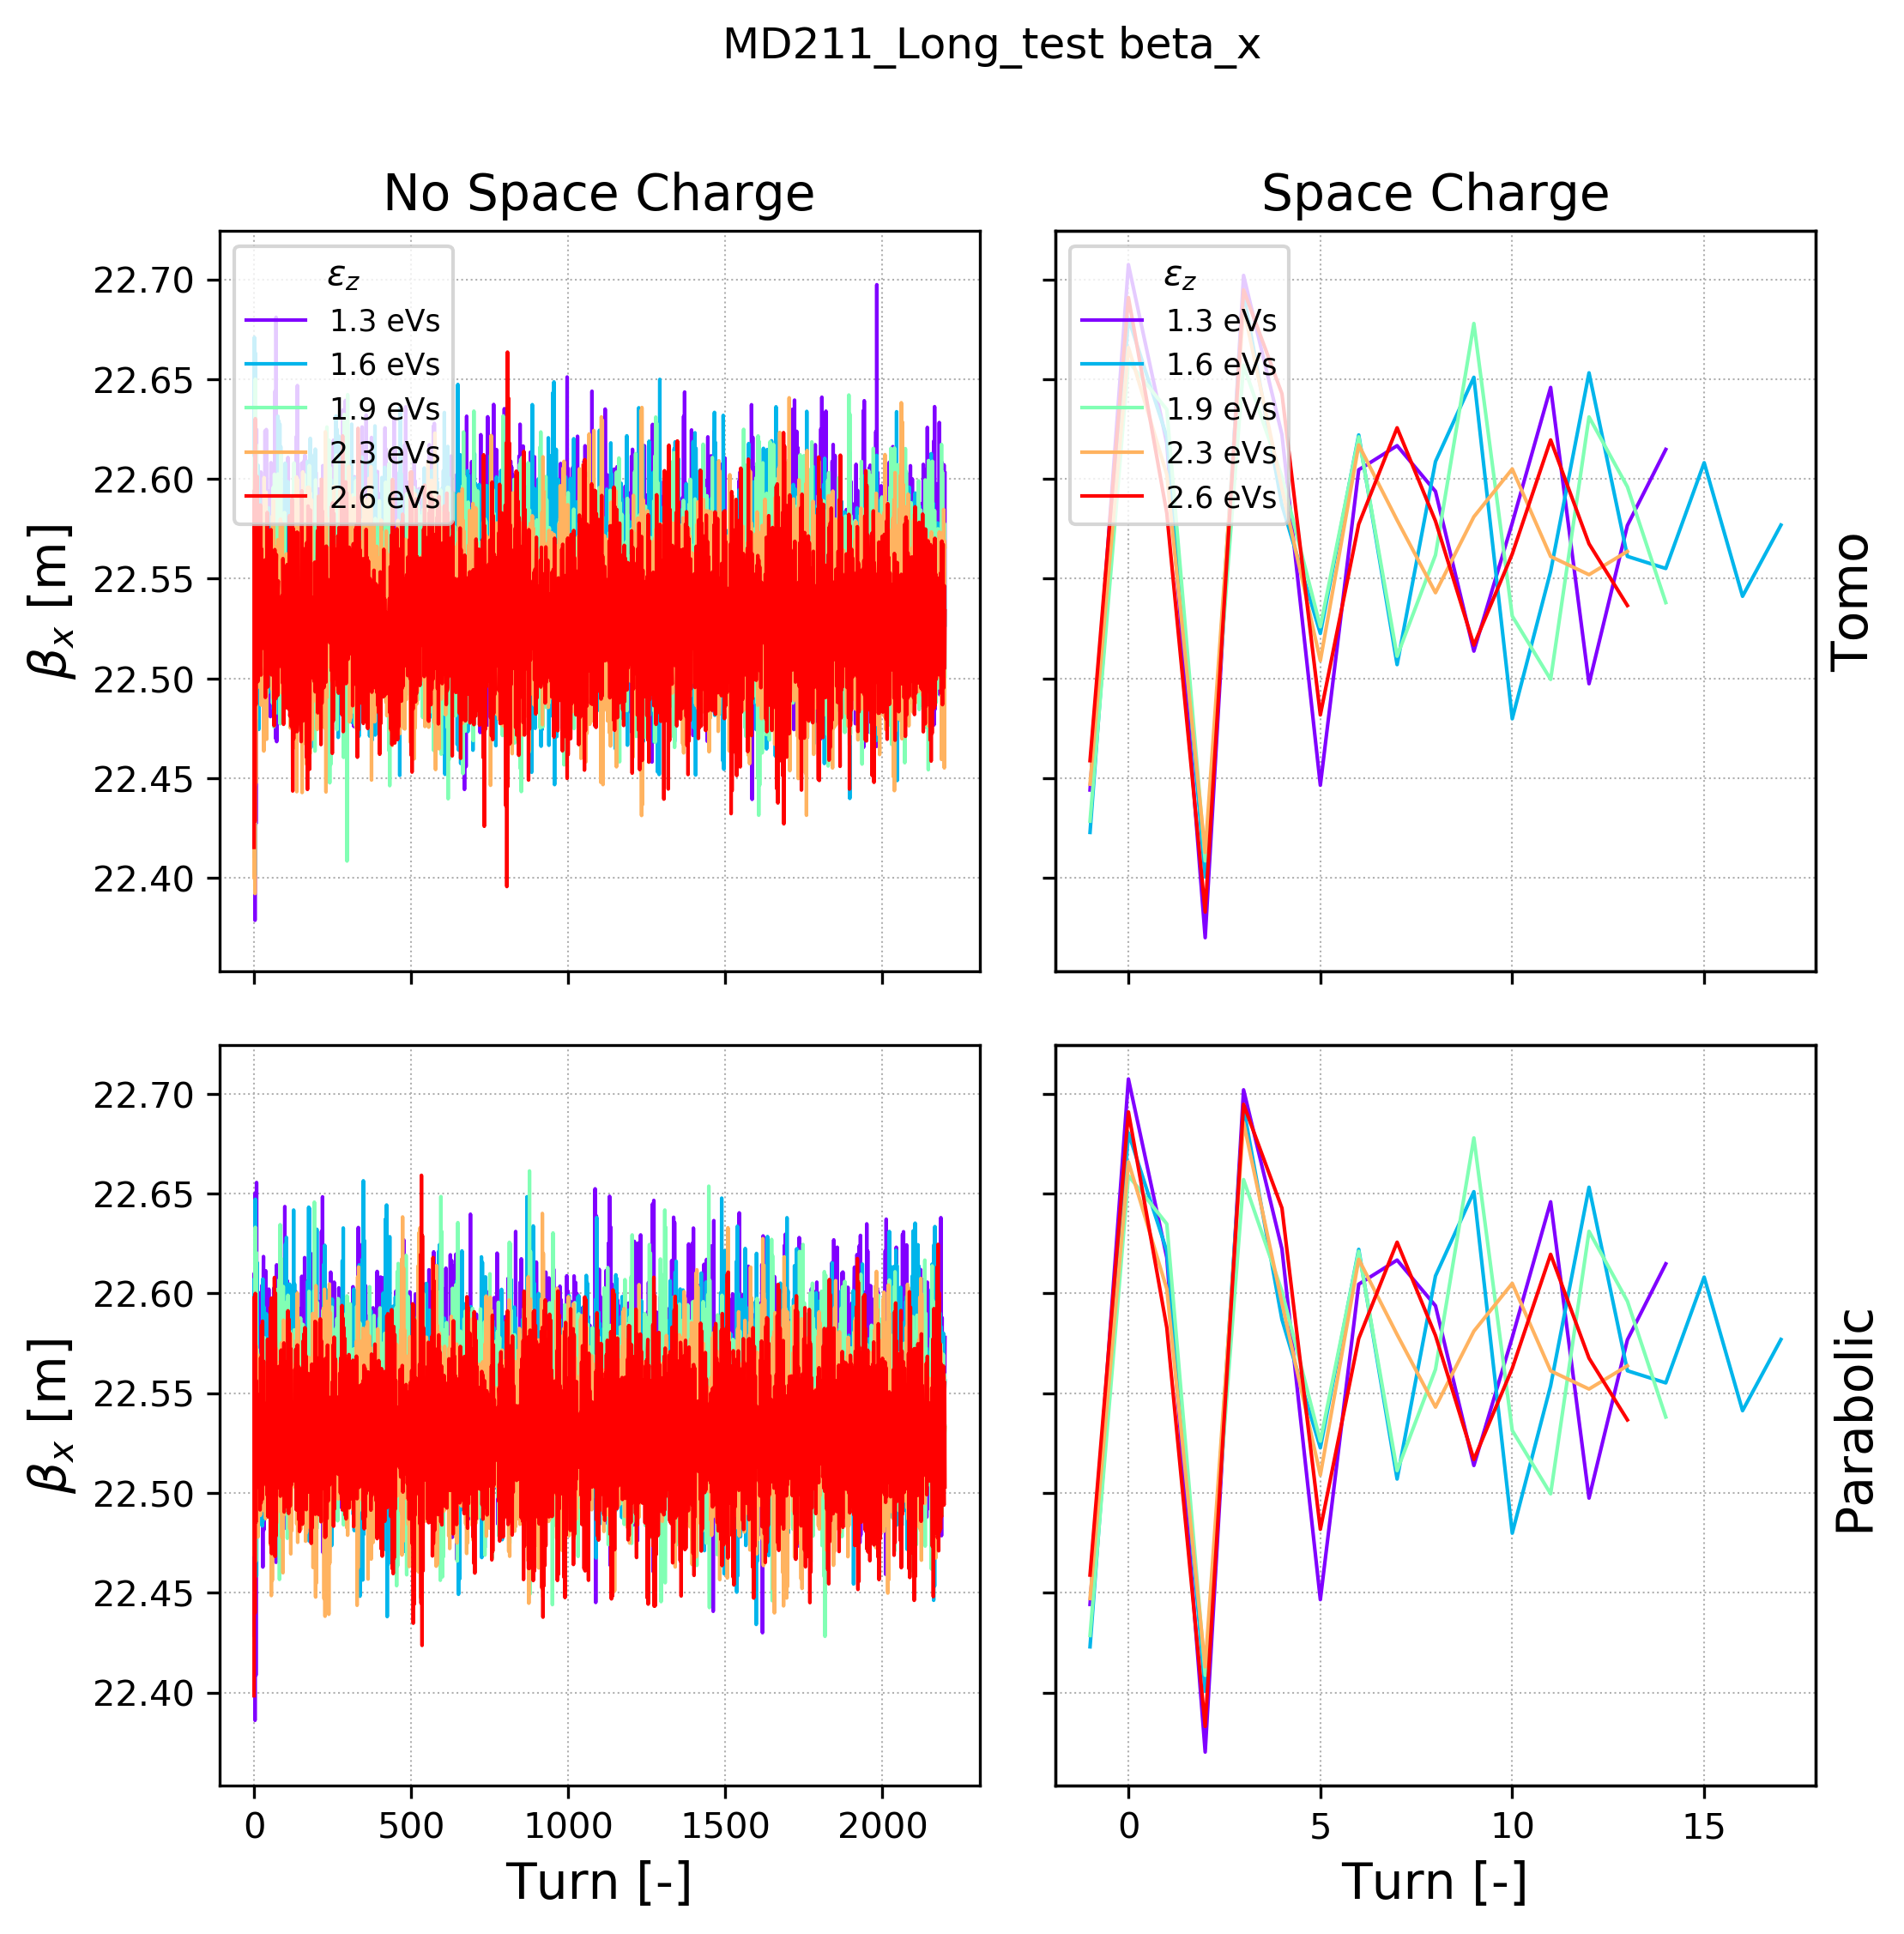

In [14]:
parameter = 'beta_x'
multi1 = 1

fig, axs = plt.subplots(2, 2, sharex='col', sharey='row', gridspec_kw={'hspace': 0.1, 'wspace': 0.1})
(ax1, ax2), (ax3, ax4) = axs

tit = main_label + ' ' + parameter
fig.suptitle(tit)

ax1.set_ylabel(r'$\beta_x$ [m]');
ax3.set_ylabel(r'$\beta_x$ [m]');
ax3.set_xlabel('Turn [-]');
ax4.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))

c_it = int(0)
for key, value in sorted(dd1.iteritems()):
        ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;

ax1.legend(loc=2, title=legend_label, fontsize='small');
ax1.grid(lw=0.5, ls=':');

c_it = int(0)
for key, value in sorted(dd2.iteritems()):
        ax2.plot(dd2[key]['turn'][0], dd2[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;        
ax2.grid(lw=0.5, ls=':');
ax2.legend(loc=2, title=legend_label, fontsize='small');
ax2.set_title(title_1)

c_it = int(0)
for key, value in sorted(dd3.iteritems()):
        ax3.plot(dd3[key]['turn'][0], dd3[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;
ax3.grid(lw=0.5, ls=':');
ax1.set_title(title_2)

c_it = int(0)
for key, value in sorted(dd4.iteritems()):
        ax4.plot(dd4[key]['turn'][0], dd4[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;
ax4.grid(lw=0.5, ls=':');

ax3.set_ylim(ax1.get_ylim())
ax5 = ax2.twinx()
ax5.set_ylabel(case_label_1);
ax6 = ax4.twinx()
ax6.set_ylabel(case_label_2);
ax5.set_yticklabels([]);
ax6.set_yticklabels([]);
ax5.set_yticks([]);
ax6.set_yticks([]);

for ax in axs.flat:
    ax.label_outer()   
    
savename = save_folder +'/' + main_label + '_' + parameter + '.png'
plt.savefig(savename, dpi = 800);

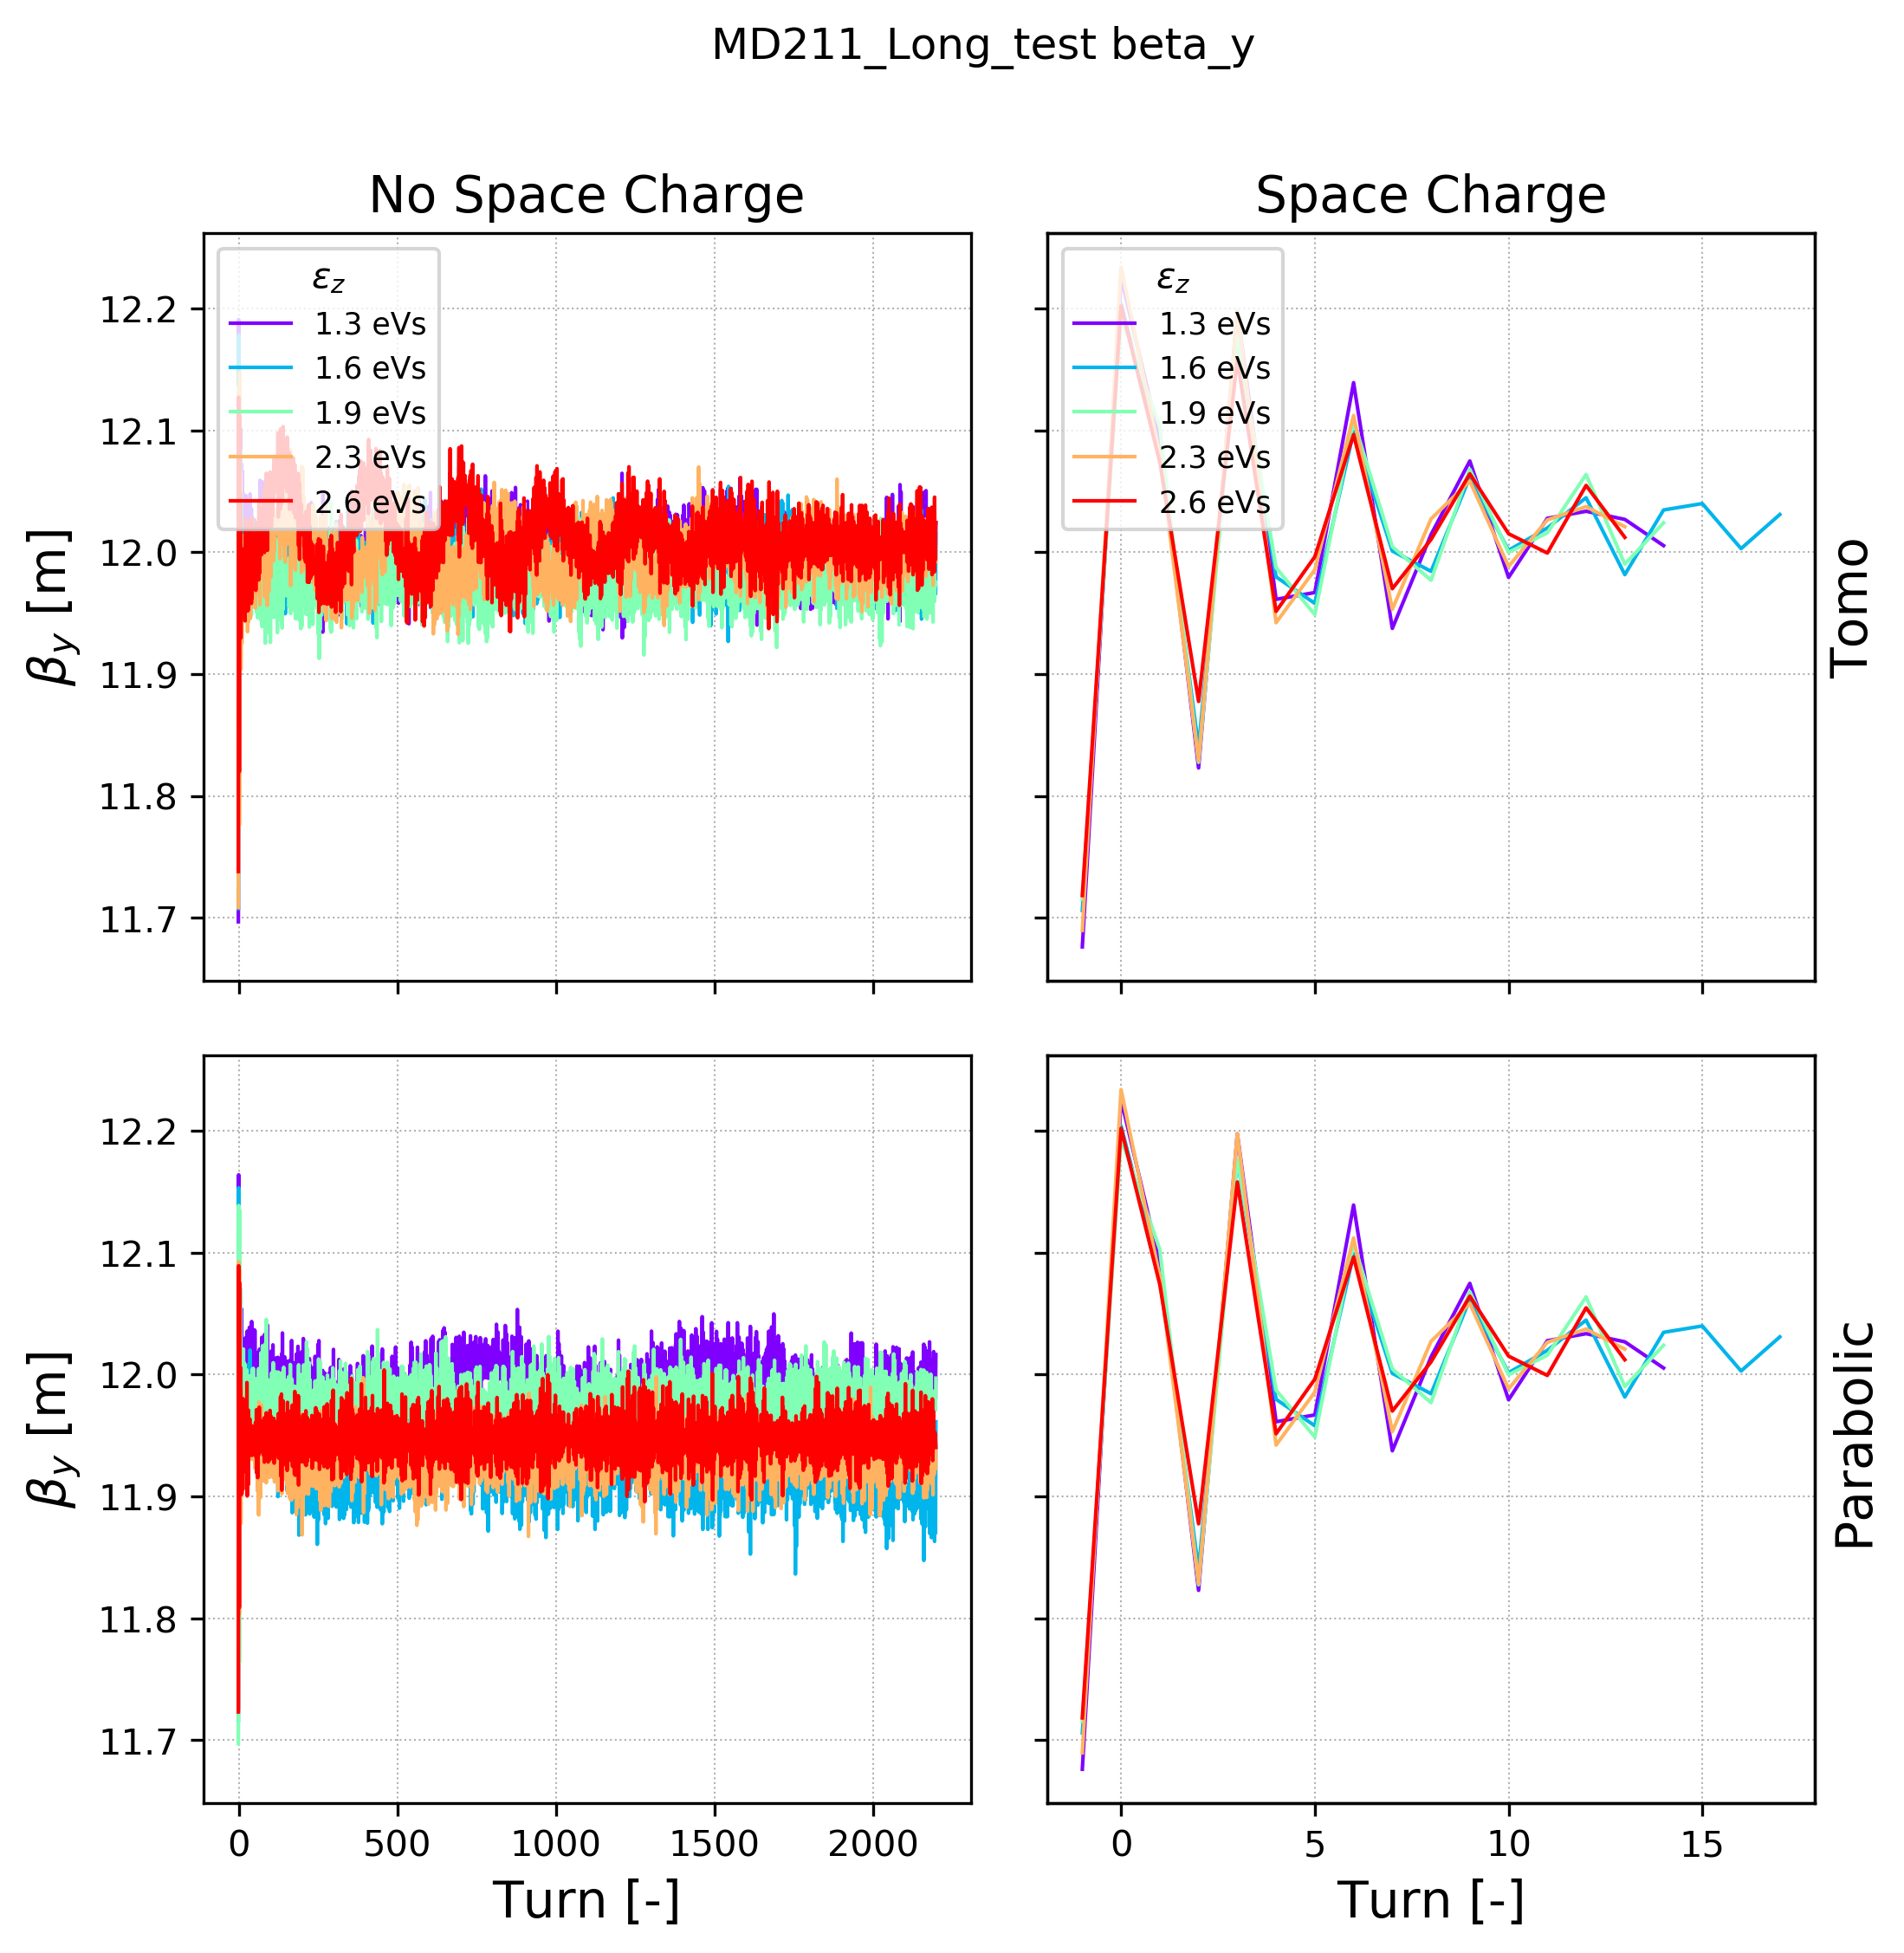

In [15]:
parameter = 'beta_y'
multi1 = 1

fig, axs = plt.subplots(2, 2, sharex='col', sharey='row', gridspec_kw={'hspace': 0.1, 'wspace': 0.1})
(ax1, ax2), (ax3, ax4) = axs

tit = main_label + ' ' + parameter
fig.suptitle(tit)

ax1.set_ylabel(r'$\beta_y$ [m]');
ax3.set_ylabel(r'$\beta_y$ [m]');
ax3.set_xlabel('Turn [-]');
ax4.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))

c_it = int(0)
for key, value in sorted(dd1.iteritems()):
        ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;

ax1.legend(loc=2, title=legend_label, fontsize='small');
ax1.grid(lw=0.5, ls=':');

c_it = int(0)
for key, value in sorted(dd2.iteritems()):
        ax2.plot(dd2[key]['turn'][0], dd2[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;        
ax2.grid(lw=0.5, ls=':');
ax2.legend(loc=2, title=legend_label, fontsize='small');
ax2.set_title(title_1)

c_it = int(0)
for key, value in sorted(dd3.iteritems()):
        ax3.plot(dd3[key]['turn'][0], dd3[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;
ax3.grid(lw=0.5, ls=':');
ax1.set_title(title_2)

c_it = int(0)
for key, value in sorted(dd4.iteritems()):
        ax4.plot(dd4[key]['turn'][0], dd4[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;
ax4.grid(lw=0.5, ls=':');

ax3.set_ylim(ax1.get_ylim())
ax5 = ax2.twinx()
ax5.set_ylabel(case_label_1);
ax6 = ax4.twinx()
ax6.set_ylabel(case_label_2);
ax5.set_yticklabels([]);
ax6.set_yticklabels([]);
ax5.set_yticks([]);
ax6.set_yticks([]);

for ax in axs.flat:
    ax.label_outer()   
    
savename = save_folder +'/' + main_label + '_' + parameter + '.png'
plt.savefig(savename, dpi = 800);

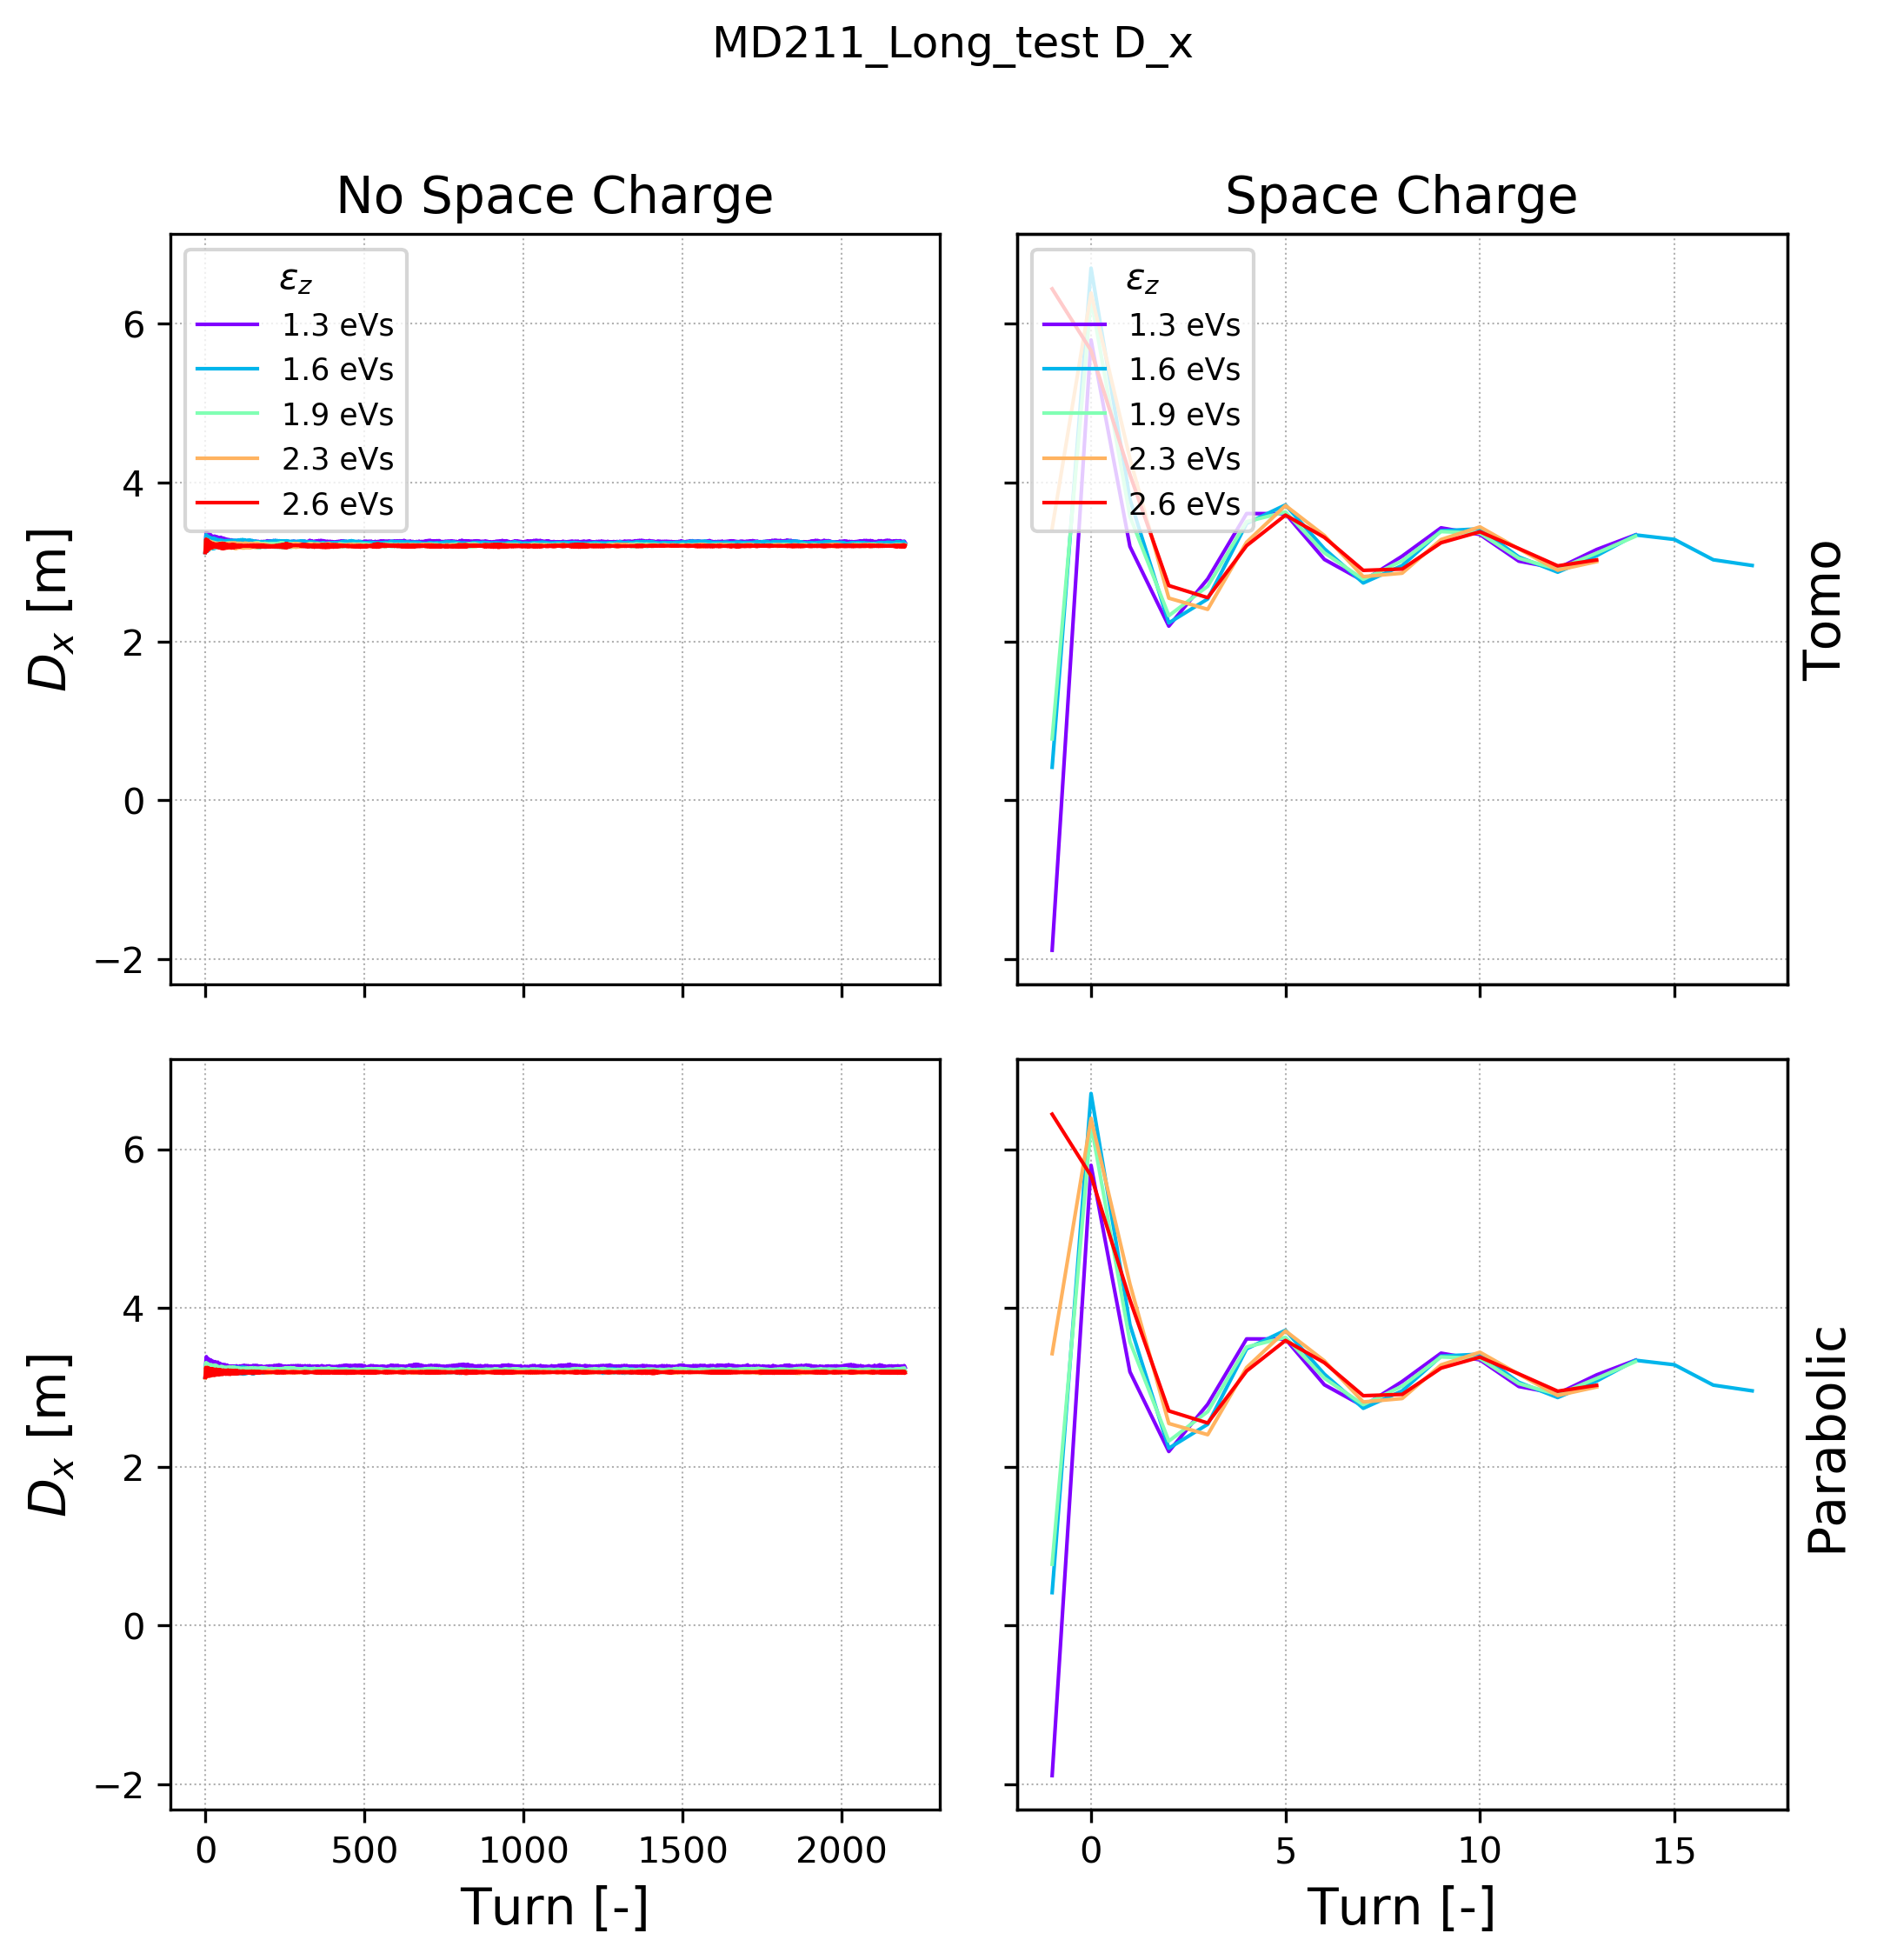

In [16]:
parameter = 'D_x'
multi1 = 1

fig, axs = plt.subplots(2, 2, sharex='col', sharey='row', gridspec_kw={'hspace': 0.1, 'wspace': 0.1})
(ax1, ax2), (ax3, ax4) = axs

tit = main_label + ' ' + parameter
fig.suptitle(tit)

ax1.set_ylabel(r'$D_x$ [m]');
ax3.set_ylabel(r'$D_x$ [m]');
ax3.set_xlabel('Turn [-]');
ax4.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))

c_it = int(0)
for key, value in sorted(dd1.iteritems()):
        ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;

ax1.legend(loc=2, title=legend_label, fontsize='small');
ax1.grid(lw=0.5, ls=':');

c_it = int(0)
for key, value in sorted(dd2.iteritems()):
        ax2.plot(dd2[key]['turn'][0], dd2[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;        
ax2.grid(lw=0.5, ls=':');
ax2.legend(loc=2, title=legend_label, fontsize='small');
ax2.set_title(title_1)

c_it = int(0)
for key, value in sorted(dd3.iteritems()):
        ax3.plot(dd3[key]['turn'][0], dd3[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;
ax3.grid(lw=0.5, ls=':');
ax1.set_title(title_2)

c_it = int(0)
for key, value in sorted(dd4.iteritems()):
        ax4.plot(dd4[key]['turn'][0], dd4[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;
ax4.grid(lw=0.5, ls=':');

ax3.set_ylim(ax1.get_ylim())
ax5 = ax2.twinx()
ax5.set_ylabel(case_label_1);
ax6 = ax4.twinx()
ax6.set_ylabel(case_label_2);
ax5.set_yticklabels([]);
ax6.set_yticklabels([]);
ax5.set_yticks([]);
ax6.set_yticks([]);

for ax in axs.flat:
    ax.label_outer()   
    
savename = save_folder +'/' + main_label + '_' + parameter + '.png'
plt.savefig(savename, dpi = 800);

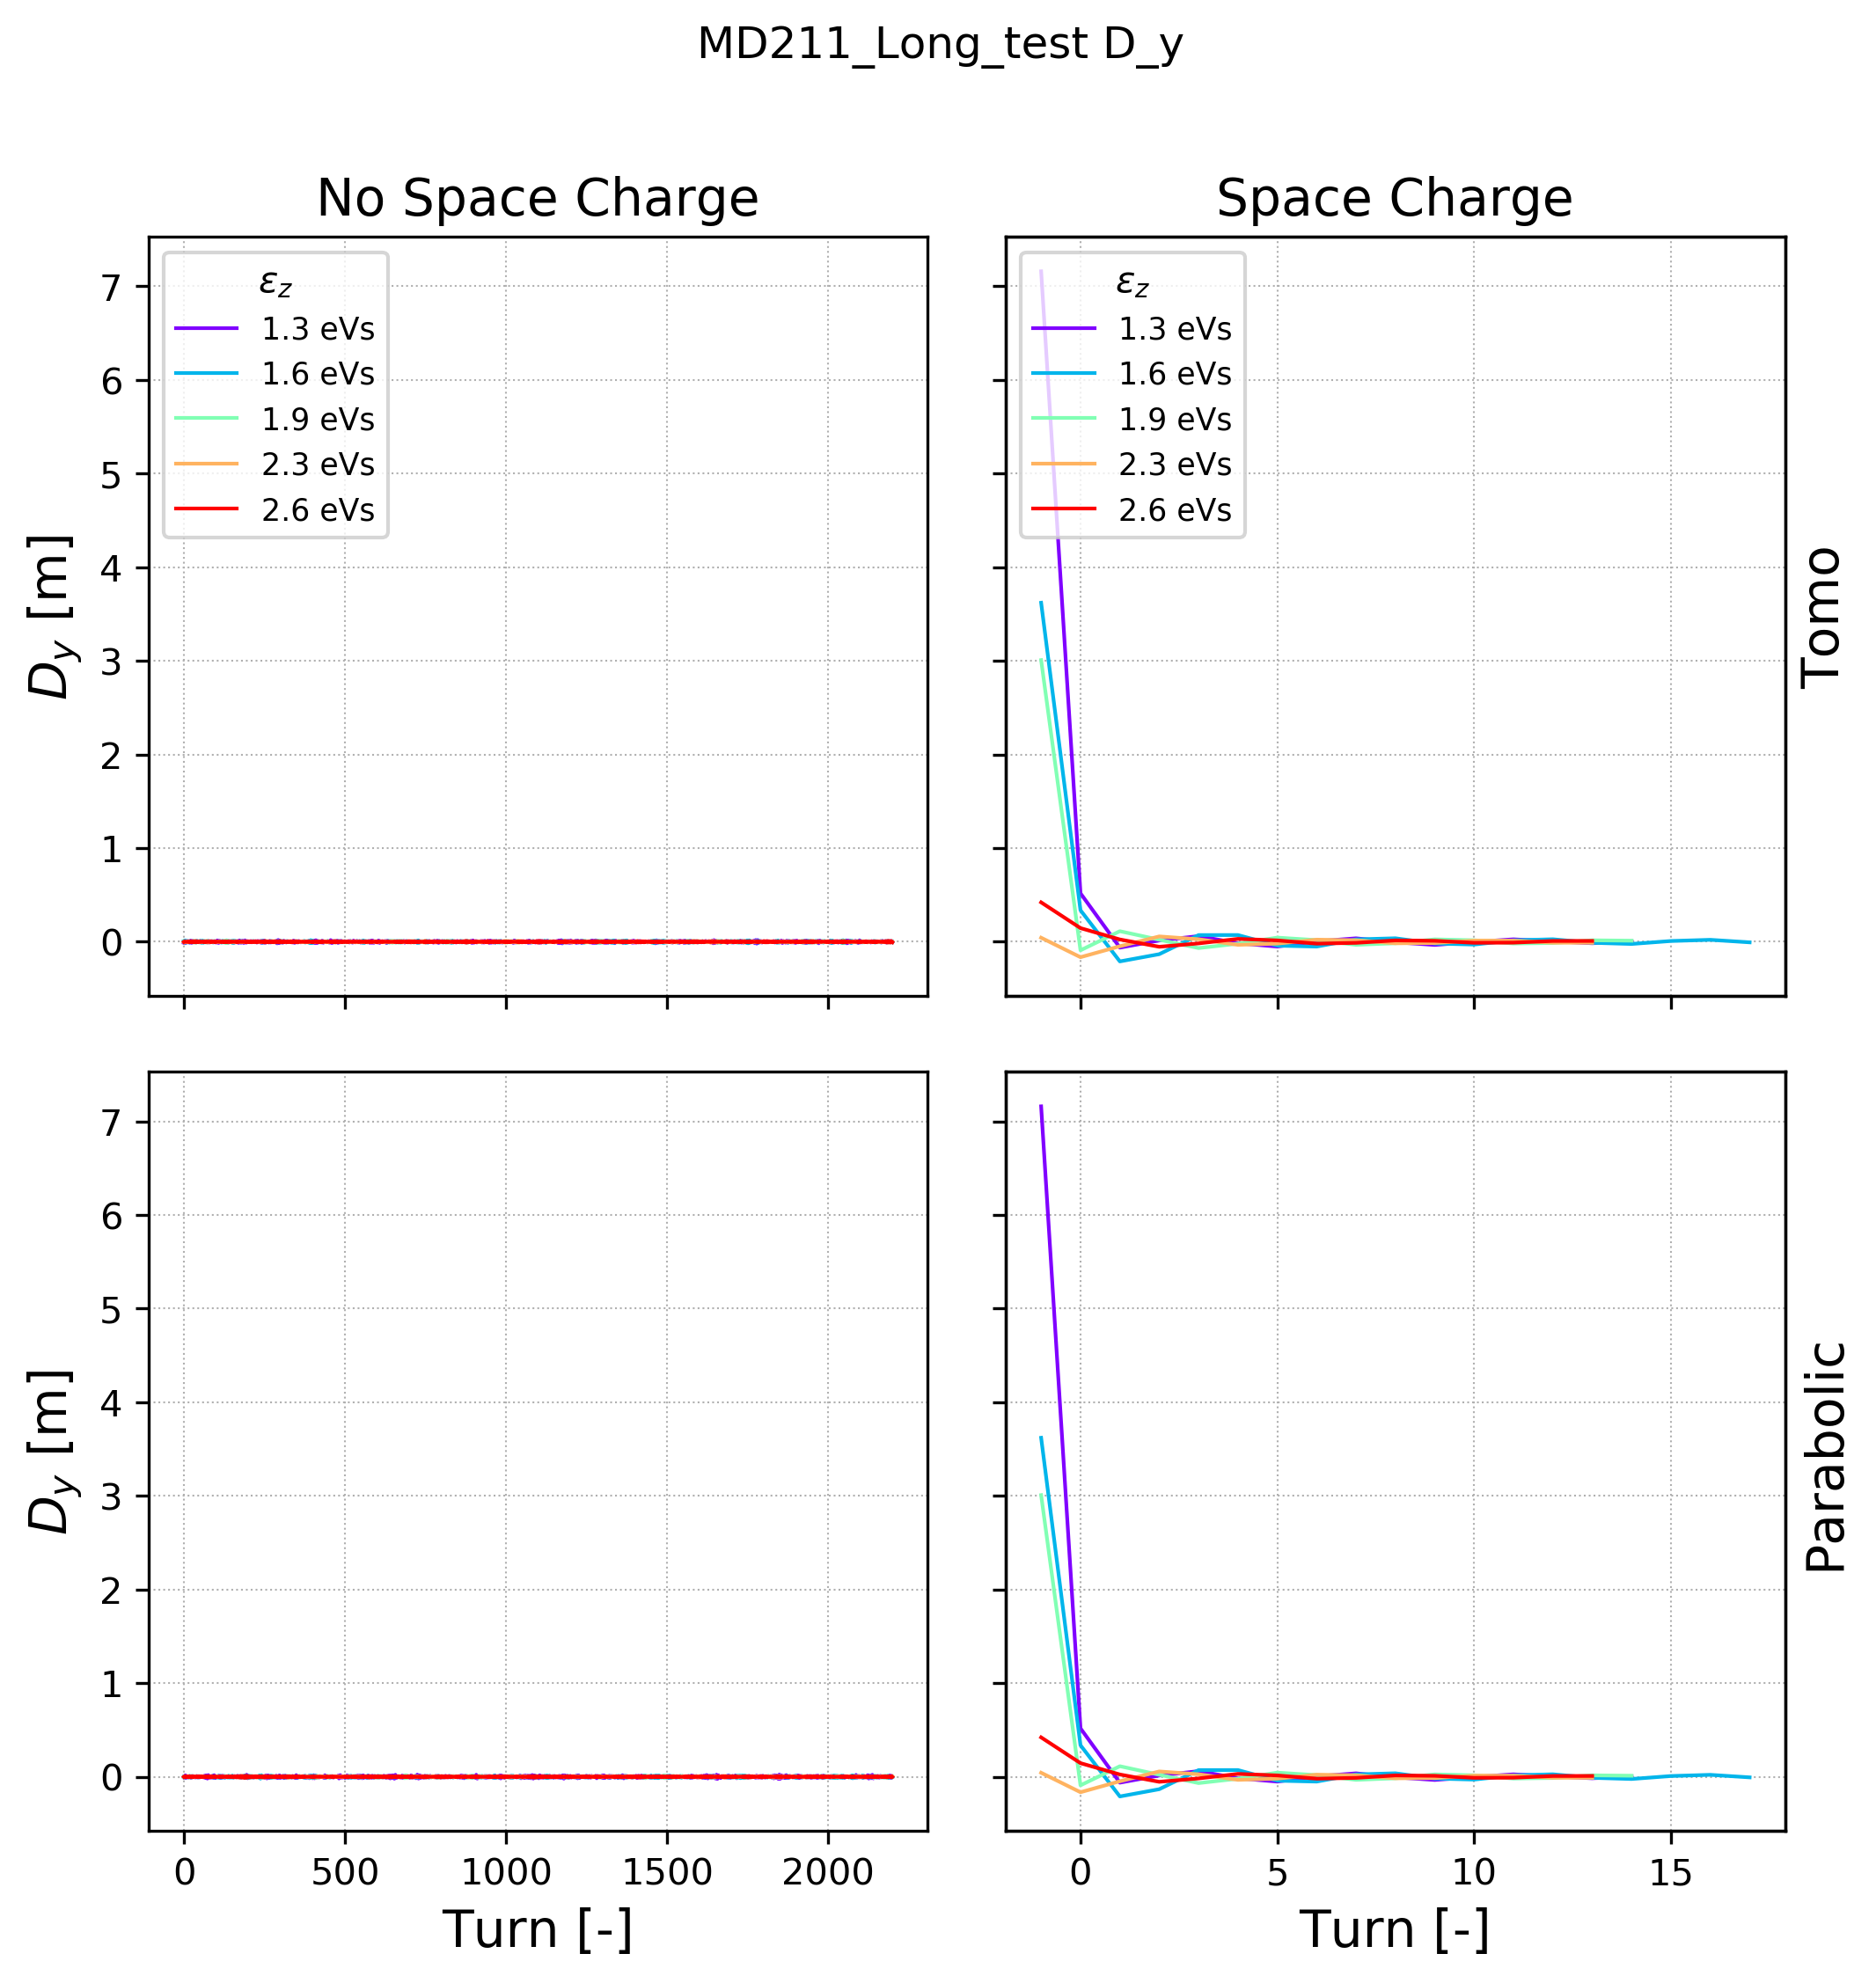

In [17]:
parameter = 'D_y'
multi1 = 1

fig, axs = plt.subplots(2, 2, sharex='col', sharey='row', gridspec_kw={'hspace': 0.1, 'wspace': 0.1})
(ax1, ax2), (ax3, ax4) = axs

tit = main_label + ' ' + parameter
fig.suptitle(tit)

ax1.set_ylabel(r'$D_y$ [m]');
ax3.set_ylabel(r'$D_y$ [m]');
ax3.set_xlabel('Turn [-]');
ax4.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))

c_it = int(0)
for key, value in sorted(dd1.iteritems()):
        ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;

ax1.legend(loc=2, title=legend_label, fontsize='small');
ax1.grid(lw=0.5, ls=':');

c_it = int(0)
for key, value in sorted(dd2.iteritems()):
        ax2.plot(dd2[key]['turn'][0], dd2[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;        
ax2.grid(lw=0.5, ls=':');
ax2.legend(loc=2, title=legend_label, fontsize='small');
ax2.set_title(title_1)

c_it = int(0)
for key, value in sorted(dd3.iteritems()):
        ax3.plot(dd3[key]['turn'][0], dd3[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;
ax3.grid(lw=0.5, ls=':');
ax1.set_title(title_2)

c_it = int(0)
for key, value in sorted(dd4.iteritems()):
        ax4.plot(dd4[key]['turn'][0], dd4[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;
ax4.grid(lw=0.5, ls=':');

ax3.set_ylim(ax1.get_ylim())
ax5 = ax2.twinx()
ax5.set_ylabel(case_label_1);
ax6 = ax4.twinx()
ax6.set_ylabel(case_label_2);
ax5.set_yticklabels([]);
ax6.set_yticklabels([]);
ax5.set_yticks([]);
ax6.set_yticks([]);

for ax in axs.flat:
    ax.label_outer()   
    
savename = save_folder +'/' + main_label + '_' + parameter + '.png'
plt.savefig(savename, dpi = 800);

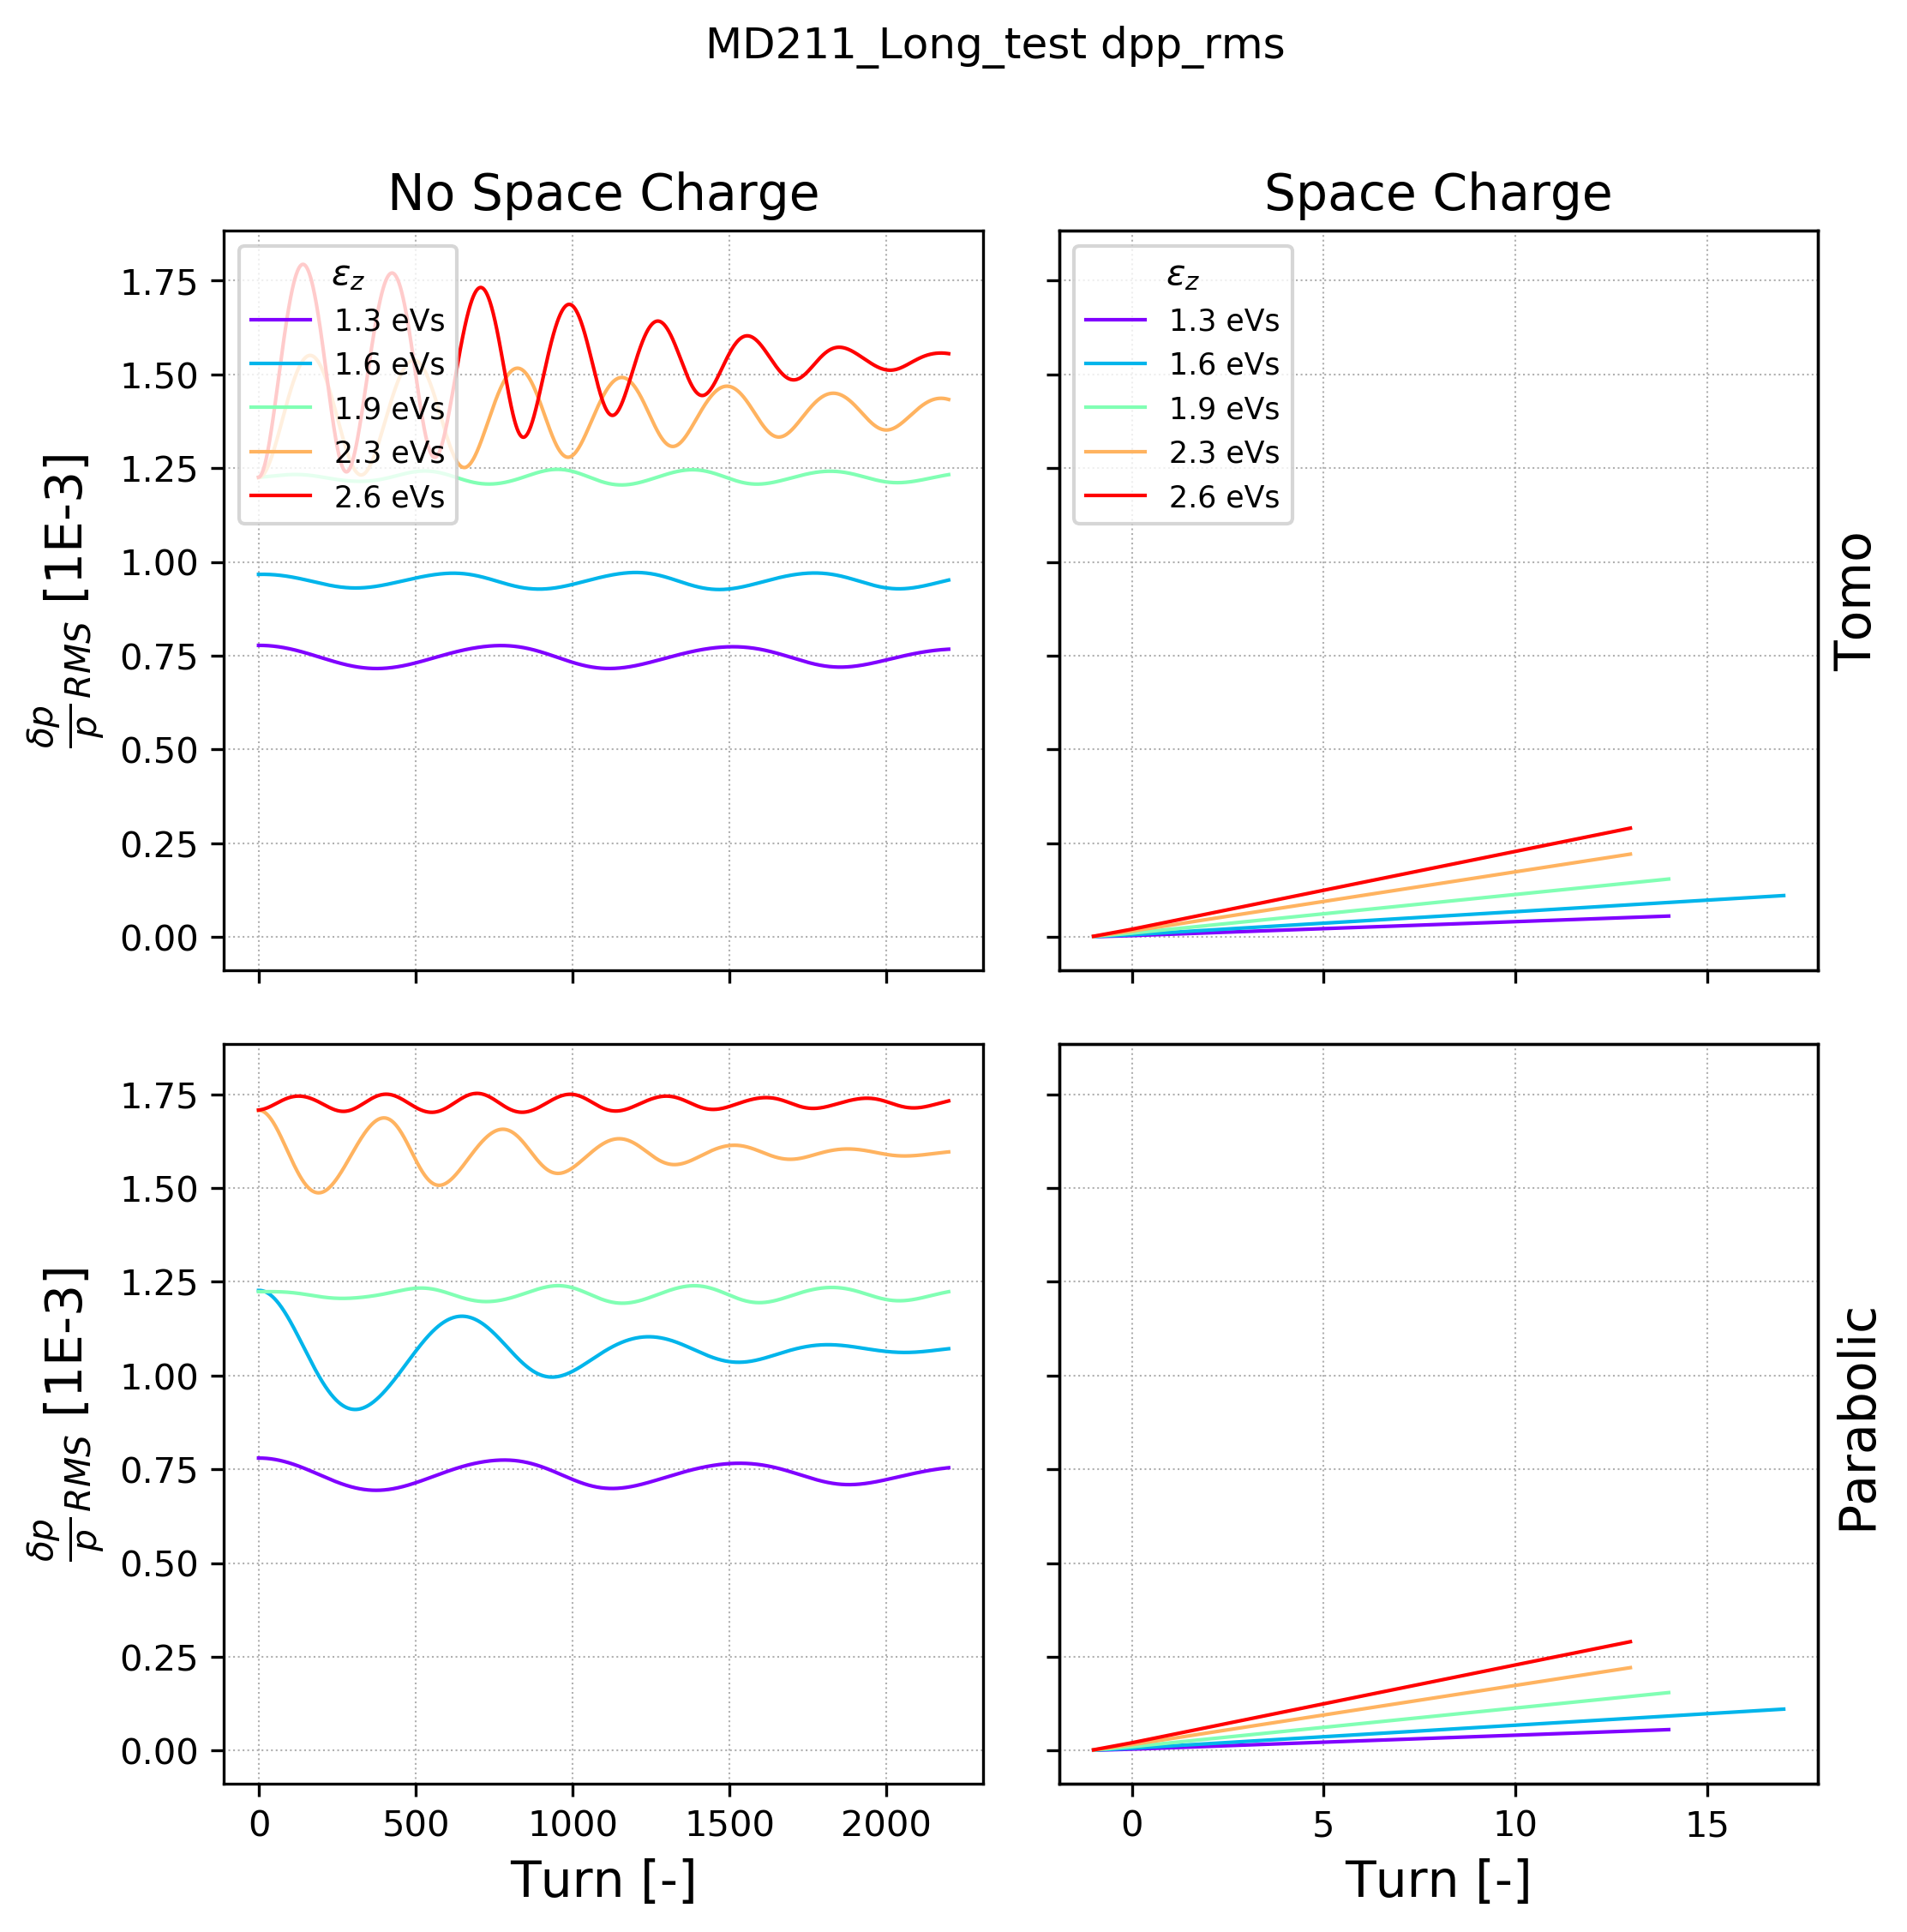

In [18]:
parameter = 'dpp_rms'
multi1 = 1E3

fig, axs = plt.subplots(2, 2, sharex='col', sharey='row', gridspec_kw={'hspace': 0.1, 'wspace': 0.1})
(ax1, ax2), (ax3, ax4) = axs

tit = main_label + ' ' + parameter
fig.suptitle(tit)

ax1.set_ylabel(r'$\frac{\delta p}{p}_{RMS}$ [1E-3]');
ax3.set_ylabel(r'$\frac{\delta p}{p}_{RMS}$ [1E-3]');
ax3.set_xlabel('Turn [-]');
ax4.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))

c_it = int(0)
for key, value in sorted(dd1.iteritems()):
        ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;

ax1.legend(loc=2, title=legend_label, fontsize='small');
ax1.grid(lw=0.5, ls=':');

c_it = int(0)
for key, value in sorted(dd2.iteritems()):
        ax2.plot(dd2[key]['turn'][0], dd2[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;        
ax2.grid(lw=0.5, ls=':');
ax2.legend(loc=2, title=legend_label, fontsize='small');
ax2.set_title(title_1)

c_it = int(0)
for key, value in sorted(dd3.iteritems()):
        ax3.plot(dd3[key]['turn'][0], dd3[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;
ax3.grid(lw=0.5, ls=':');
ax1.set_title(title_2)

c_it = int(0)
for key, value in sorted(dd4.iteritems()):
        ax4.plot(dd4[key]['turn'][0], dd4[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;
ax4.grid(lw=0.5, ls=':');

ax3.set_ylim(ax1.get_ylim())
ax5 = ax2.twinx()
ax5.set_ylabel(case_label_1);
ax6 = ax4.twinx()
ax6.set_ylabel(case_label_2);
ax5.set_yticklabels([]);
ax6.set_yticklabels([]);
ax5.set_yticks([]);
ax6.set_yticks([]);

for ax in axs.flat:
    ax.label_outer()   
    
savename = save_folder +'/' + main_label + '_' + parameter + '.png'
plt.savefig(savename, dpi = 800);

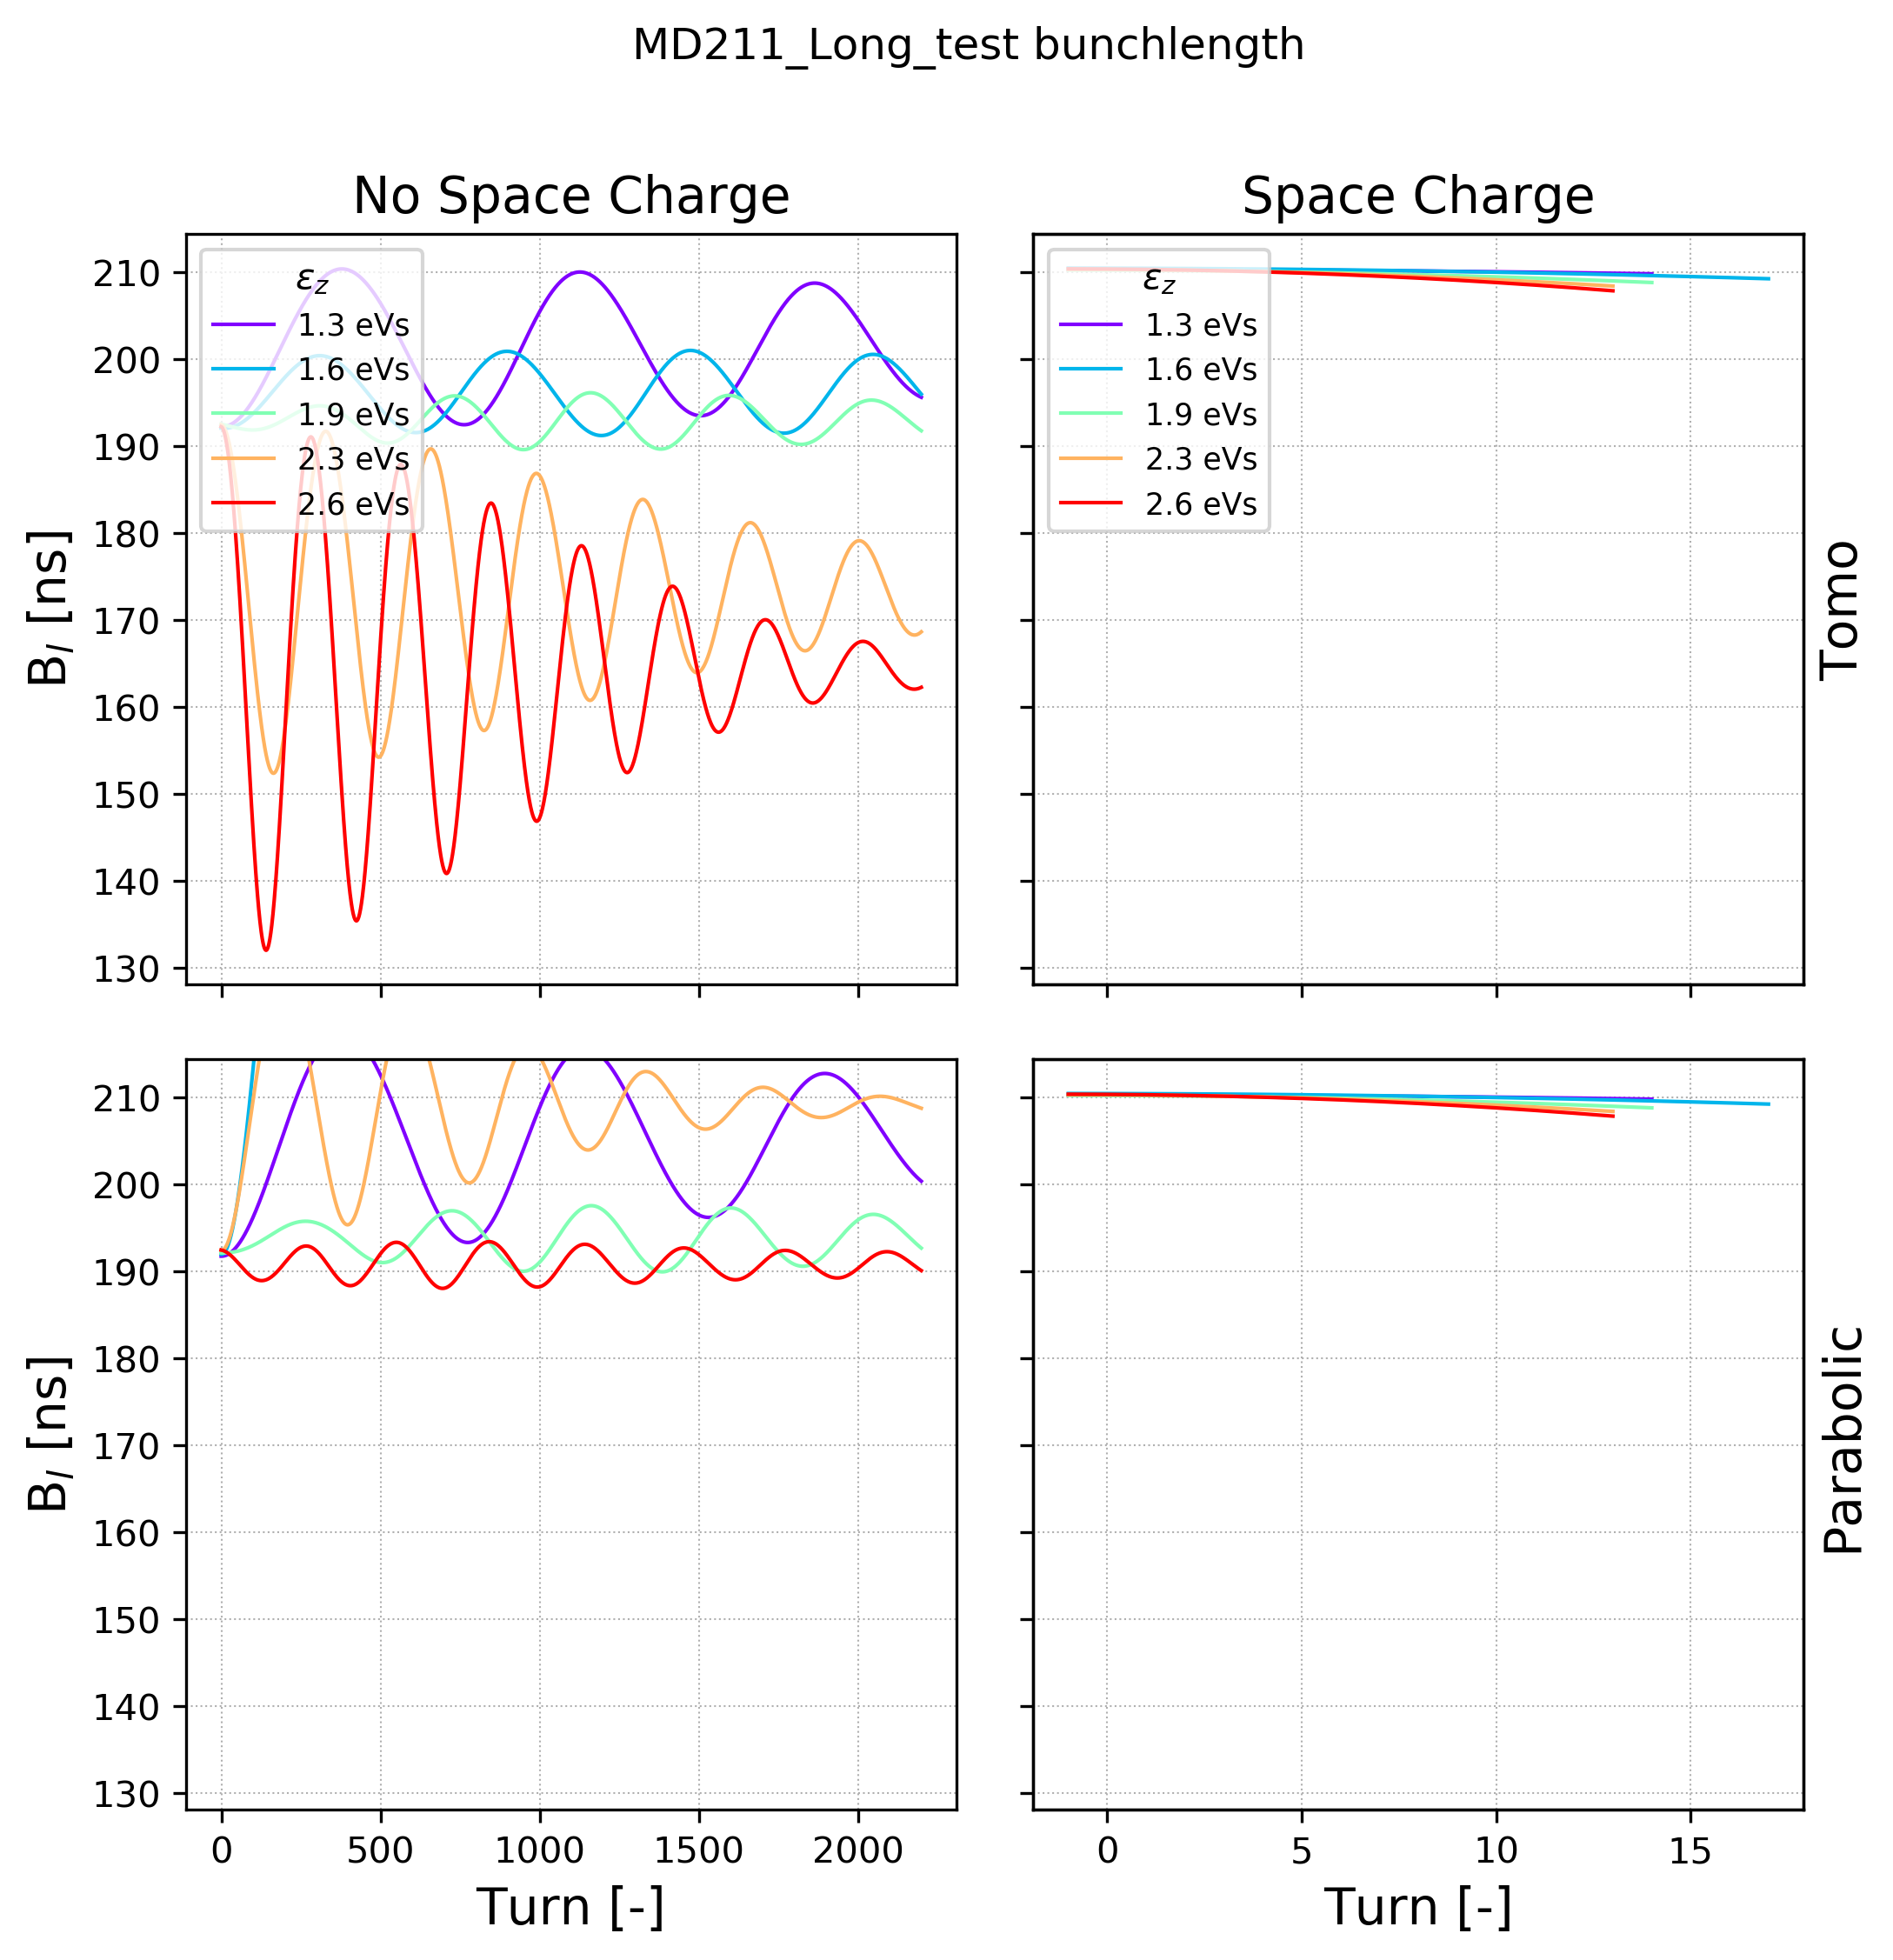

In [19]:
parameter = 'bunchlength'
multi1 = 1E9

fig, axs = plt.subplots(2, 2, sharex='col', sharey='row', gridspec_kw={'hspace': 0.1, 'wspace': 0.1})
(ax1, ax2), (ax3, ax4) = axs

tit = main_label + ' ' + parameter
fig.suptitle(tit)

ax1.set_ylabel(r'B$_l$ [ns]');
ax3.set_ylabel(r'B$_l$ [ns]');
ax3.set_xlabel('Turn [-]');
ax4.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))

c_it = int(0)
for key, value in sorted(dd1.iteritems()):
        ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;

ax1.legend(loc=2, title=legend_label, fontsize='small');
ax1.grid(lw=0.5, ls=':');

c_it = int(0)
for key, value in sorted(dd2.iteritems()):
        ax2.plot(dd2[key]['turn'][0], dd2[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;        
ax2.grid(lw=0.5, ls=':');
ax2.legend(loc=2, title=legend_label, fontsize='small');
ax2.set_title(title_1)

c_it = int(0)
for key, value in sorted(dd3.iteritems()):
        ax3.plot(dd3[key]['turn'][0], dd3[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;
ax3.grid(lw=0.5, ls=':');
ax1.set_title(title_2)

c_it = int(0)
for key, value in sorted(dd4.iteritems()):
        ax4.plot(dd4[key]['turn'][0], dd4[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;
ax4.grid(lw=0.5, ls=':');

ax3.set_ylim(ax1.get_ylim())
ax5 = ax2.twinx()
ax5.set_ylabel(case_label_1);
ax6 = ax4.twinx()
ax6.set_ylabel(case_label_2);
ax5.set_yticklabels([]);
ax6.set_yticklabels([]);
ax5.set_yticks([]);
ax6.set_yticks([]);

for ax in axs.flat:
    ax.label_outer()   
    
savename = save_folder +'/' + main_label + '_' + parameter + '.png'
plt.savefig(savename, dpi = 800);

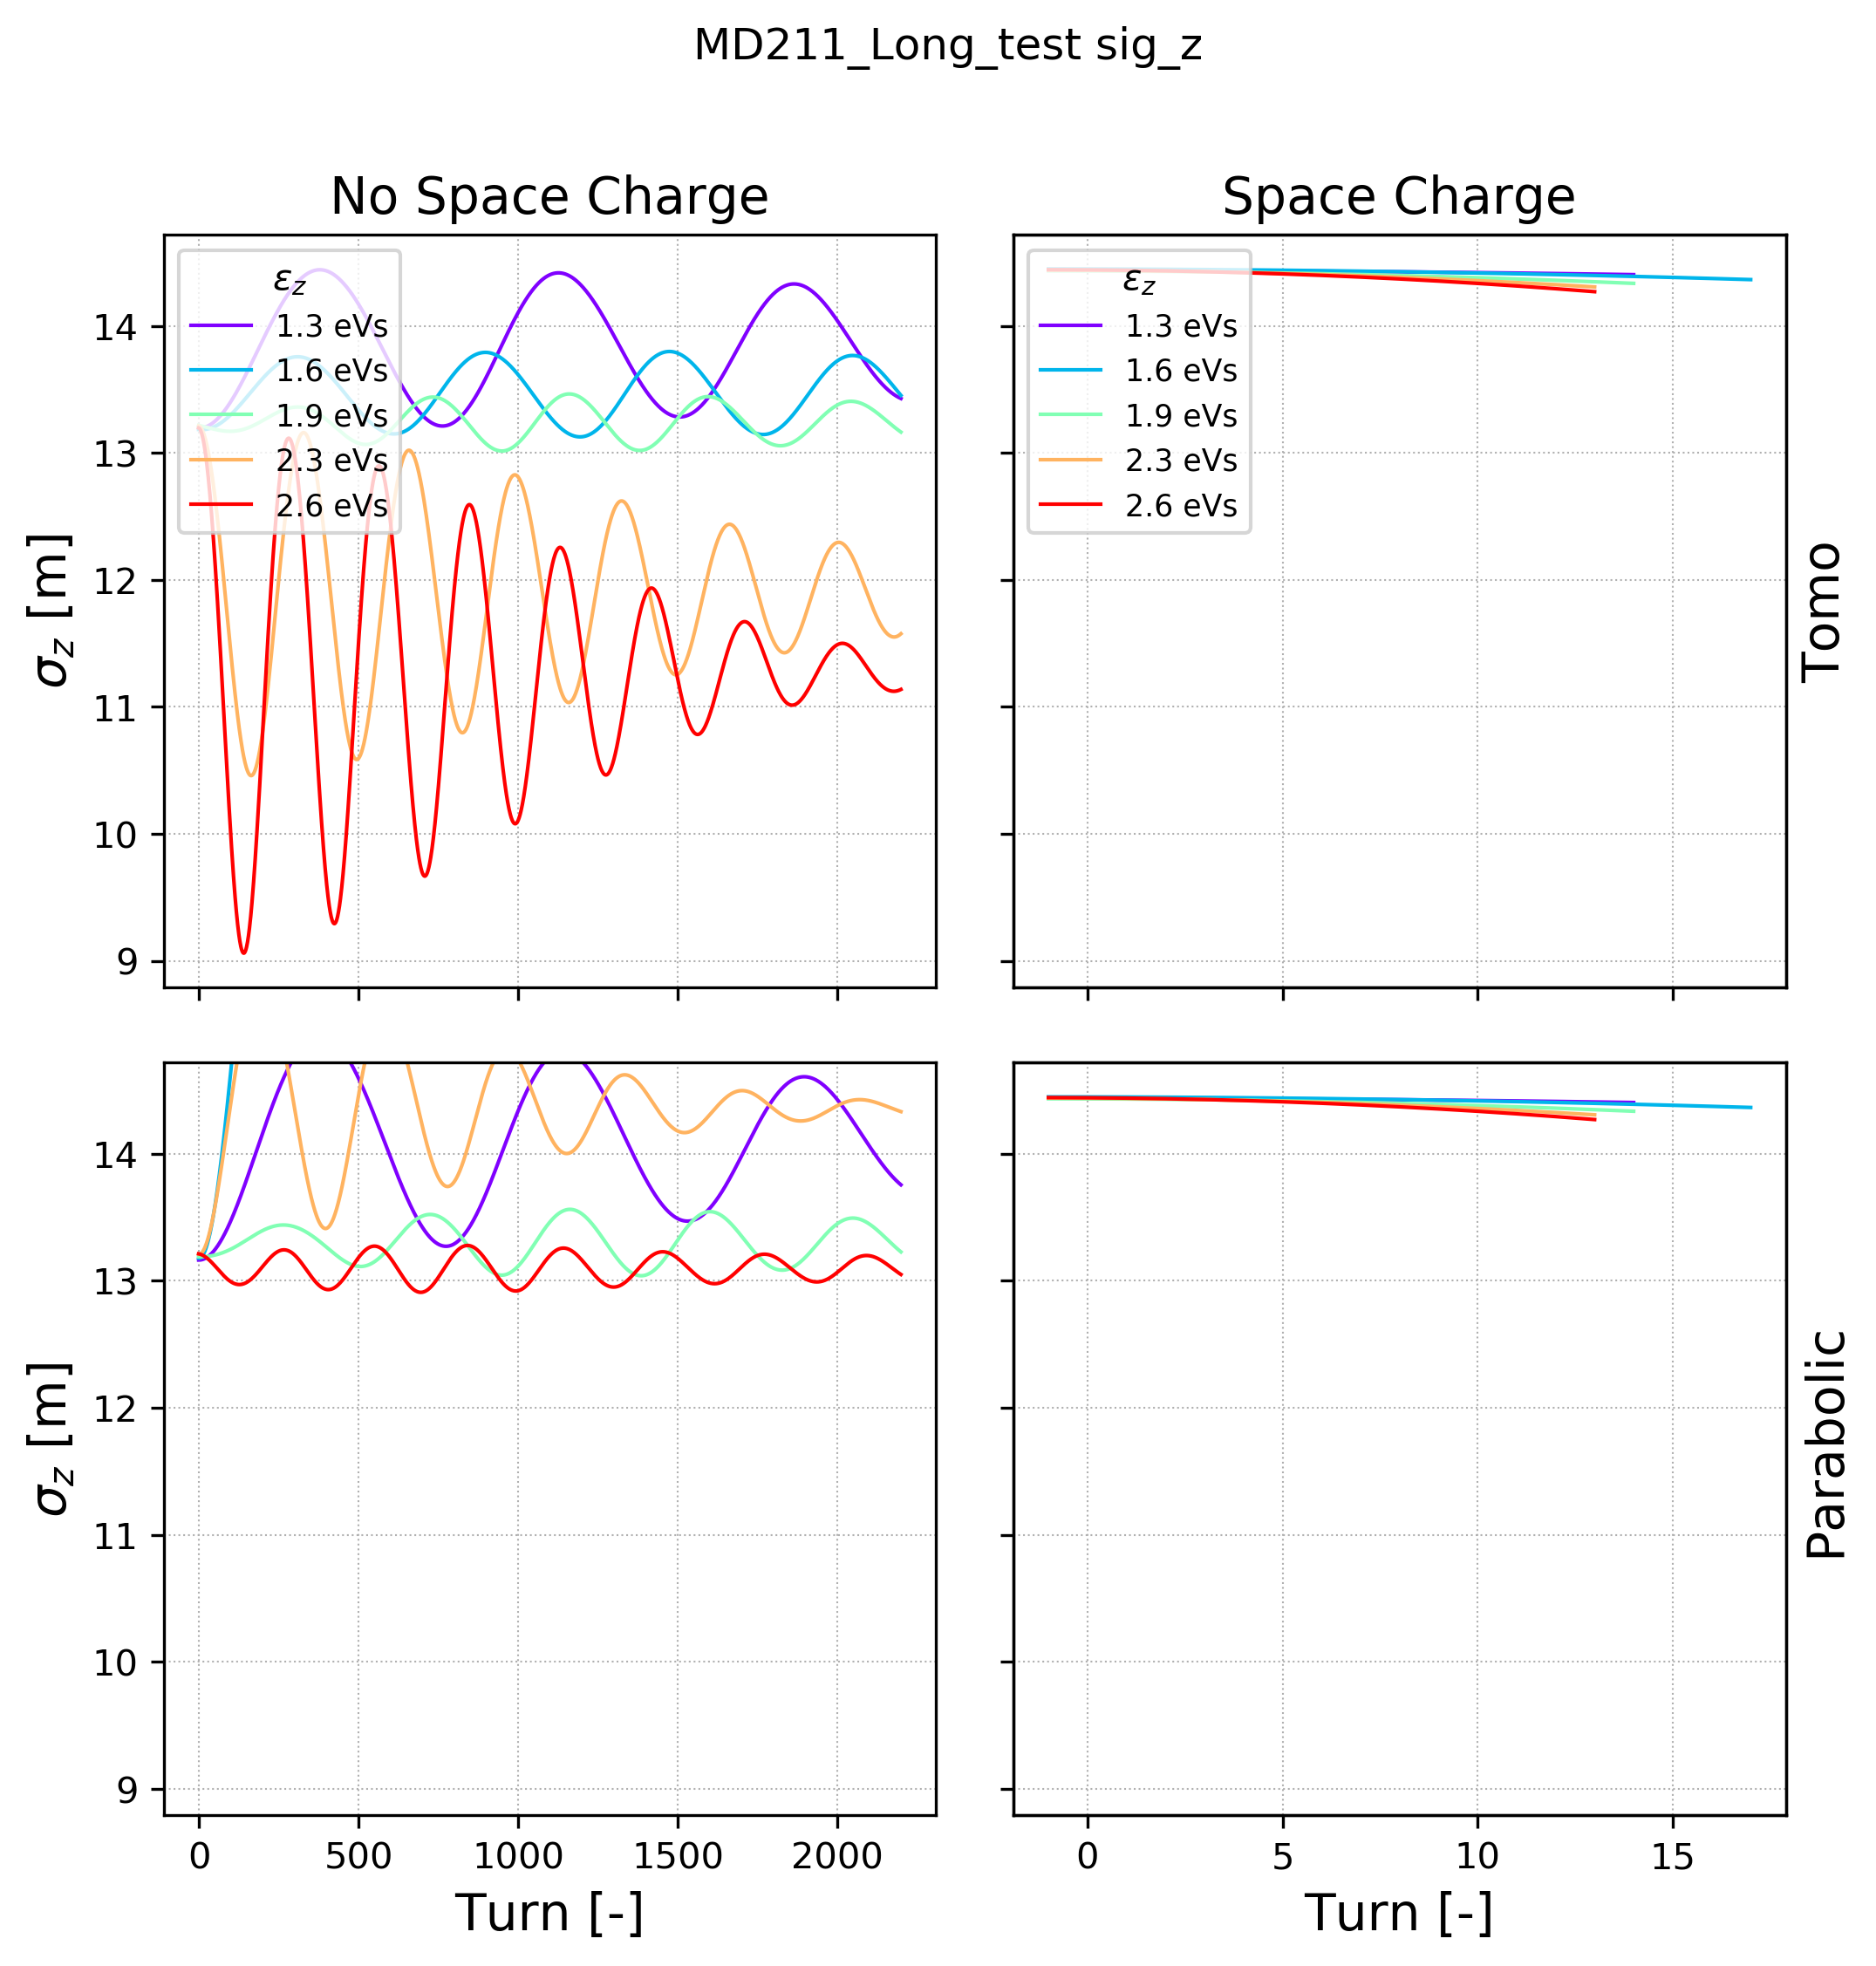

In [20]:
parameter = 'sig_z'
multi1 = 1


fig, axs = plt.subplots(2, 2, sharex='col', sharey='row', gridspec_kw={'hspace': 0.1, 'wspace': 0.1})
(ax1, ax2), (ax3, ax4) = axs

tit = main_label + ' ' + parameter
fig.suptitle(tit)

ax1.set_ylabel(r'$\sigma_z$ [m]');
ax3.set_ylabel(r'$\sigma_z$ [m]');
ax3.set_xlabel('Turn [-]');
ax4.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))

c_it = int(0)
for key, value in sorted(dd1.iteritems()):
        ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;

ax1.legend(loc=2, title=legend_label, fontsize='small');
ax1.grid(lw=0.5, ls=':');

c_it = int(0)
for key, value in sorted(dd2.iteritems()):
        ax2.plot(dd2[key]['turn'][0], dd2[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;        
ax2.grid(lw=0.5, ls=':');
ax2.legend(loc=2, title=legend_label, fontsize='small');
ax2.set_title(title_1)

c_it = int(0)
for key, value in sorted(dd3.iteritems()):
        ax3.plot(dd3[key]['turn'][0], dd3[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;
ax3.grid(lw=0.5, ls=':');
ax1.set_title(title_2)

c_it = int(0)
for key, value in sorted(dd4.iteritems()):
        ax4.plot(dd4[key]['turn'][0], dd4[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;
ax4.grid(lw=0.5, ls=':');

ax3.set_ylim(ax1.get_ylim())
ax5 = ax2.twinx()
ax5.set_ylabel(case_label_1);
ax6 = ax4.twinx()
ax6.set_ylabel(case_label_2);
ax5.set_yticklabels([]);
ax6.set_yticklabels([]);
ax5.set_yticks([]);
ax6.set_yticks([]);

for ax in axs.flat:
    ax.label_outer()   
    
savename = save_folder +'/' + main_label + '_' + parameter + '.png'
plt.savefig(savename, dpi = 800);

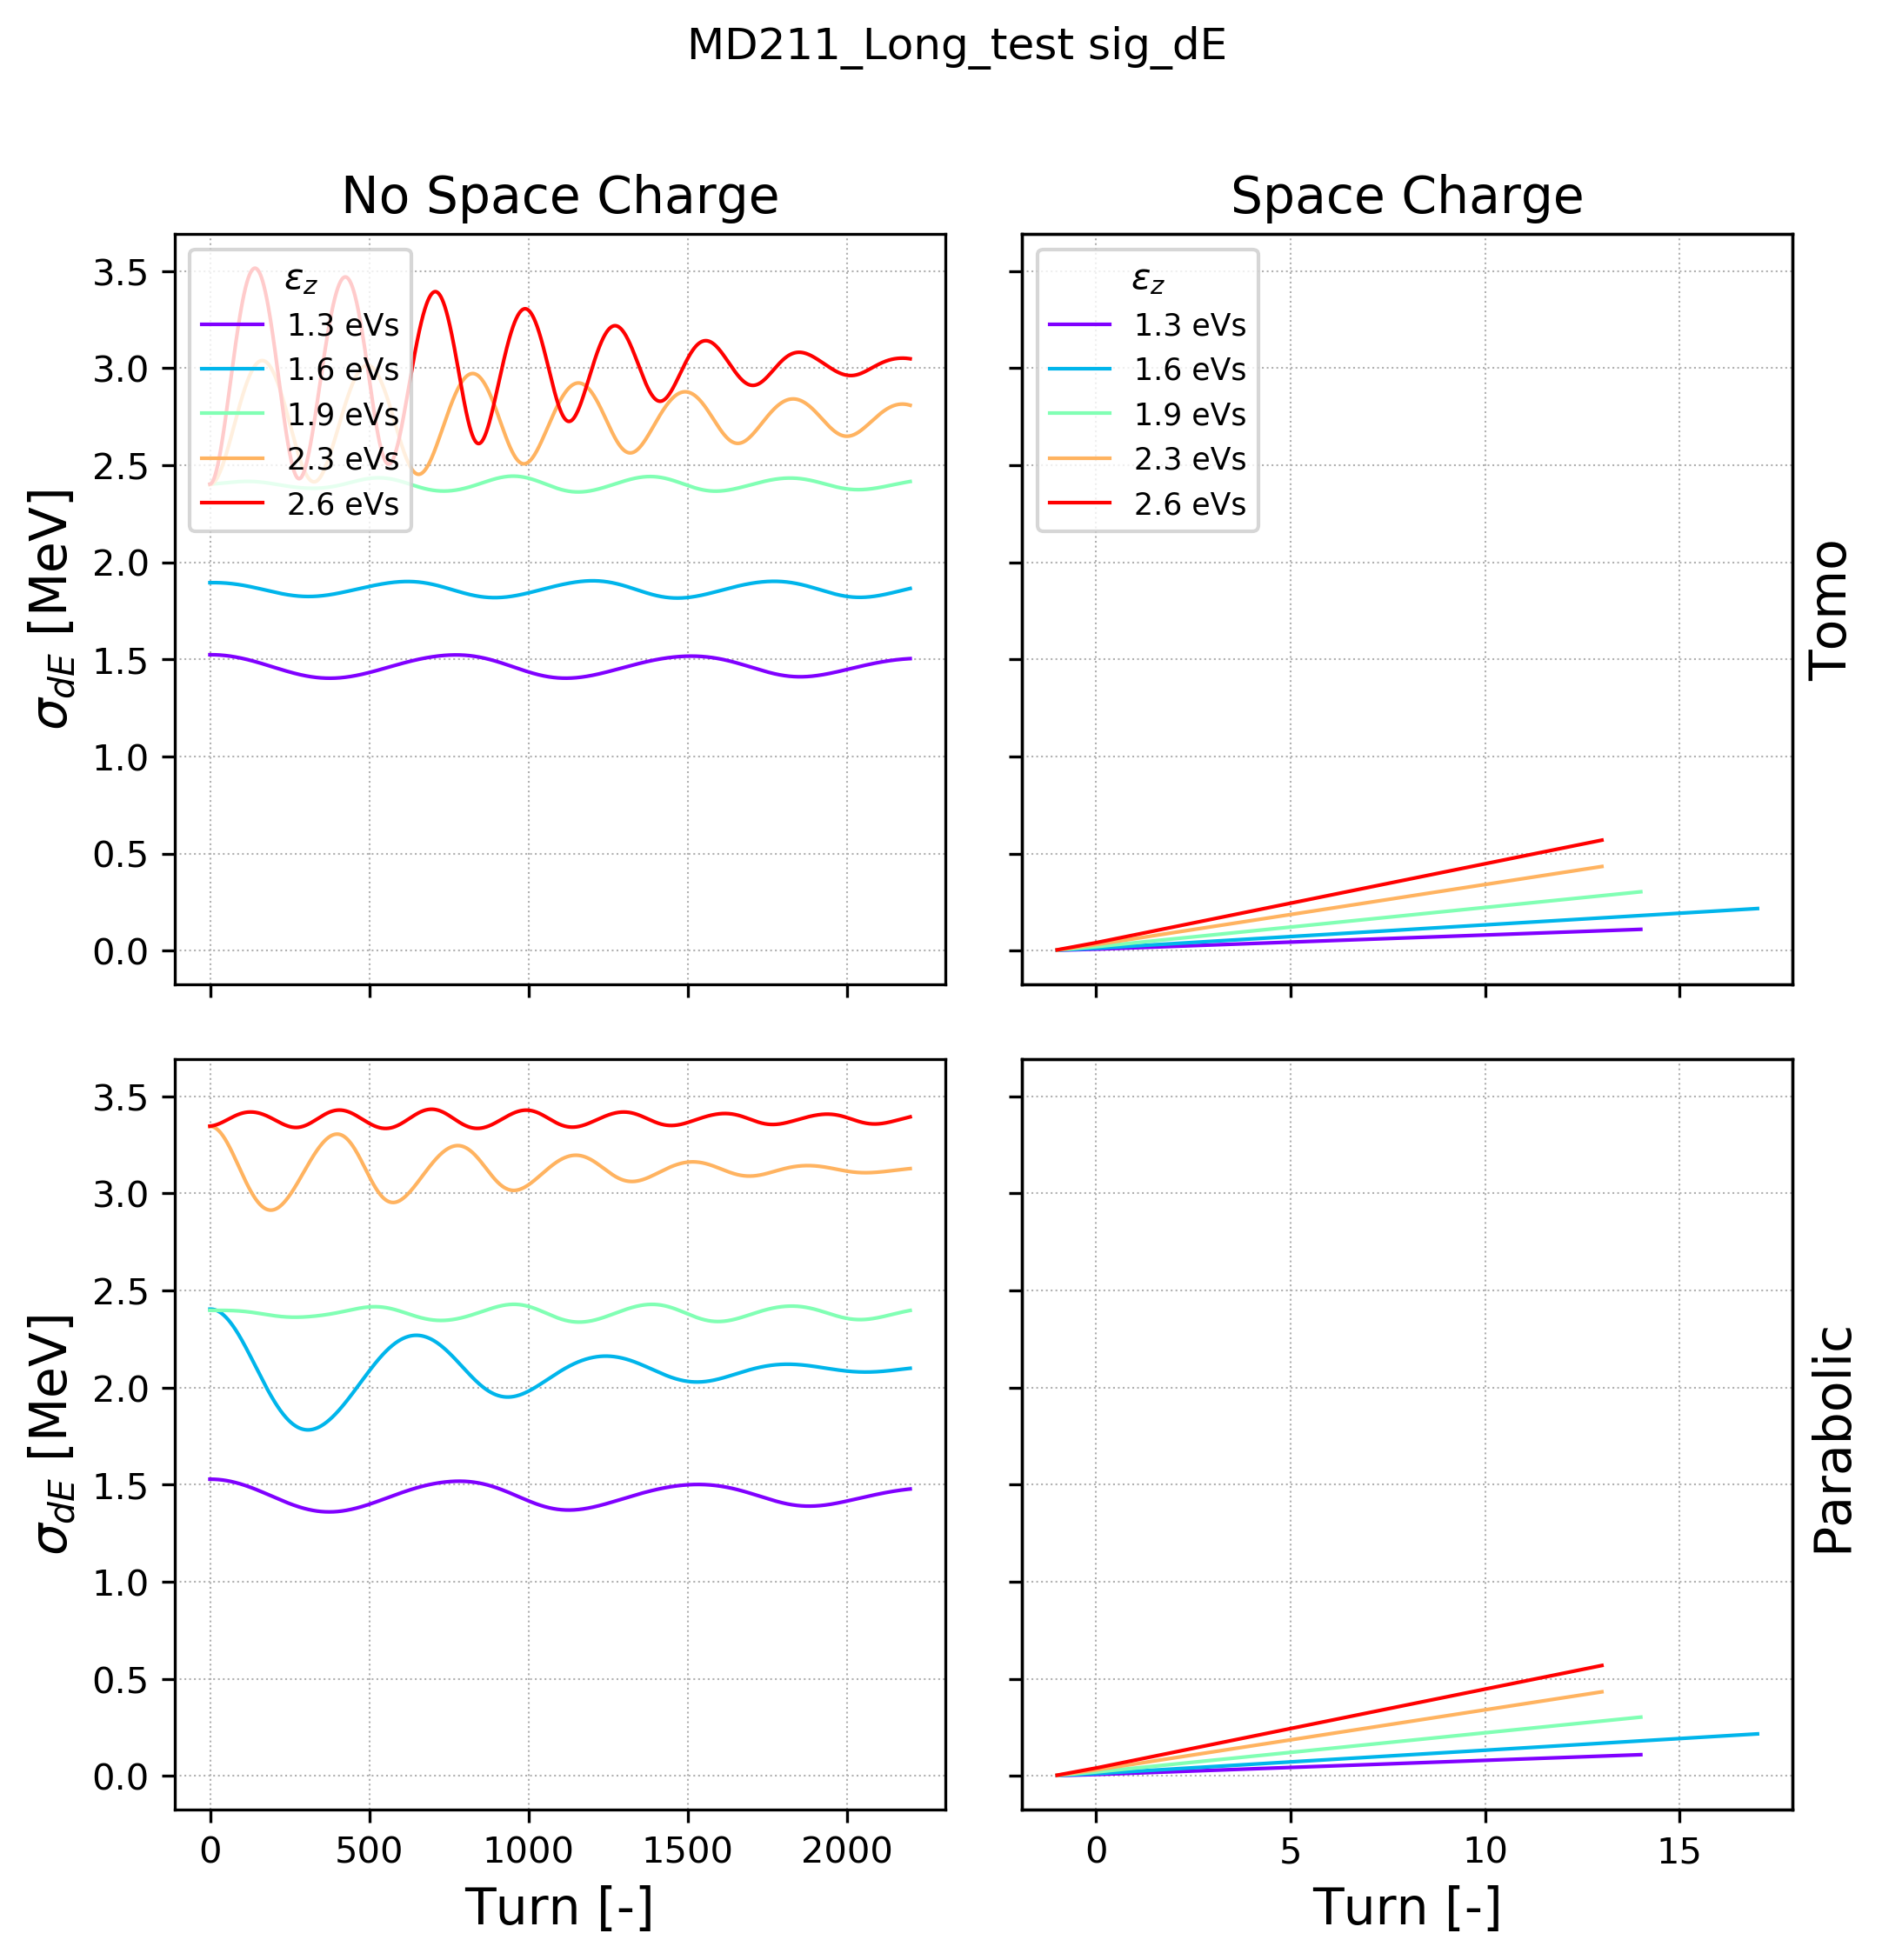

In [21]:
parameter = 'sig_dE'
multi1 = 1E3


fig, axs = plt.subplots(2, 2, sharex='col', sharey='row', gridspec_kw={'hspace': 0.1, 'wspace': 0.1})
(ax1, ax2), (ax3, ax4) = axs

tit = main_label + ' ' + parameter
fig.suptitle(tit)

ax1.set_ylabel(r'$\sigma_{dE}$ [MeV]');
ax3.set_ylabel(r'$\sigma_{dE}$ [MeV]');
ax3.set_xlabel('Turn [-]');
ax4.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))

c_it = int(0)
for key, value in sorted(dd1.iteritems()):
        ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;

ax1.legend(loc=2, title=legend_label, fontsize='small');
ax1.grid(lw=0.5, ls=':');

c_it = int(0)
for key, value in sorted(dd2.iteritems()):
        ax2.plot(dd2[key]['turn'][0], dd2[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;        
ax2.grid(lw=0.5, ls=':');
ax2.legend(loc=2, title=legend_label, fontsize='small');
ax2.set_title(title_1)

c_it = int(0)
for key, value in sorted(dd3.iteritems()):
        ax3.plot(dd3[key]['turn'][0], dd3[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;
ax3.grid(lw=0.5, ls=':');
ax1.set_title(title_2)

c_it = int(0)
for key, value in sorted(dd4.iteritems()):
        ax4.plot(dd4[key]['turn'][0], dd4[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;
ax4.grid(lw=0.5, ls=':');

ax3.set_ylim(ax1.get_ylim())
ax5 = ax2.twinx()
ax5.set_ylabel(case_label_1);
ax6 = ax4.twinx()
ax6.set_ylabel(case_label_2);
ax5.set_yticklabels([]);
ax6.set_yticklabels([]);
ax5.set_yticks([]);
ax6.set_yticks([]);

for ax in axs.flat:
    ax.label_outer()   
    
savename = save_folder +'/' + main_label + '_' + parameter + '.png'
plt.savefig(savename, dpi = 800);

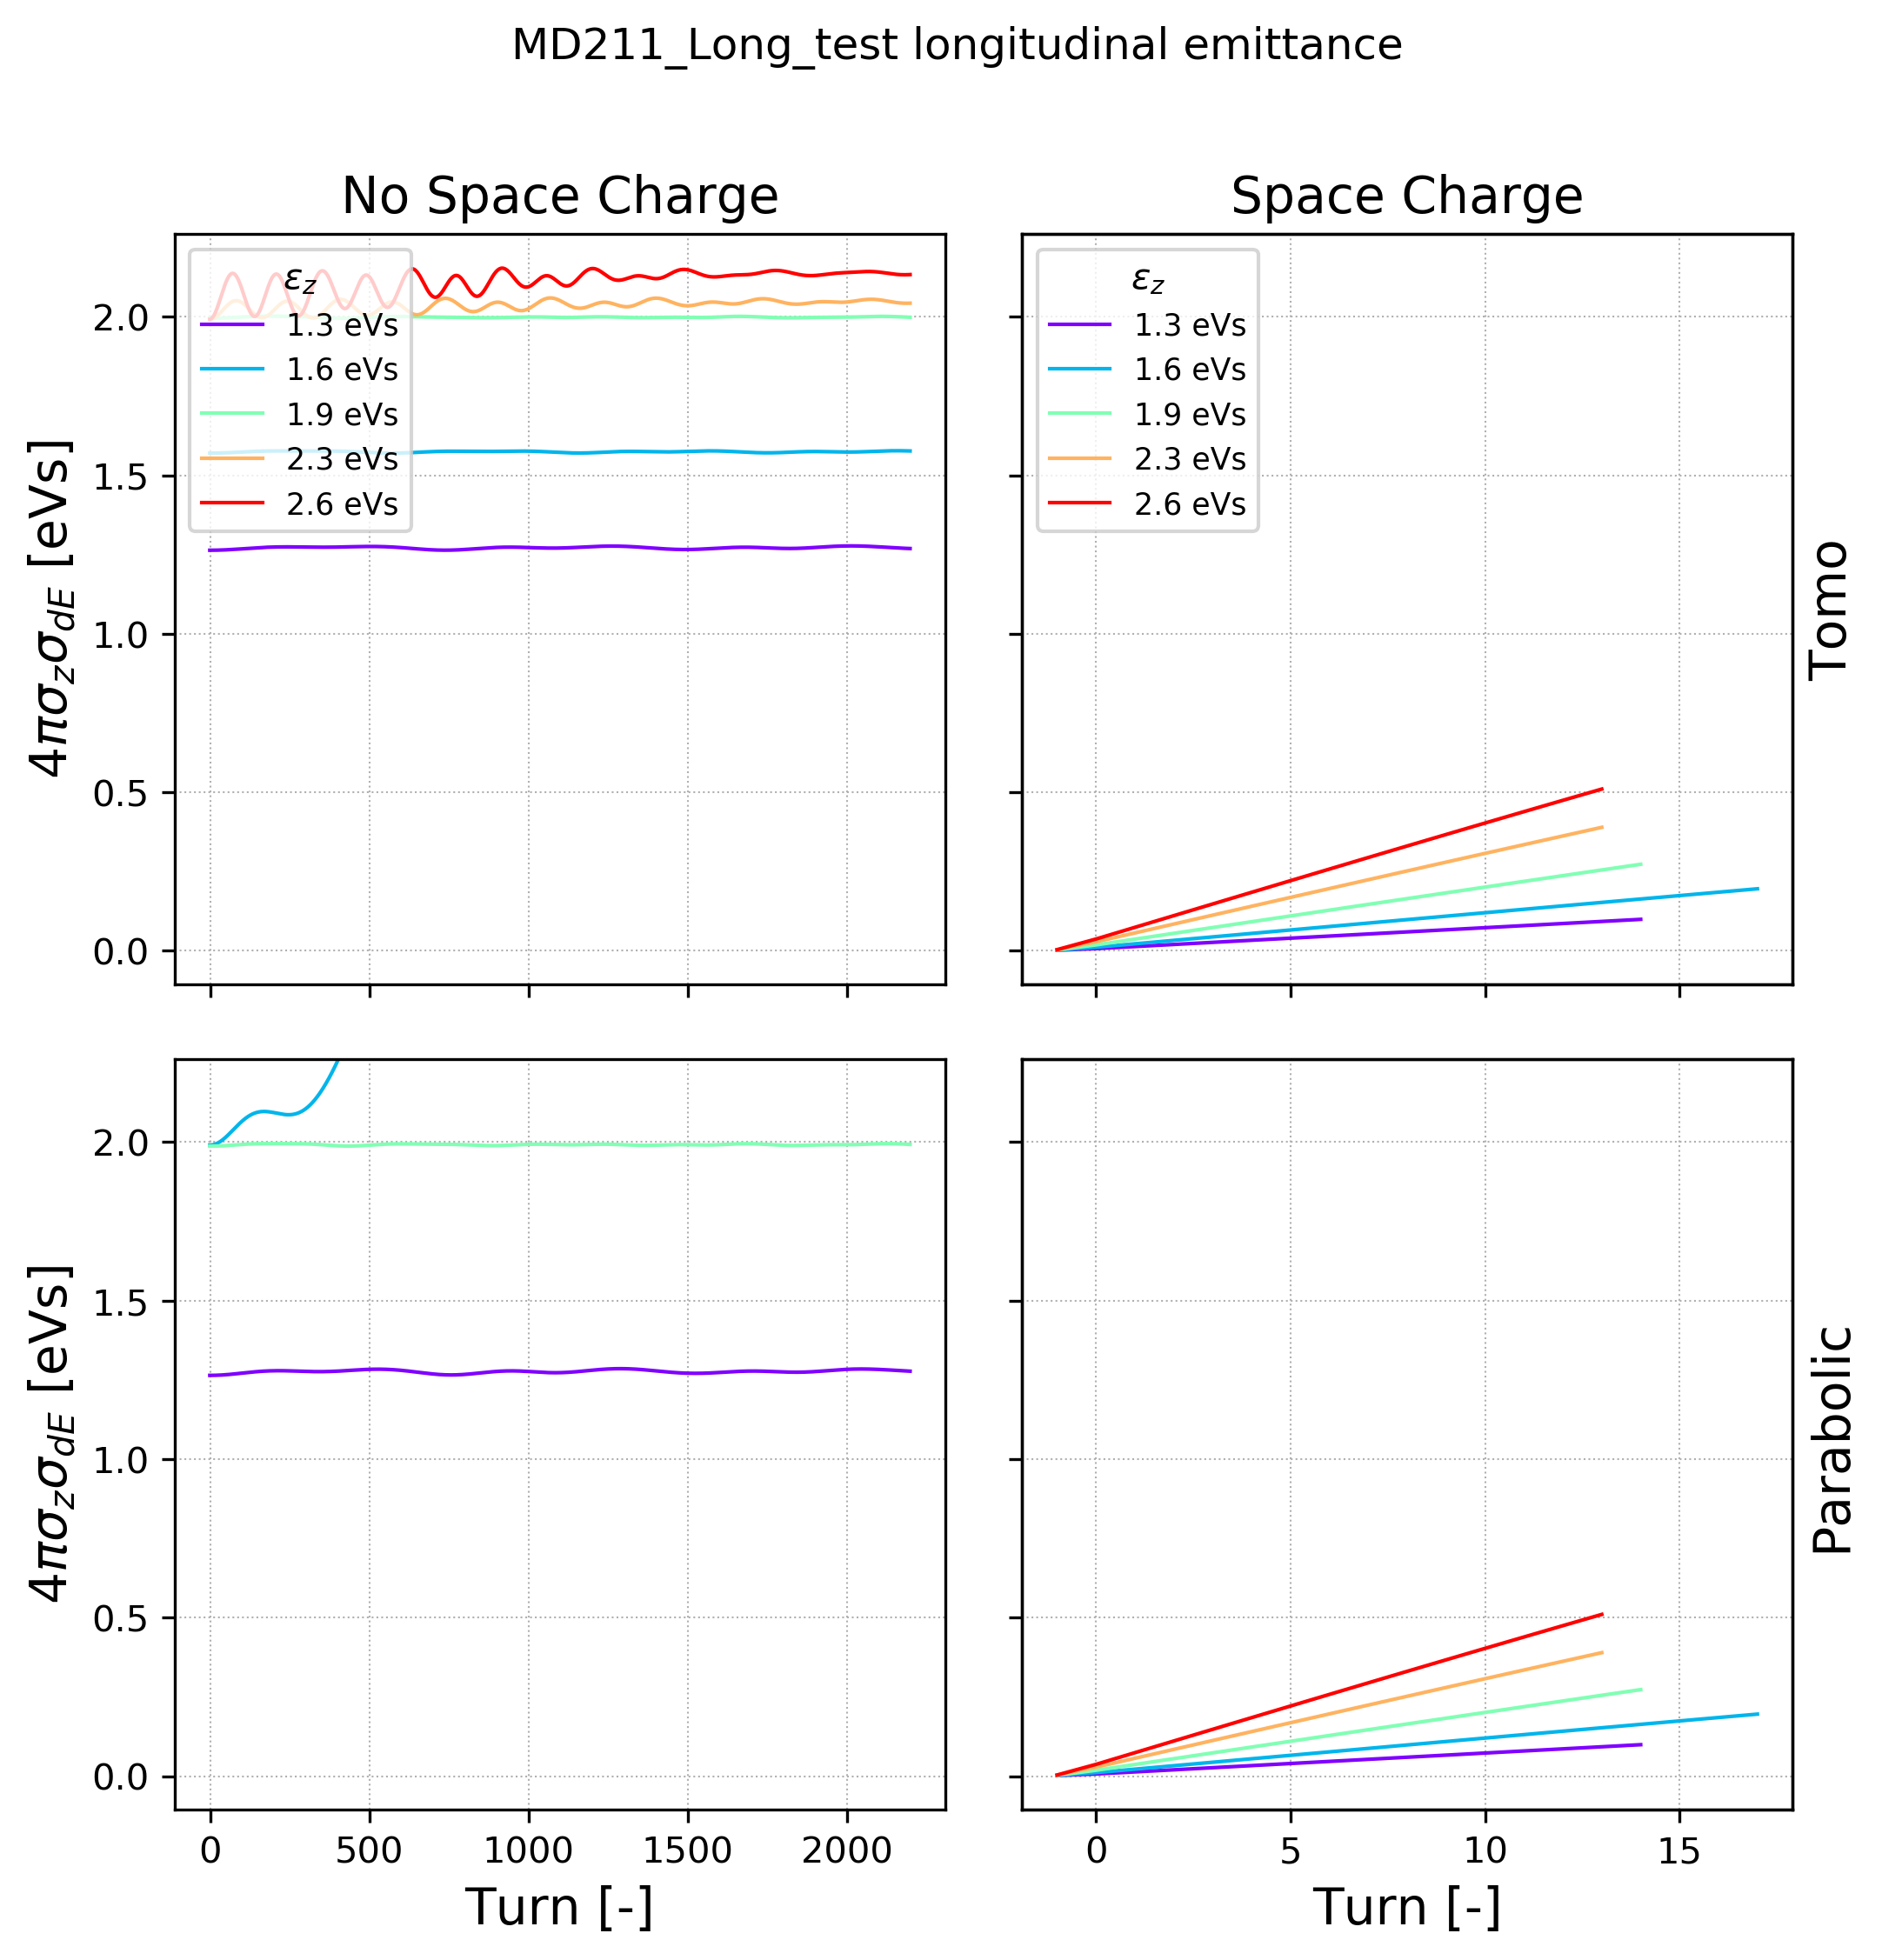

In [22]:
parameter1 = 'sig_z'
multi1 = 1
parameter2 = 'sig_dE'
multi2 = 10

fig, axs = plt.subplots(2, 2, sharex='col', sharey='row', gridspec_kw={'hspace': 0.1, 'wspace': 0.1})
(ax1, ax2), (ax3, ax4) = axs

tit = main_label + ' longitudinal emittance'
fig.suptitle(tit)

ax1.set_ylabel(r'$4 \pi \sigma_{z} \sigma_{dE}$ [eVs]');
ax3.set_ylabel(r'$4 \pi \sigma_{z} \sigma_{dE}$ [eVs]');
ax3.set_xlabel('Turn [-]');
ax4.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))

c_it = int(0)
for key, value in sorted(dd1.iteritems()):
        ax1.plot(dd1[key]['turn'][0], (4* np.pi * dd1[key][parameter1][0]*multi1 * dd1[key][parameter2][0]*multi2)/2, label=key, color=colors[c_it]);
        c_it = c_it + 1;

ax1.legend(loc=2, title=legend_label, fontsize='small');
ax1.grid(lw=0.5, ls=':');

c_it = int(0)
for key, value in sorted(dd2.iteritems()):
        ax2.plot(dd2[key]['turn'][0], (4* np.pi * dd2[key][parameter1][0]*multi1 * dd2[key][parameter2][0]*multi2)/2, label=key, color=colors[c_it]);
        c_it = c_it + 1;        
ax2.grid(lw=0.5, ls=':');
ax2.legend(loc=2, title=legend_label, fontsize='small');
ax2.set_title(title_1)

c_it = int(0)
for key, value in sorted(dd3.iteritems()):
        ax3.plot(dd3[key]['turn'][0], (4* np.pi * dd3[key][parameter1][0]*multi1 * dd3[key][parameter2][0]*multi2)/2, label=key, color=colors[c_it]);
        c_it = c_it + 1;
ax3.grid(lw=0.5, ls=':');
ax1.set_title(title_2)

c_it = int(0)
for key, value in sorted(dd4.iteritems()):
        ax4.plot(dd4[key]['turn'][0], (4* np.pi * dd4[key][parameter1][0]*multi1 * dd4[key][parameter2][0]*multi2)/2, label=key, color=colors[c_it]);
        c_it = c_it + 1;
ax4.grid(lw=0.5, ls=':');

ax3.set_ylim(ax1.get_ylim())
ax5 = ax2.twinx()
ax5.set_ylabel(case_label_1);
ax6 = ax4.twinx()
ax6.set_ylabel(case_label_2);
ax5.set_yticklabels([]);
ax6.set_yticklabels([]);
ax5.set_yticks([]);
ax6.set_yticks([]);

for ax in axs.flat:
    ax.label_outer()   
    
savename = save_folder +'/' + main_label + '_manual_eps_z.png'
plt.savefig(savename, dpi = 800);

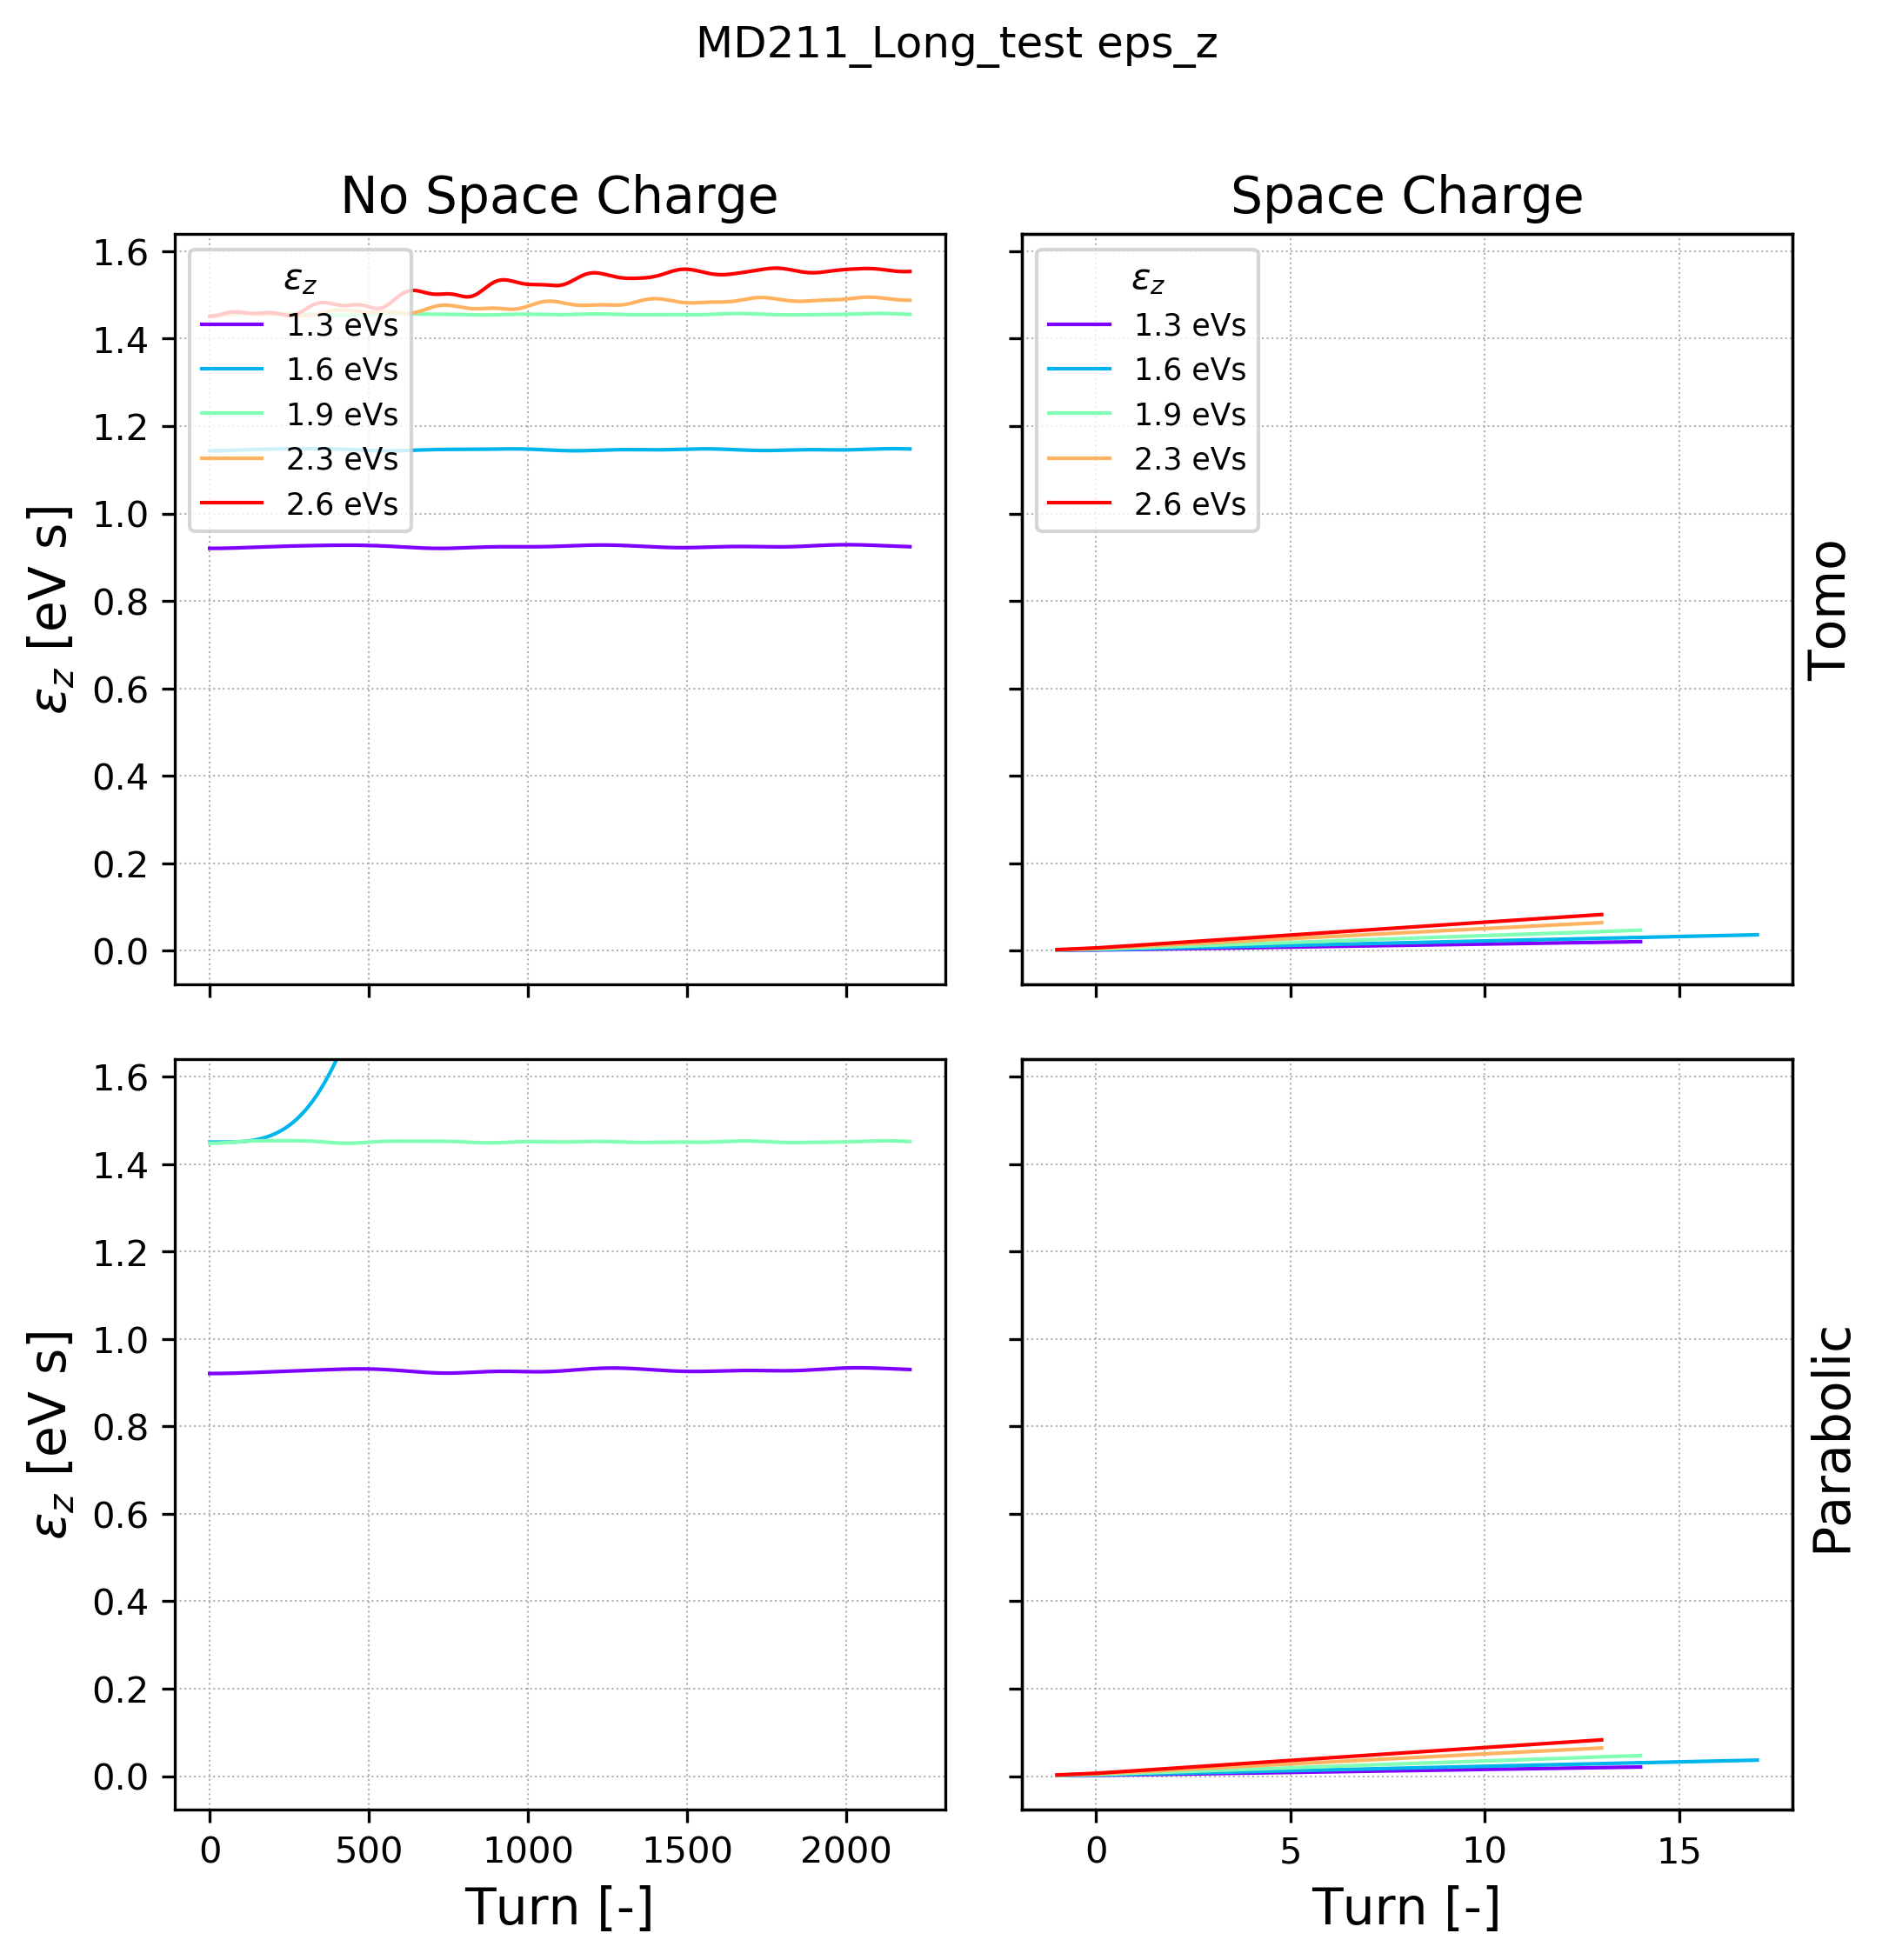

In [23]:
parameter = 'eps_z'
multi1 = 1


fig, axs = plt.subplots(2, 2, sharex='col', sharey='row', gridspec_kw={'hspace': 0.1, 'wspace': 0.1})
(ax1, ax2), (ax3, ax4) = axs

tit = main_label + ' ' + parameter
fig.suptitle(tit)

ax1.set_ylabel(r'$\epsilon_z$ [eV s]');
ax3.set_ylabel(r'$\epsilon_z$ [eV s]');
ax3.set_xlabel('Turn [-]');
ax4.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))

c_it = int(0)
for key, value in sorted(dd1.iteritems()):
        ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;

ax1.legend(loc=2, title=legend_label, fontsize='small');
ax1.grid(lw=0.5, ls=':');

c_it = int(0)
for key, value in sorted(dd2.iteritems()):
        ax2.plot(dd2[key]['turn'][0], dd2[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;        
ax2.grid(lw=0.5, ls=':');
ax2.legend(loc=2, title=legend_label, fontsize='small');
ax2.set_title(title_1)

c_it = int(0)
for key, value in sorted(dd3.iteritems()):
        ax3.plot(dd3[key]['turn'][0], dd3[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;
ax3.grid(lw=0.5, ls=':');
ax1.set_title(title_2)

c_it = int(0)
for key, value in sorted(dd4.iteritems()):
        ax4.plot(dd4[key]['turn'][0], dd4[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;
ax4.grid(lw=0.5, ls=':');

ax3.set_ylim(ax1.get_ylim())
ax5 = ax2.twinx()
ax5.set_ylabel(case_label_1);
ax6 = ax4.twinx()
ax6.set_ylabel(case_label_2);
ax5.set_yticklabels([]);
ax6.set_yticklabels([]);
ax5.set_yticks([]);
ax6.set_yticks([]);

for ax in axs.flat:
    ax.label_outer()   
    
savename = save_folder +'/' + main_label + '_' + parameter + '.png'
plt.savefig(savename, dpi = 800);

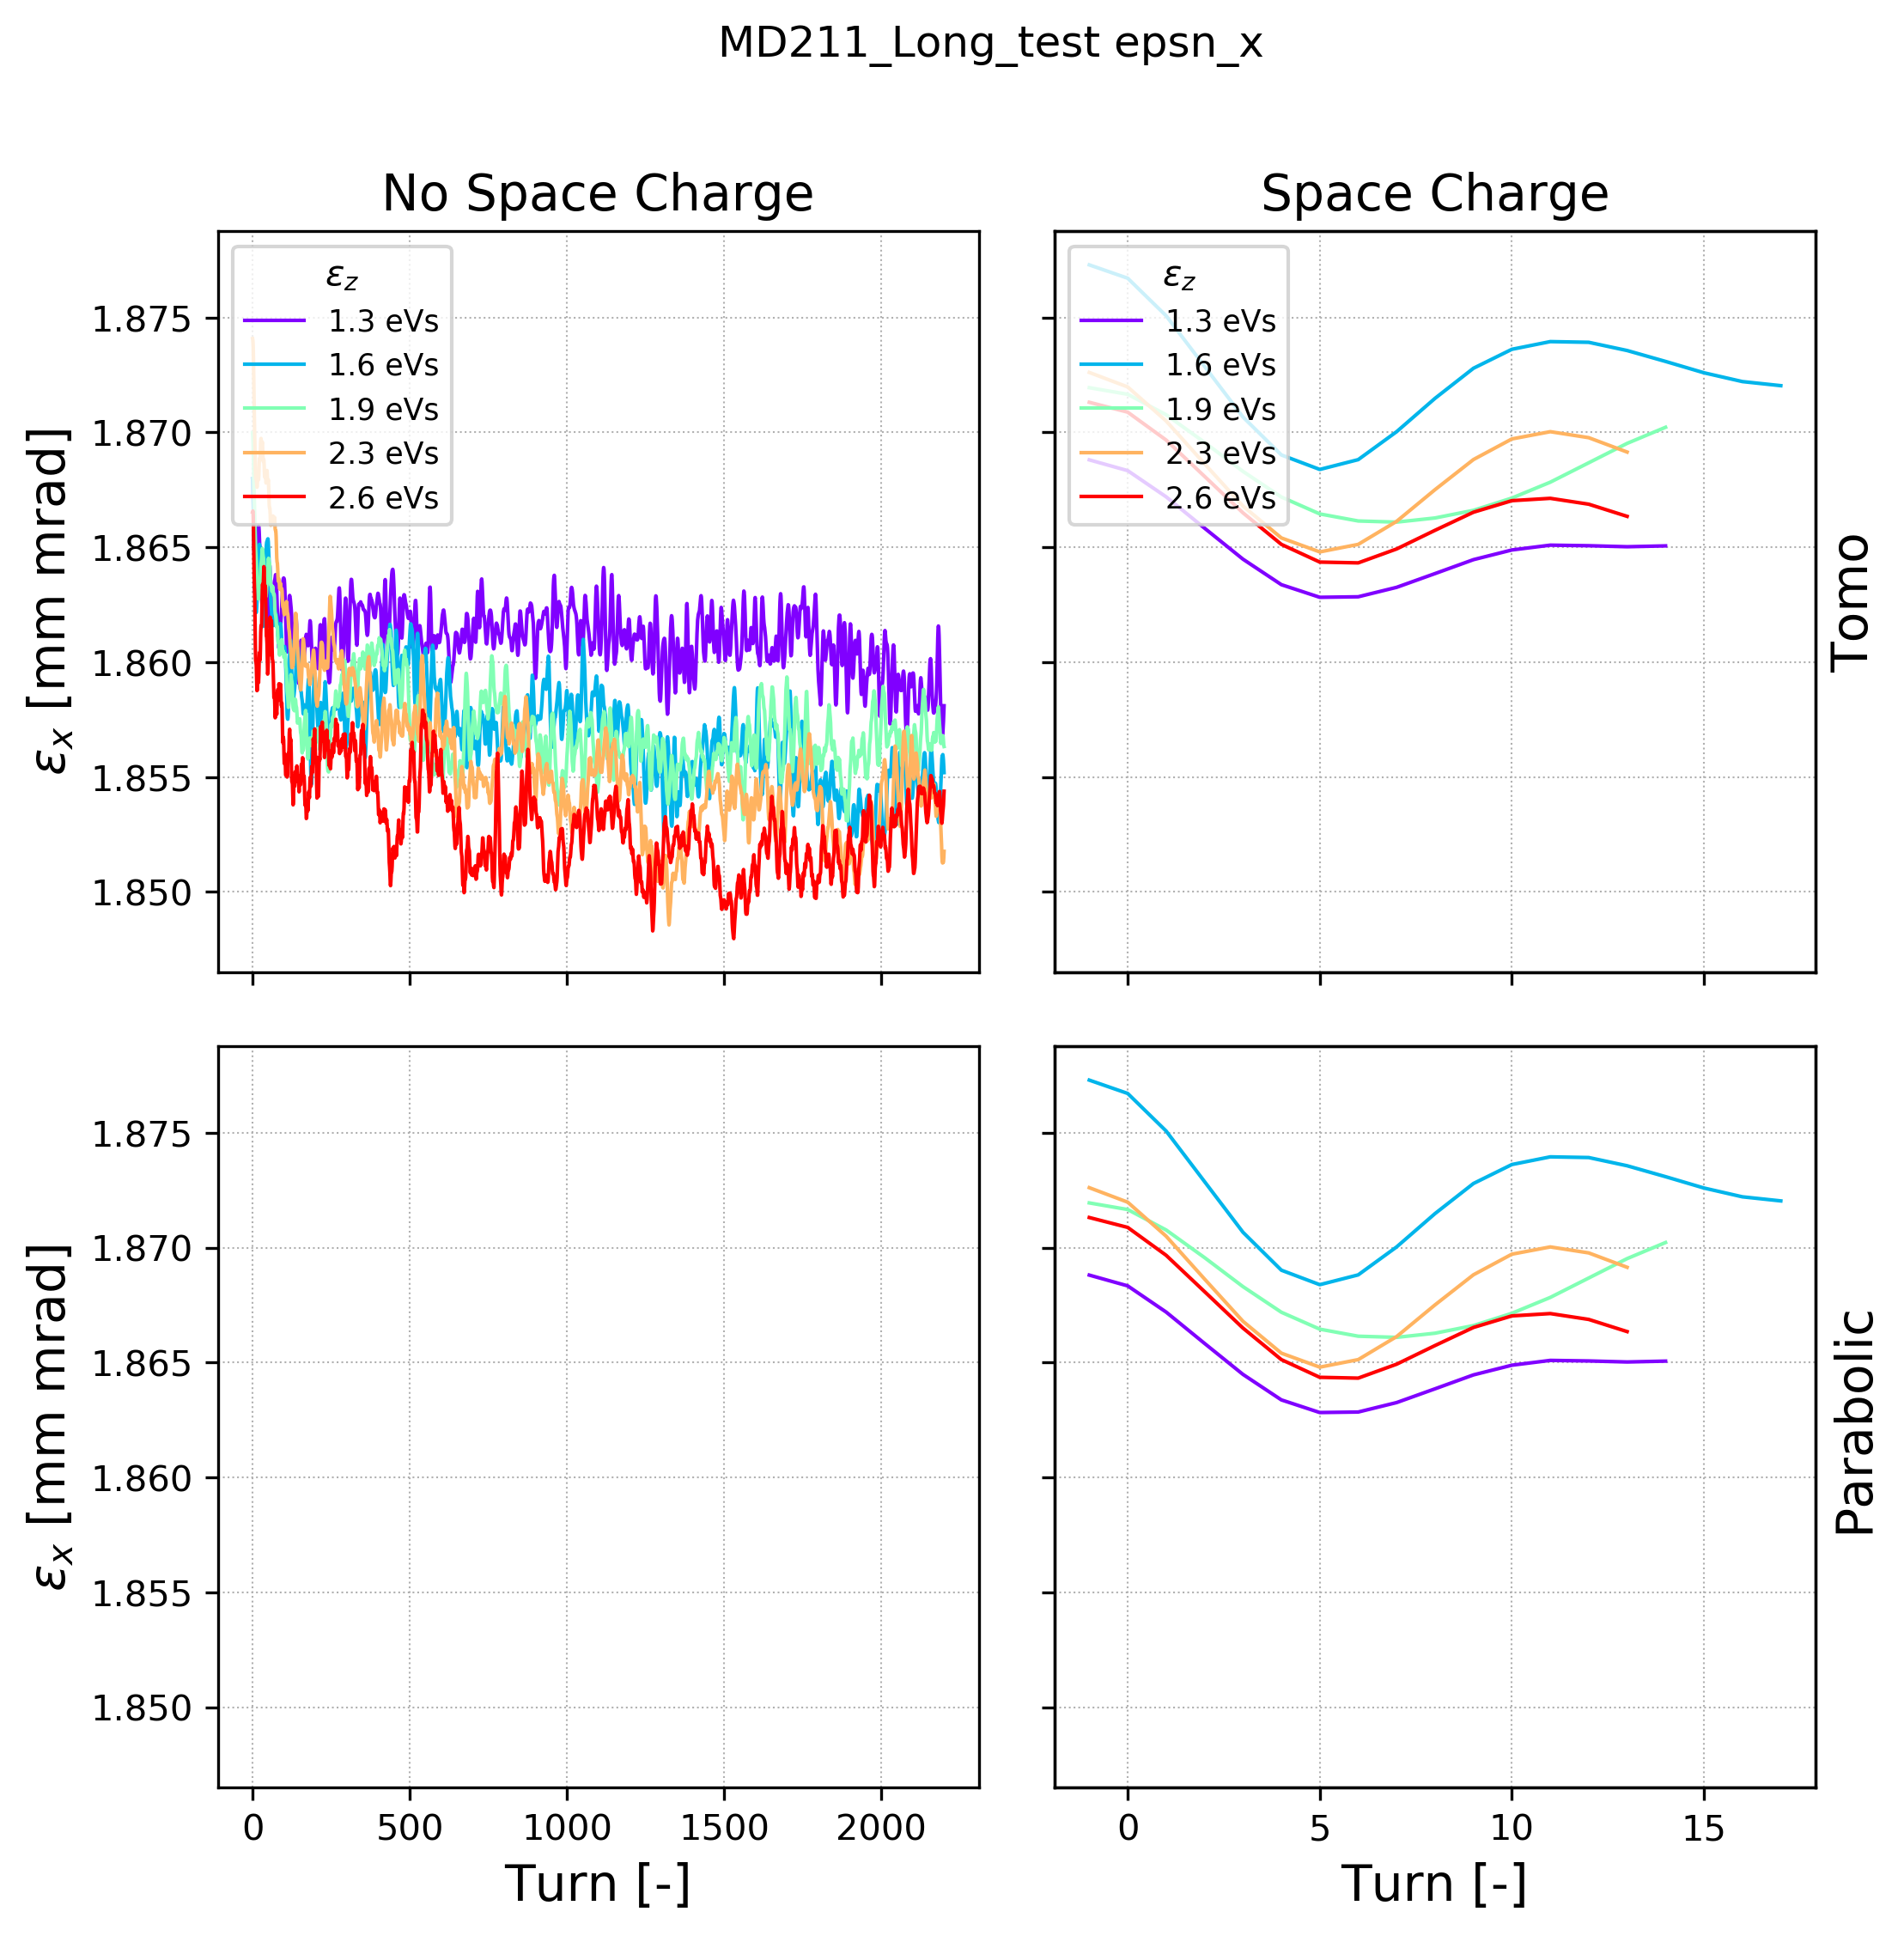

In [24]:
parameter = 'epsn_x'
multi1 = 1E6


fig, axs = plt.subplots(2, 2, sharex='col', sharey='row', gridspec_kw={'hspace': 0.1, 'wspace': 0.1})
(ax1, ax2), (ax3, ax4) = axs

tit = main_label + ' ' + parameter
fig.suptitle(tit)

ax1.set_ylabel(r'$\epsilon_x$ [mm mrad]');
ax3.set_ylabel(r'$\epsilon_x$ [mm mrad]');
ax3.set_xlabel('Turn [-]');
ax4.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))

c_it = int(0)
for key, value in sorted(dd1.iteritems()):
        ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;

ax1.legend(loc=2, title=legend_label, fontsize='small');
ax1.grid(lw=0.5, ls=':');

c_it = int(0)
for key, value in sorted(dd2.iteritems()):
        ax2.plot(dd2[key]['turn'][0], dd2[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;        
ax2.grid(lw=0.5, ls=':');
ax2.legend(loc=2, title=legend_label, fontsize='small');
ax2.set_title(title_1)

c_it = int(0)
for key, value in sorted(dd3.iteritems()):
        ax3.plot(dd3[key]['turn'][0], dd3[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;
ax3.grid(lw=0.5, ls=':');
ax1.set_title(title_2)

c_it = int(0)
for key, value in sorted(dd4.iteritems()):
        ax4.plot(dd4[key]['turn'][0], dd4[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;
ax4.grid(lw=0.5, ls=':');

ax3.set_ylim(ax1.get_ylim())
ax5 = ax2.twinx()
ax5.set_ylabel(case_label_1);
ax6 = ax4.twinx()
ax6.set_ylabel(case_label_2);
ax5.set_yticklabels([]);
ax6.set_yticklabels([]);
ax5.set_yticks([]);
ax6.set_yticks([]);

for ax in axs.flat:
    ax.label_outer()   
    
savename = save_folder +'/' + main_label + '_' + parameter + '.png'
plt.savefig(savename, dpi = 800);

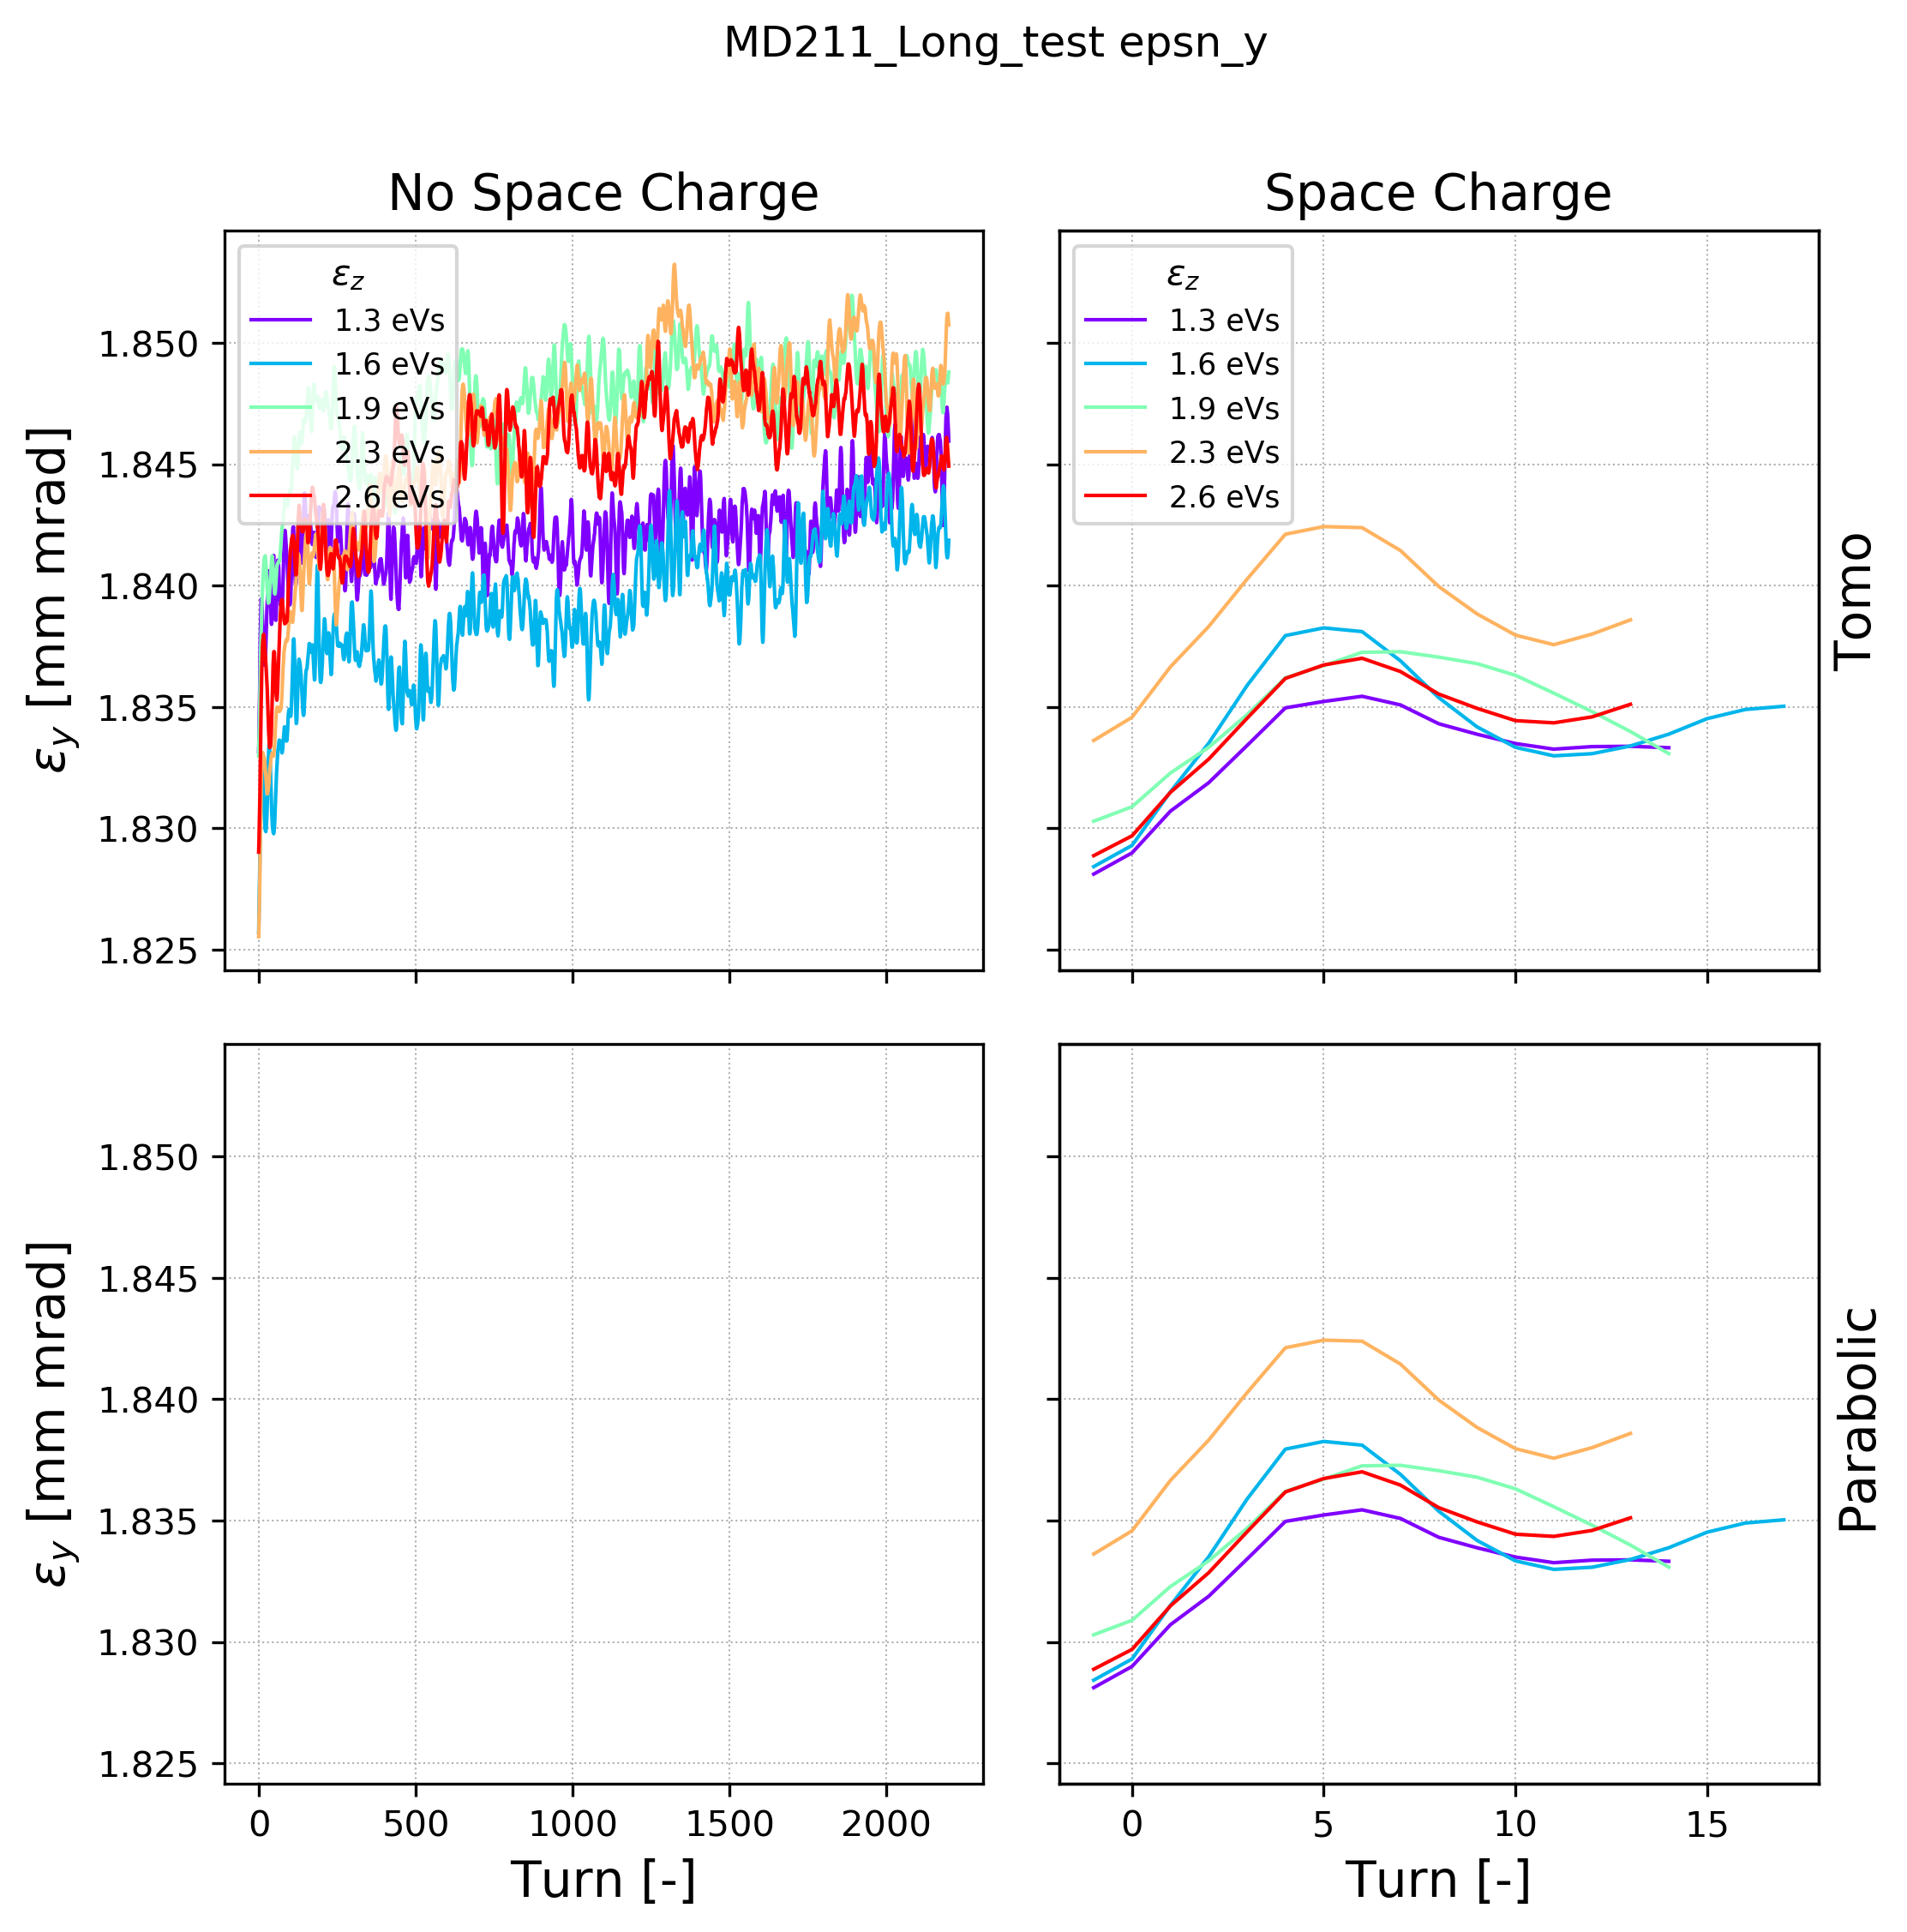

In [25]:
parameter = 'epsn_y'
multi1 = 1E6


fig, axs = plt.subplots(2, 2, sharex='col', sharey='row', gridspec_kw={'hspace': 0.1, 'wspace': 0.1})
(ax1, ax2), (ax3, ax4) = axs

tit = main_label + ' ' + parameter
fig.suptitle(tit)

ax1.set_ylabel(r'$\epsilon_y$ [mm mrad]');
ax3.set_ylabel(r'$\epsilon_y$ [mm mrad]');
ax3.set_xlabel('Turn [-]');
ax4.set_xlabel('Turn [-]');
ax2.set_title('Space Charge')
ax1.set_title('No Space Charge')

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))

c_it = int(0)
for key, value in sorted(dd1.iteritems()):
        ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;

ax1.legend(loc=2, title=legend_label, fontsize='small');
ax1.grid(lw=0.5, ls=':');

c_it = int(0)
for key, value in sorted(dd2.iteritems()):
        ax2.plot(dd2[key]['turn'][0], dd2[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;        
ax2.grid(lw=0.5, ls=':');
ax2.legend(loc=2, title=legend_label, fontsize='small');
ax2.set_title(title_1)

c_it = int(0)
for key, value in sorted(dd3.iteritems()):
        ax3.plot(dd3[key]['turn'][0], dd3[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;
ax3.grid(lw=0.5, ls=':');
ax1.set_title(title_2)

c_it = int(0)
for key, value in sorted(dd4.iteritems()):
        ax4.plot(dd4[key]['turn'][0], dd4[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;
ax4.grid(lw=0.5, ls=':');

ax3.set_ylim(ax1.get_ylim())
ax5 = ax2.twinx()
ax5.set_ylabel(case_label_1);
ax6 = ax4.twinx()
ax6.set_ylabel(case_label_2);
ax5.set_yticklabels([]);
ax6.set_yticklabels([]);
ax5.set_yticks([]);
ax6.set_yticks([]);

for ax in axs.flat:
    ax.label_outer()   
    
savename = save_folder +'/' + main_label + '_' + parameter + '.png'
plt.savefig(savename, dpi = 800);

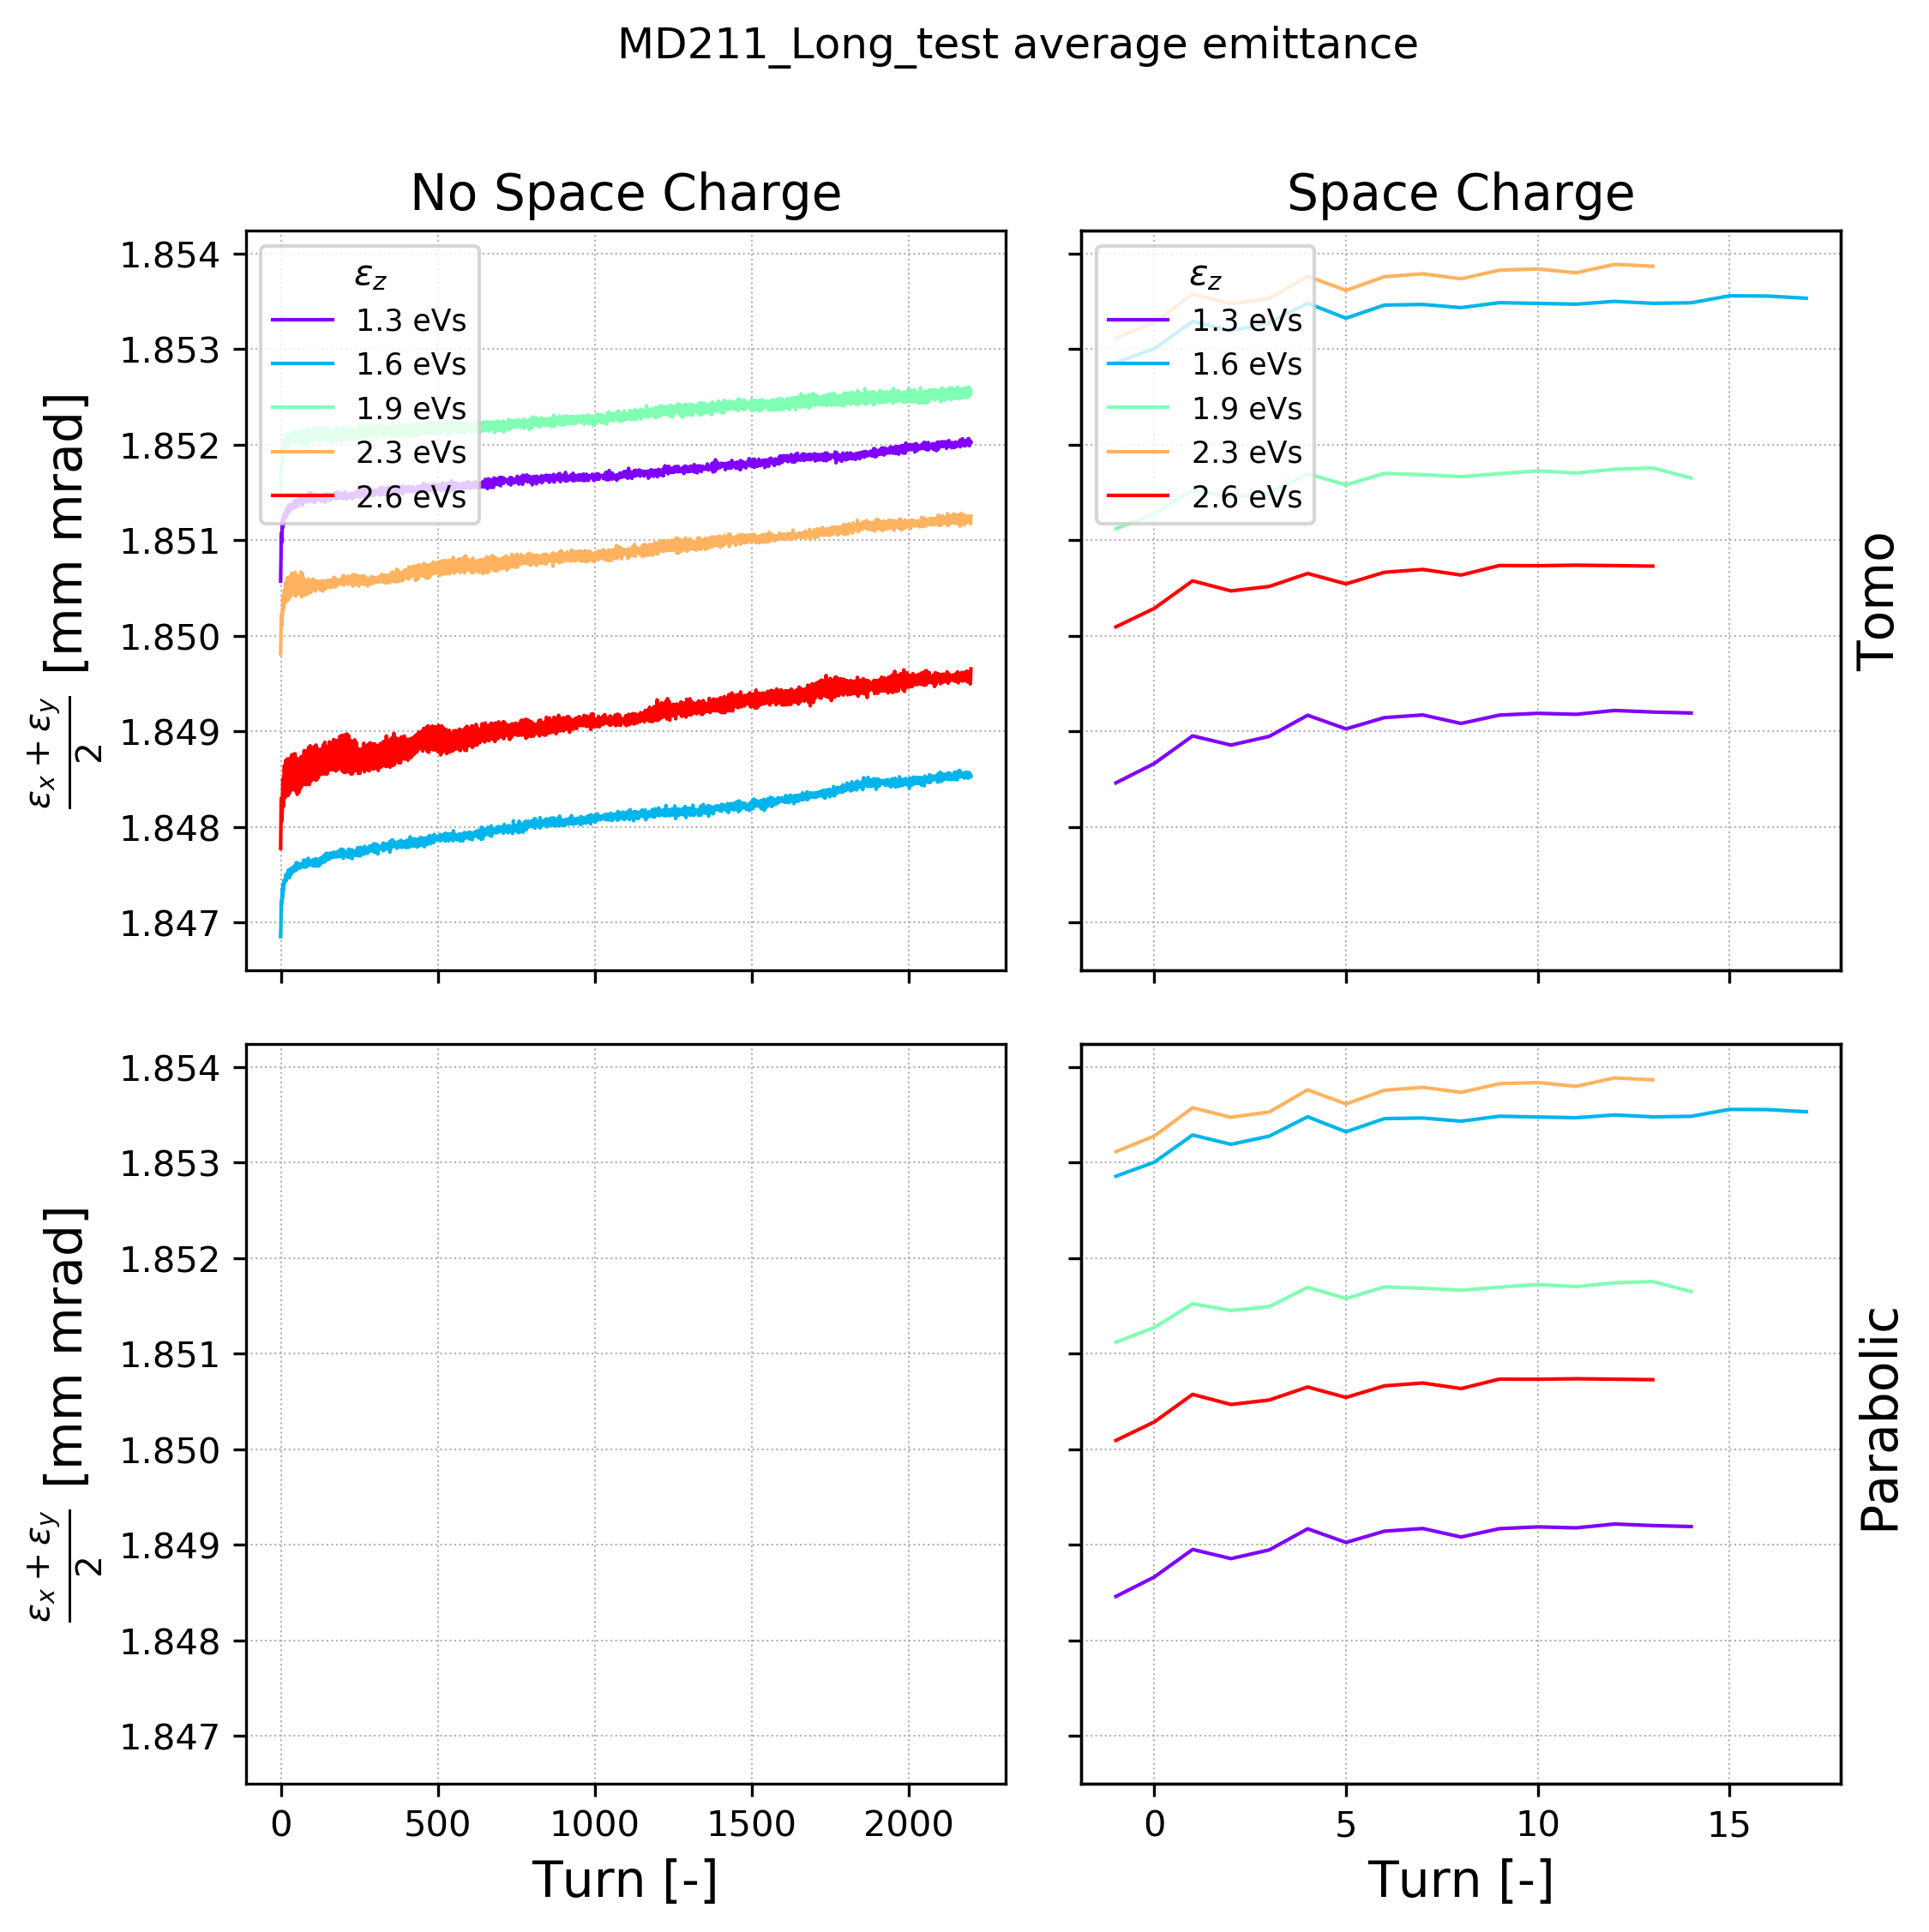

In [26]:
parameter1 = 'epsn_x'
multi1 = 1E6
parameter2 = 'epsn_y'
multi2 = 1E6

fig, axs = plt.subplots(2, 2, sharex='col', sharey='row', gridspec_kw={'hspace': 0.1, 'wspace': 0.1})
(ax1, ax2), (ax3, ax4) = axs

tit = main_label + ' average emittance'
fig.suptitle(tit)

ax1.set_ylabel(r'$\frac{\epsilon_x + \epsilon_y}{2}$ [mm mrad]');
ax3.set_ylabel(r'$\frac{\epsilon_x + \epsilon_y}{2}$ [mm mrad]');
ax3.set_xlabel('Turn [-]');
ax4.set_xlabel('Turn [-]');
ax2.set_title('Space Charge')
ax1.set_title('No Space Charge')

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))

c_it = int(0)
for key, value in sorted(dd1.iteritems()):
        ax1.plot(dd1[key]['turn'][0], (dd1[key][parameter1][0]*multi1 + dd1[key][parameter2][0]*multi2)/2, label=key, color=colors[c_it]);
        c_it = c_it + 1;

ax1.legend(loc=2, title=legend_label, fontsize='small');
ax1.grid(lw=0.5, ls=':');

c_it = int(0)
for key, value in sorted(dd2.iteritems()):
        ax2.plot(dd2[key]['turn'][0], (dd2[key][parameter1][0]*multi1 + dd2[key][parameter2][0]*multi2)/2, label=key, color=colors[c_it]);
        c_it = c_it + 1;        
ax2.grid(lw=0.5, ls=':');
ax2.legend(loc=2, title=legend_label, fontsize='small');
ax2.set_title(title_1)

c_it = int(0)
for key, value in sorted(dd3.iteritems()):
        ax3.plot(dd3[key]['turn'][0], (dd3[key][parameter1][0]*multi1 + dd3[key][parameter2][0]*multi2)/2, label=key, color=colors[c_it]);
        c_it = c_it + 1;
ax3.grid(lw=0.5, ls=':');
ax1.set_title(title_2)

c_it = int(0)
for key, value in sorted(dd4.iteritems()):
        ax4.plot(dd4[key]['turn'][0], (dd4[key][parameter1][0]*multi1 + dd4[key][parameter2][0]*multi2)/2, label=key, color=colors[c_it]);
        c_it = c_it + 1;
ax4.grid(lw=0.5, ls=':');

ax3.set_ylim(ax1.get_ylim())
ax5 = ax2.twinx()
ax5.set_ylabel(case_label_1);
ax6 = ax4.twinx()
ax6.set_ylabel(case_label_2);
ax5.set_yticklabels([]);
ax6.set_yticklabels([]);
ax5.set_yticks([]);
ax6.set_yticks([]);

for ax in axs.flat:
    ax.label_outer()   
    
savename = save_folder +'/' + main_label + '_average_emittance.png'
plt.savefig(savename, dpi = 800);